# 7506 - Trabajo práctico 1


##### Librerías

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
import scipy as sc
from sklearn.ensemble import IsolationForest
import sklearn as sk
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score
#import dtreeviz.trees as dtreeviz
#import geopandas as gpd

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv("datasets/properati_argentina_2021.csv")
df = complete_dataset.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [9]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

## Descripción de las columnas
- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


## Filtrado inicial del Dataset
Como trabajaremos con un universo acotado de propiedades, haremos una selección inicial de las publicaciones que nos interesa analizar:

Como primer paso hay que filtrar las observaciones que su tipo de vivienda sea: Casa, PH o Departamento.

Luego filtramos la ubicacion quedandonos unicamente con las propiedades de Capital Federal.

A continuación, consideraremos solo las que esten cotizadas en dolares.

Y finalmente, tomamos solo las que sean ventas

In [10]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]]

place_l2              place_l3 property_currency property_type  \
25      Capital Federal                   NaN               USD          Casa   
42      Capital Federal                  Boca               USD  Departamento   
43      Capital Federal                  Boca               USD  Departamento   
49      Capital Federal                  Once               USD  Departamento   
51      Capital Federal                 Boedo               USD            PH   
...                 ...                   ...               ...           ...   
460072  Capital Federal      Villa del Parque               USD  Departamento   
460073  Capital Federal      Villa del Parque               USD  Departamento   
460074  Capital Federal      Villa del Parque               USD  Departamento   
460075  Capital Federal      Villa del Parque               USD  Departamento   
460090  Capital Federal  Centro / Microcentro               USD  Departamento   

       operation  
25         Venta  
42         Venta  
43         Venta  
49         Venta  
51         Venta  
...          ...  
460072     Venta  
460073     Venta  
460074     Venta  
460075     Venta  
460090     Venta  

[94249 rows x 5 columns]

A partir de aquí trabajaremos con el dataset filtrado (`ds_filtrado`)

Analizando los tipos de dato de los campos:
- Hay 3 campos de fecha, evaluaremos más adelante como tratarlos.
- Tenemos latitud y longitd en su formato correcto
- Hay una variable place_l6 que no debería ser un número, también analizaremos a que se debe.
- La cantidad de habitaciones (rooms y bedrooms) quizás debería tener valores enteros.
- El precio tiene un tipo correcto

## Exploración Inicial

### Tipos de variable

In [11]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

In [12]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

### Fechas


In [13]:
ds_train[["start_date", "end_date", "created_on"]].isna().sum()

start_date    0
end_date      0
created_on    0
dtype: int64

In [14]:
ds_train["start_date"].value_counts()

2021-12-16    3735
2021-02-13    1692
2021-11-03     808
2021-08-03     663
2021-04-30     657
              ... 
2021-11-21      12
2021-12-19      10
2021-01-02       8
2021-10-24       7
2021-11-27       1
Name: start_date, Length: 365, dtype: int64

In [15]:
ds_train["end_date"].value_counts()

2021-06-05    10248
2022-01-27     7467
2022-02-09     6127
9999-12-31     4051
2021-03-01     1509
              ...  
2022-07-21        1
2022-05-30        1
2022-08-22        1
2022-08-26        1
2021-12-06        1
Name: end_date, Length: 604, dtype: int64

In [16]:
ds_train[ds_train.created_on != ds_train.start_date].shape

(0, 20)

Podemos ver que la columnas created_on y start_date siempre son iguales, descartaremos una de ellas más adelante.

In [17]:
ds_train["created_on"].value_counts()

2021-12-16    3735
2021-02-13    1692
2021-11-03     808
2021-08-03     663
2021-04-30     657
              ... 
2021-11-21      12
2021-12-19      10
2021-01-02       8
2021-10-24       7
2021-11-27       1
Name: created_on, Length: 365, dtype: int64

Hay un valor extraño en end_date, la fecha 9999-12-31, hay 285 apariciones de esta fecha

In [18]:
ds_train[ds_train.end_date == '9999-12-31']['start_date'].value_counts()

2021-02-09    111
2021-06-24     93
2021-06-30     64
2021-02-17     59
2021-07-21     57
             ... 
2021-12-25      1
2021-05-02      1
2021-03-29      1
2021-05-28      1
2021-12-22      1
Name: start_date, Length: 290, dtype: int64

Considerando que todas las fechas son de 2021, y que el dato que falta es el del fin de la publicación (es decir, la casa esta publicada) y a fines de preservar estos datos, traeremos a consideración la duración promedio de cada publicación, calcularemos ese promedio dejando fuera los 285 casos que presentan la fecha inválida.

Tomaremos para el cálculo las fechas convertidas a datetime.

In [19]:
dias = pd.to_datetime(ds_train[ds_train.end_date != '9999-12-31']['end_date']) - pd.to_datetime(
    ds_train[ds_train.end_date != '9999-12-31']['start_date'])
dias.describe()

count                         71348
mean     74 days 13:52:48.088804171
std      84 days 04:14:26.398253024
min                 0 days 00:00:00
25%                16 days 00:00:00
50%                51 days 00:00:00
75%                99 days 00:00:00
max               618 days 00:00:00
dtype: object

El promedio de la duración de las publicaciones es casi de 75 días, asumiremos que las publicaciones con la fecha invalida duraron lo mismo que el promedio y tomaremos como fecha final la fecha de inicio + 75 días.

In [20]:
ds_train.loc[ds_train.end_date == '9999-12-31', 'end_date'] = pd.to_datetime(
    ds_train[ds_train.end_date == '9999-12-31']['start_date']) + dias.mean()
ds_train.end_date

265075    2022-01-27
450176    2022-02-09
88383     2021-06-05
408274    2021-06-05
379947    2021-09-18
             ...    
270651    2022-05-01
180432    2021-06-05
29145     2022-01-27
155811    2021-04-06
16809     2021-09-20
Name: end_date, Length: 75399, dtype: object

Finalmente, como todos los valores son formatos válidos de fecha, podemos convertir sin problemas.

### Conversion tipo de dato

In [21]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

## Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda

In [22]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74551.000000       66612.000000            71532.000000   
mean              2.825234           2.017069              109.449701   
std               1.428980           1.137679              951.547499   
min               1.000000          -1.000000               10.000000   
quartile 1        2.000000           1.000000               45.000000   
median            3.000000           2.000000               65.000000   
quartile 3        4.000000           3.000000              105.000000   
max              40.000000          70.000000           137000.000000   
mode              3.000000           1.000000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72728.000000  72421.000000  72421.000000   
mean                       87.933684    -34.591380    -58.449851   
std                       998.003083      0.190516      0.293398   
min                         1.000000    -53.788624    -71.471192   
quartile 1                 40.000000    -34.616012    -58.466523   
median                     58.000000    -34.595790    -58.439080   
quartile 3                 89.000000    -34.577367    -58.408870   
max                    217000.000000    -24.219827    -54.133330   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.252778e+05  
std           3.089455e+05  
min           5.000000e+03  
quartile 1    9.500000e+04  
median        1.439000e+05  
quartile 3    2.370000e+05  
max           1.200000e+07  
mode          1.100000e+05

## Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [23]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

La tabla muestra varias cosas:
- Hay 75399 propiedades habiendo filtrado solo las de Capital Federal, Venta y USD
- Hay 64617 departamentos, 7436 PHs y 3346 casas
- Hay 11547 propiedades en Palermo
- El id de la propiedad es único y no representa nada útil para nuestro procesamiento. Parecería pasar algo similar con el título, lo analizaremos en más detalle más adelante

## Análisis gráfico de las distribuciones de las variables

#### Distribución de fechas 

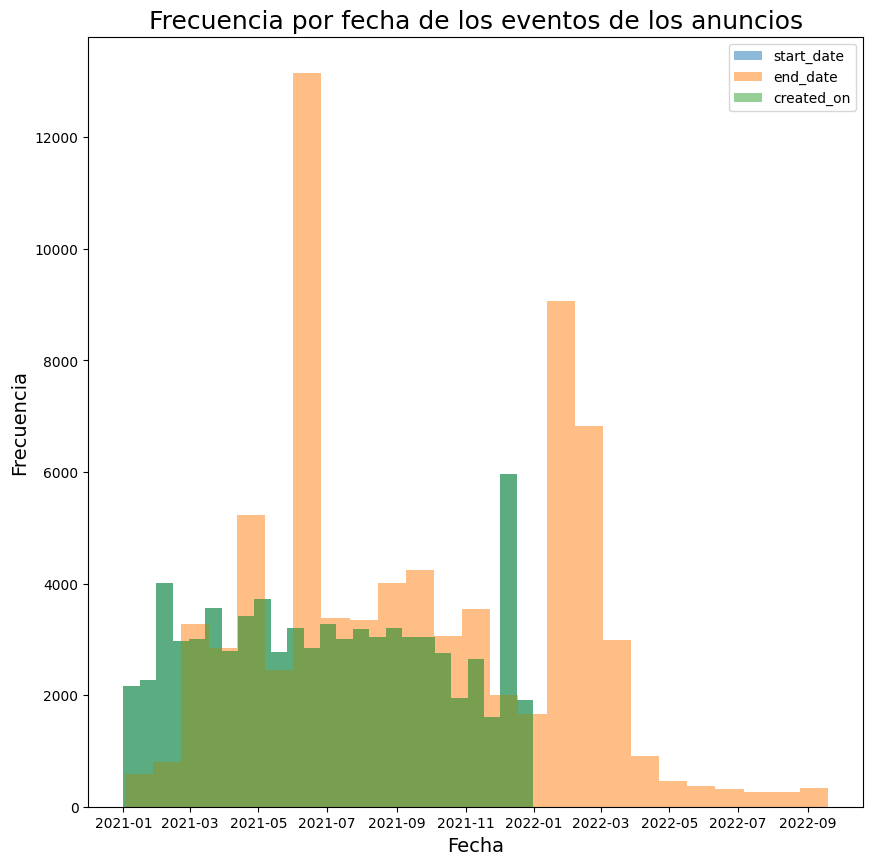

In [24]:

plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')


En este grafico se puede apreciar la distribución de las variables que hacen referencia a las fechas de creacion, alta y baja de los anuncios. Podemos ver que la distribución de las fechas de creación coincide con la distribución de las fechas de alta del anuncio, lo cual tiene sentido que así sea ya que la fecha de creación del anuncio es la primer versión del anuncio en ser dada de alta. 

###  Distribución de barrios
Primero vemos la cantidad de apariciones de los barrios por anuncio en la siguiente tabla:

In [25]:
ds_train['place_l3'].value_counts()

Palermo                 11404
Belgrano                 7174
Caballito                5692
Recoleta                 5008
Villa Urquiza            3704
Almagro                  3264
Nuñez                    2845
Villa Crespo             2542
Flores                   2506
Barrio Norte             2398
Balvanera                2030
Colegiales               1552
Villa Devoto             1522
Villa del Parque         1497
Saavedra                 1462
Puerto Madero            1178
San Telmo                1108
San Cristobal            1037
San Nicolás              1031
Barracas                 1010
Retiro                    984
Floresta                  981
Boedo                     977
Monserrat                 908
Parque Chacabuco          881
Villa Pueyrredón          802
Coghlan                   793
Mataderos                 599
Villa Luro                588
Chacarita                 565
Villa Ortuzar             537
Liniers                   530
Parque Patricios          527
Villa Luga

Como podemos observar, hay demasiados barrios con pocas apariciones, por lo que nos centraremos en visualizar los primeras 25 barrios que mas aparecen. Agrupando al resto en una nueva categoria llamada "Otras".

In [26]:
top25 = ds_train['place_l3'].value_counts().head(25)

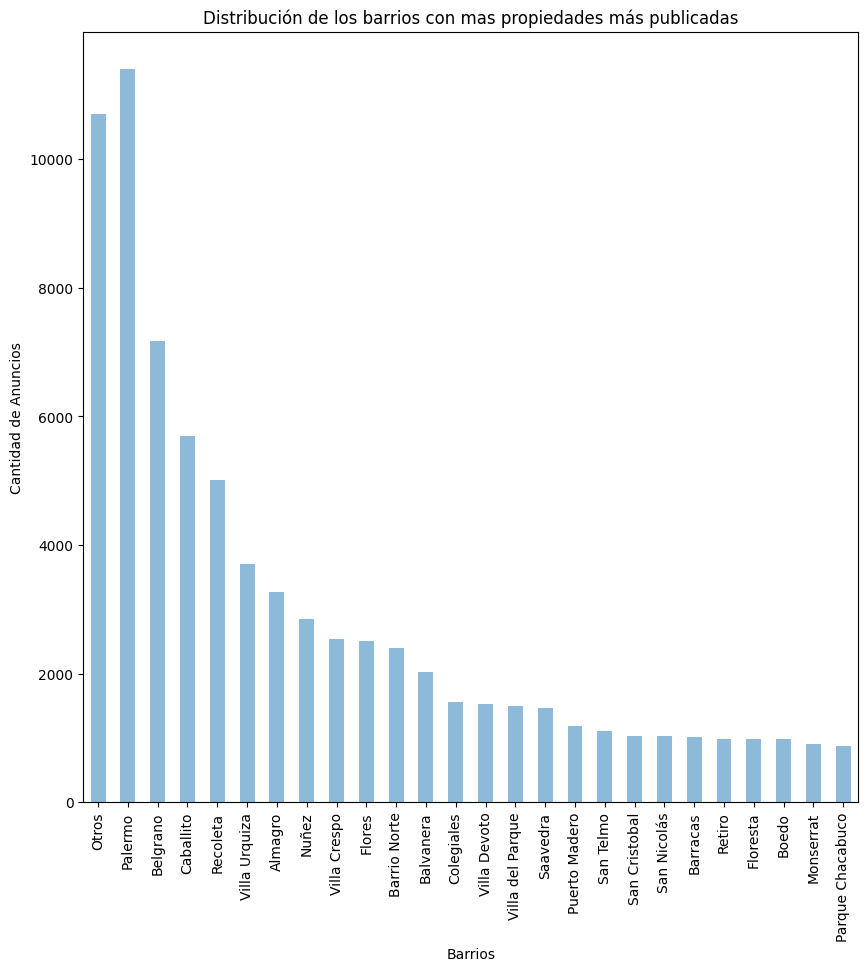

In [27]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

El barrio de Palermo es la que tiene mas propiedades publicadas

### Distribución de tipos de propiedad

Para analizar la distribucion de la variable property_type vamos a agrupar las apariciones en un grafico de barras por tipo de propiedad

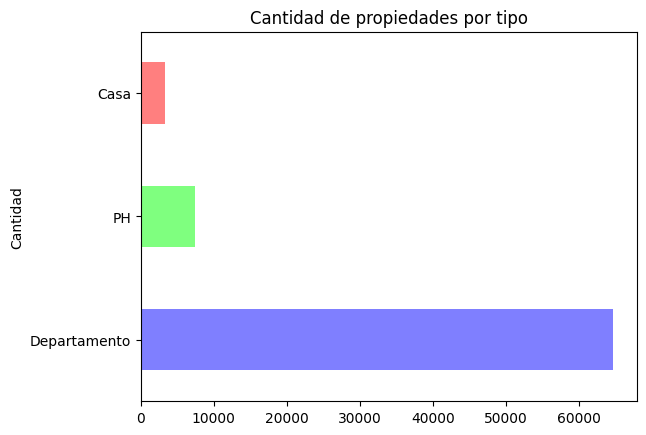

In [28]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

A simple vista se puede ver que la mayoria de publicaciones son de departamentos por una amplia diferencia

### Distribución de latitud y longitud
Para analizar la longitud y latitud vamos a utilizar un grafico de a pares ya que nos aporta más información sobre su distribución, pudiendo visualizar la localización de la propiedad. Adicionalmente se distinguirá por el tipo de propiedad.

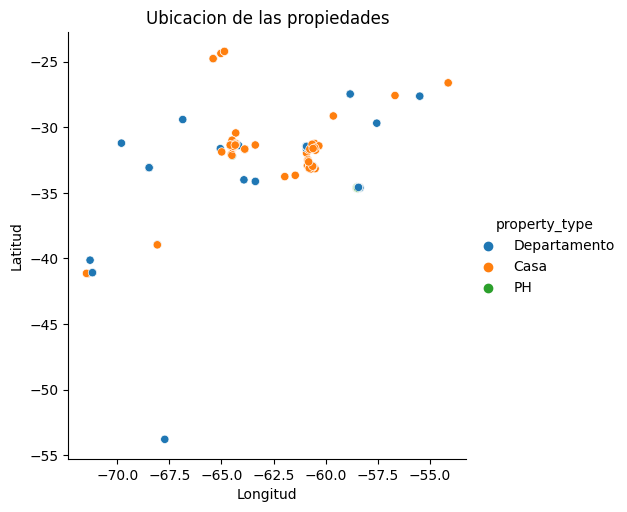

In [29]:
sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

Podemos ver que la mayoria de propiedades publicadas se encuentran concentradas en un área en particular, donde mayormente son de tipo Casa. Y al alejarse se ven departamentos distanciados entre sí.

### Distribución de habitaciones y baños

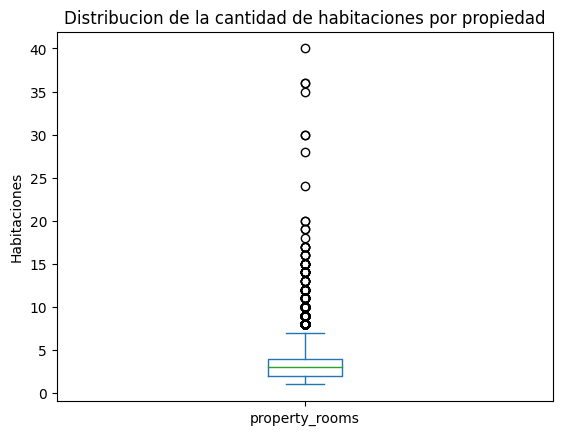

In [30]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

Podemos ver que hay una gran cantidad de outliers, siendo 40 el que mas se aleja, para visualizar mejor la distribucion del boxplot veremos un nuevo grafico sin considerar los outliers.

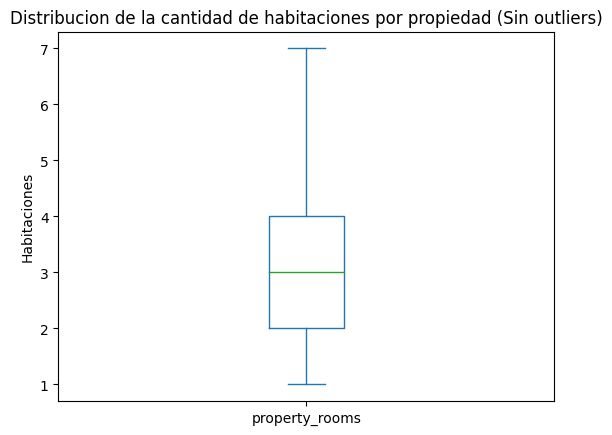

In [31]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

Ahora si podemos visualizar mejor los valores de la mediana, q3, q1 y los bigotes. Que toman la siguiente cantidad de habitaciones:

*   Bigotes: 1 y 7.
*   Cuartil 1: 2
*   Mediana: 3.
*   Cuartil 3: 4.





Hacemos el mismo procedimiento ver la distribución de la cantidad de baños por propiedad

<AxesSubplot: title={'center': 'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

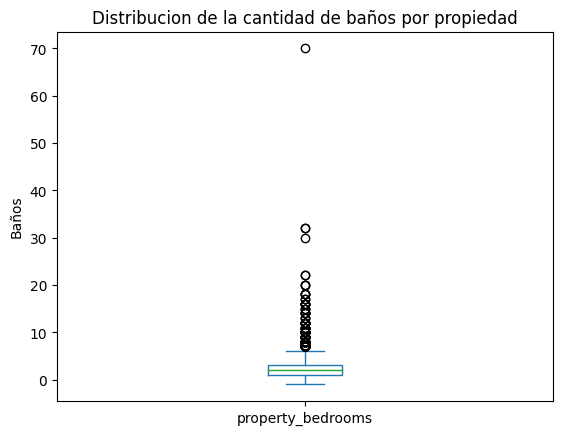

In [32]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")

Vemos que esta vez hay mas distancia entre el outlier mas alejado y el resto de outliers.

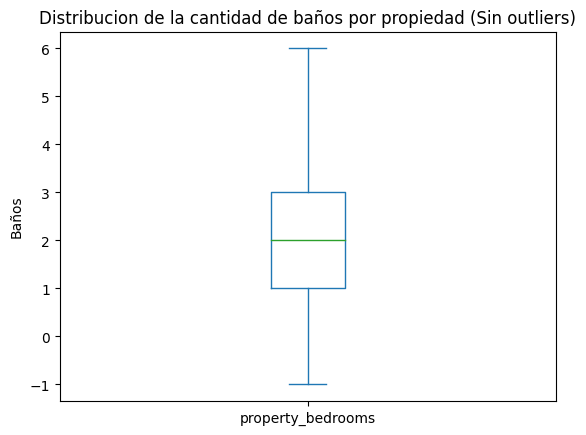

In [33]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

En este caso toman los siguientes valores:

*   Bigotes: -1 y 6.
*   Cuartil 1: 1.
*   Mediana: 2.
*   Cuartil 3: 3.


### Distribución de precio

Para analizar la distribución del precio, como es un tipo de variable continua y cada observación puede tomar un valor en un rango muy grande, optamos por hacer una agrupación por rangos de precios, obteniendo una categoria por cada rango.
Vamos a considerar la mediana para establecer los limites entre cada grupo, consideramos que es un buen valor para dividir al conjunto en partes ya que no se ve afectado drasticamente por outliers (como si sucede con la media).

In [34]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 143900.0


<AxesSubplot: title={'center': 'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

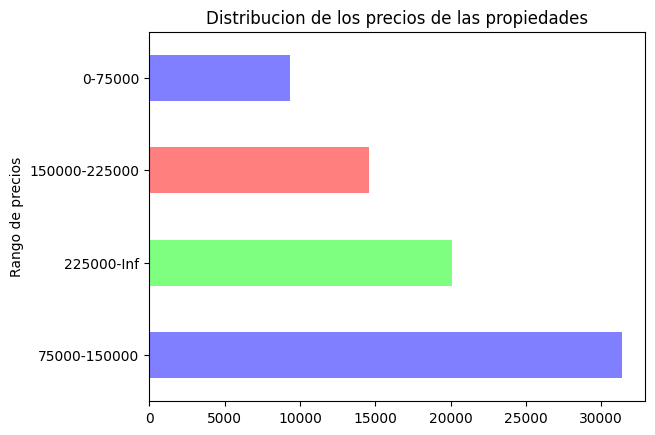

In [35]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

Podemos ver que la mayoria de propiedades estan dentro del rango de 75000 y 150000 USD.

### Distribución de superficie total y cubierta

Utilizaremos un violin plot para cada variable. 

<AxesSubplot: >

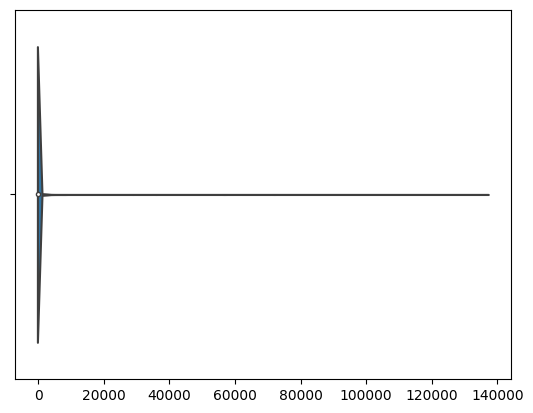

In [36]:
sns.violinplot(ds_train.property_surface_total.values)

A simple vista no esta muy claro el gráfico por la cantidad de outliers que hay, por lo que dejaremos de lado la mayoria de outliers para interpretarlo mas en detalle.

<AxesSubplot: >

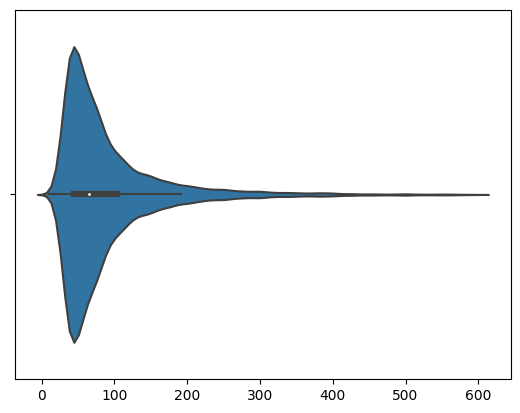

In [37]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

Podemos ver que entre 0 y 100 se encuentra la mayor densidad

Hacemos el mismo procedimiento para visualizar la distribución de la superficie cubierta de la propiedad

<AxesSubplot: >

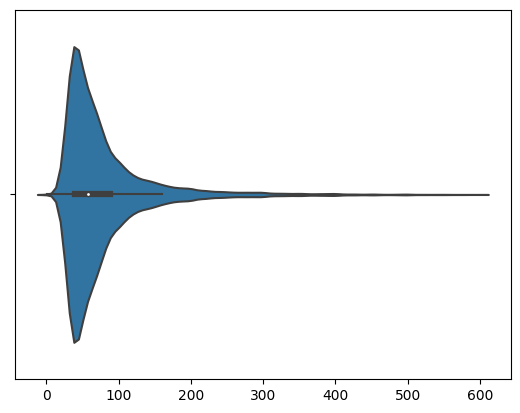

In [38]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

Se nota que el grafico de property_surface_total es similar al de property_surface_covered, teniendo el segundo una densidad levemente menor. 

## Correlación entre variables

A continuación analizaremos la correlación entre las variables cuantitativas, primero visualizando la distribución a pares entre estas.

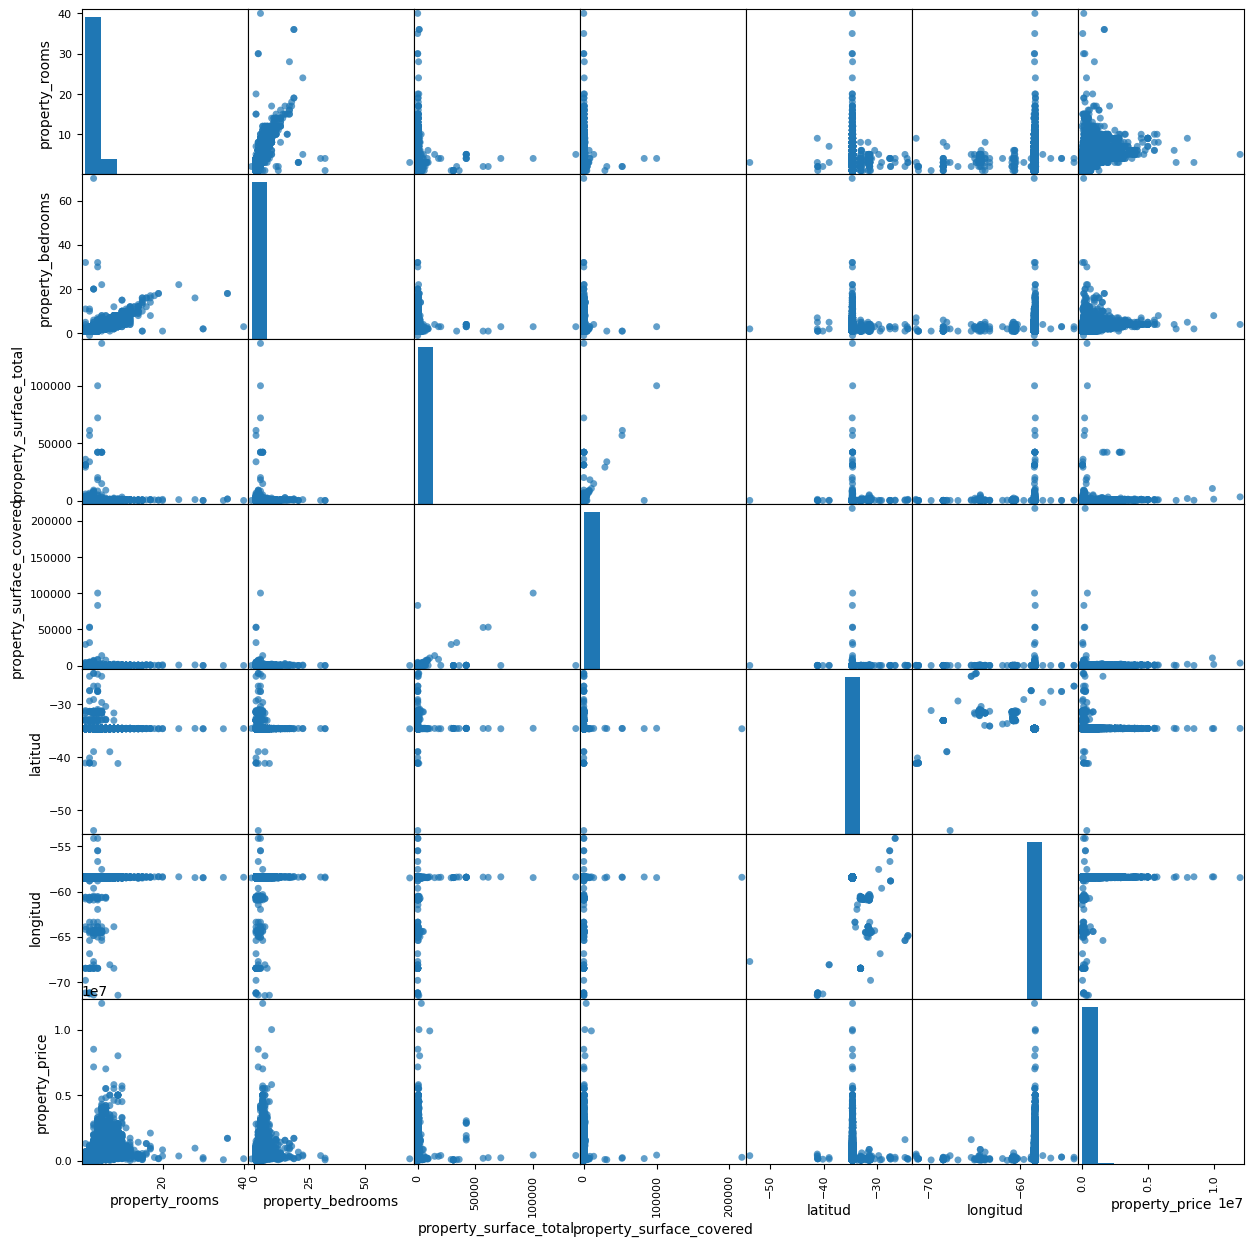

In [39]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

Si bien a simple vista no esta muy claro que variables están correlacionadas entre sí, podemos suponer que puede llegar a haber relación entre property_rooms y property_bedrooms, property_surface_total y property_surface_covered, property_price y property_rooms, property_price y property_bedrooms. Las cuales tiene sentido que pudiesen tener algún tipo de relación.

Además podemos considerar en menor medida que haya una relación entre longitud y latitud (cosa que no necesariamente tendría que ser así)




Analizaremos la correlación lineal entre variables por medio de la medición del coeficiente de Pearson

In [40]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.861285   
property_bedrooms               0.861285           1.000000   
property_surface_total          0.067330           0.071481   
property_surface_covered        0.086246           0.091468   
latitud                         0.005363           0.003471   
longitud                       -0.008065          -0.006827   
property_price                  0.497612           0.422857   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.067330                  0.086246   
property_bedrooms                       0.071481                  0.091468   
property_surface_total                  1.000000                  0.479035   
property_surface_covered                0.479035                  1.000000   
latitud                                 0.012276                  0.001819   
longitud                               -0.010808                 -0.000713   
property_price                          0.096894                  0.058478   

                           latitud  longitud  property_price  
property_rooms            0.005363 -0.008065        0.497612  
property_bedrooms         0.003471 -0.006827        0.422857  
property_surface_total    0.012276 -0.010808        0.096894  
property_surface_covered  0.001819 -0.000713        0.058478  
latitud                   1.000000 -0.214854        0.017358  
longitud                 -0.214854  1.000000        0.022929  
property_price            0.017358  0.022929        1.000000

Haremos un heatmap que nos permite visualizar mejor la correlación

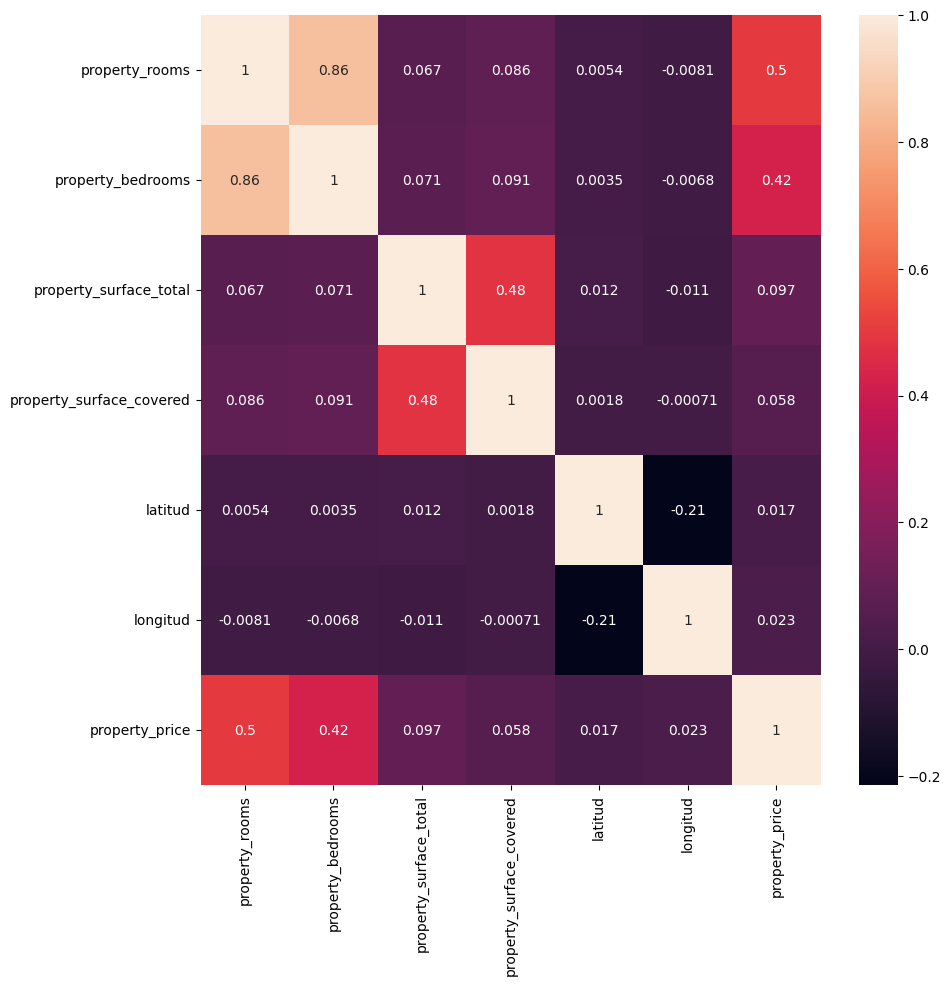

In [41]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

Luego de calcular el coeficiente de Pearson donde los que resultan cercanos a 1 indican una gran correlación entre sí, los que tienden a 0 tienen poca correlación y los cercanos a -1 presentan una notable correlación negativa.

Veremos si las variables que parecían relacionarse anteriormente realmente lo hacen:


In [42]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.86
Entre property_price y property_bedrooms:0.42
Entre property_price y property_rooms:0.5
Entre property_surface_total y property_surface_covered:0.48
Entre longitud y latitud:-0.21


Podemos sacar las siguientes conclusiones sobre las variables que parecian relacionarse:


*   Hay mucha relación entre la cantidad de habitaciones y ambientes.
*   Hay tambien bastante relación entre la superficie total y superficie cubierta de la propiedad.
*   Casi no hay relación entre el precio y la cantidad de habitaciones.
*   Casi no hay relación entre el precio y la cantidad de ambientes.
*   No hay relación entre la latitud y la longitud.





## Análisis de valores faltantes

Ahora analizaremos los datos faltantes del dataset.

### Porcentaje de valores faltantes por columna



id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.949655
longitud                      3.949655
place_l2                      0.000000
place_l3                      0.449608
place_l4                     96.181647
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.124683
property_bedrooms            11.654001
property_surface_total        5.128715
property_surface_covered      3.542487
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


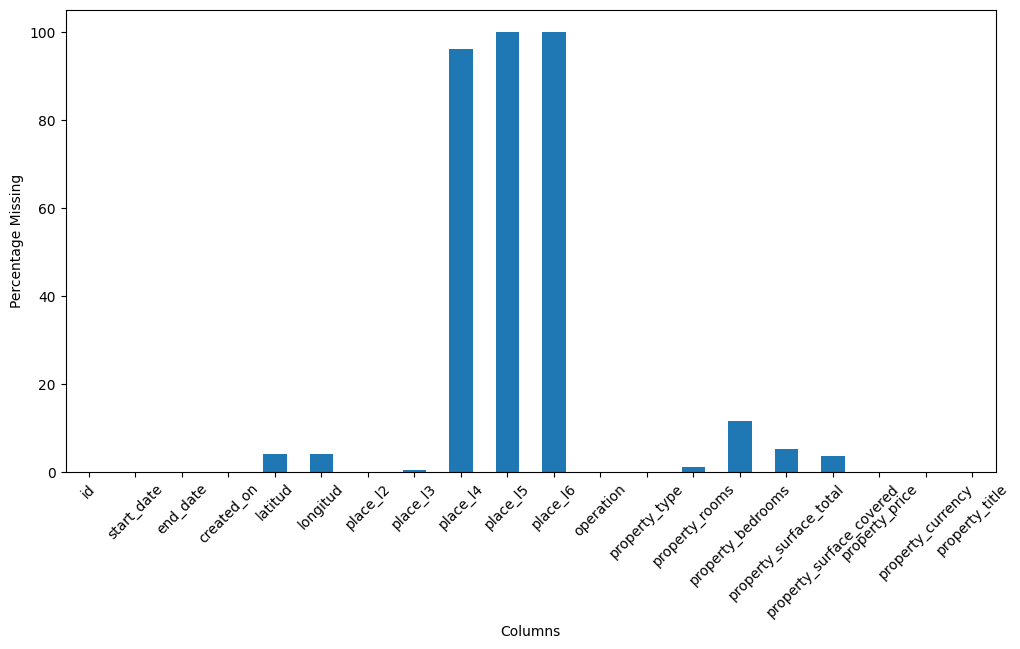

In [43]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

A simple vista podemos ver que las columnas place_l4,place_l5 y place_l6 practicamente no tienen datos, procederemos a eliminarlas.

### Porcentaje de datos faltantes por fila

<AxesSubplot: >

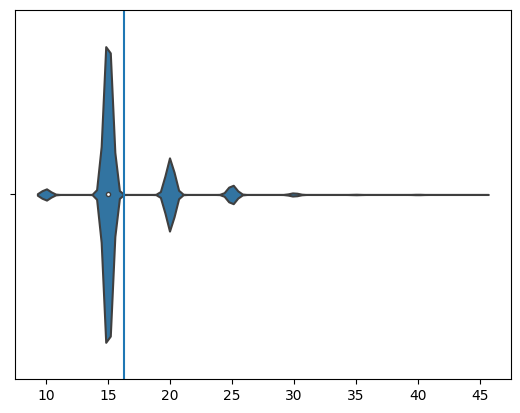

In [44]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

Analizaremos nuevamente el porcentaje por fila luego de trabajar con las columnas

### Procesado de columnas

Descartaremos la columna id debido a que no es relevante para nuestro análisis. No podemos usar un dato uníco porque no representa ninguna característica relevante.

In [45]:
ds_train['id'].head()

265075    cfQOjnbFBa7yBI/y8/AWlA==
450176    Si5DNdNP5YxcS1Zl/80f0A==
88383     XNEPNVyM/xP9p3MTWkx0Fg==
408274    Rcr1PNtQL6qx1TUiPlNvyw==
379947    XwVj/FebvA7Qx0lCm7pMwA==
Name: id, dtype: object

Como mencionamos anteriormente, evaluaremos descartar place_l4 por la cantidad de valores faltantes que hay.

In [46]:
ds_train['place_l4'].value_counts()

Palermo Hollywood    1264
Palermo Chico         848
Palermo Soho          630
Palermo Viejo         137
Name: place_l4, dtype: int64

In [47]:
ds_train['place_l2'].value_counts()

Capital Federal    75399
Name: place_l2, dtype: int64

In [48]:
ds_train['property_currency'].value_counts()

USD    75399
Name: property_currency, dtype: int64

In [49]:
ds_train['operation'].value_counts()

Venta    75399
Name: operation, dtype: int64

Como place_l4 tiene pocas observaciones y todas corresponden al barrio de Palermo, descartaremos esta columna.
Además, como mencionamos más arriba, la columna created_on siempre es igual a la columna start_date, por lo que también la descartaremos.
Por otro lado, como filtramos solo las propiedades de CABA eliminaremos la columna place_l2 ya que tiene un único valor. Por el mismo motivo eliminaremos la columna property_currency y la columna property_operation.

In [50]:
row_missing_data = ds_train.T.isna().sum() * 100 / column_count
row_missing_data.value_counts()

15.0    56945
20.0    12481
25.0     3305
10.0     1939
30.0      562
35.0       85
40.0       81
45.0        1
dtype: int64

In [51]:
dataset_perc = row_missing_data.value_counts() * 100 / ds_train.shape[0]
print(f"La cantidad de faltantes segun porcentaje representan\n{dataset_perc}")

La cantidad de faltantes segun porcentaje representan
15.0    75.524874
20.0    16.553270
25.0     4.383347
10.0     2.571652
30.0     0.745368
35.0     0.112734
40.0     0.107428
45.0     0.001326
dtype: float64


Ahora que elegimos las columnas deseadas, veremos nuevamente los porcentajes por columna para preparar algunas imputaciones

In [52]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.949655
longitud                      3.949655
place_l2                      0.000000
place_l3                      0.449608
place_l4                     96.181647
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.124683
property_bedrooms            11.654001
property_surface_total        5.128715
property_surface_covered      3.542487
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


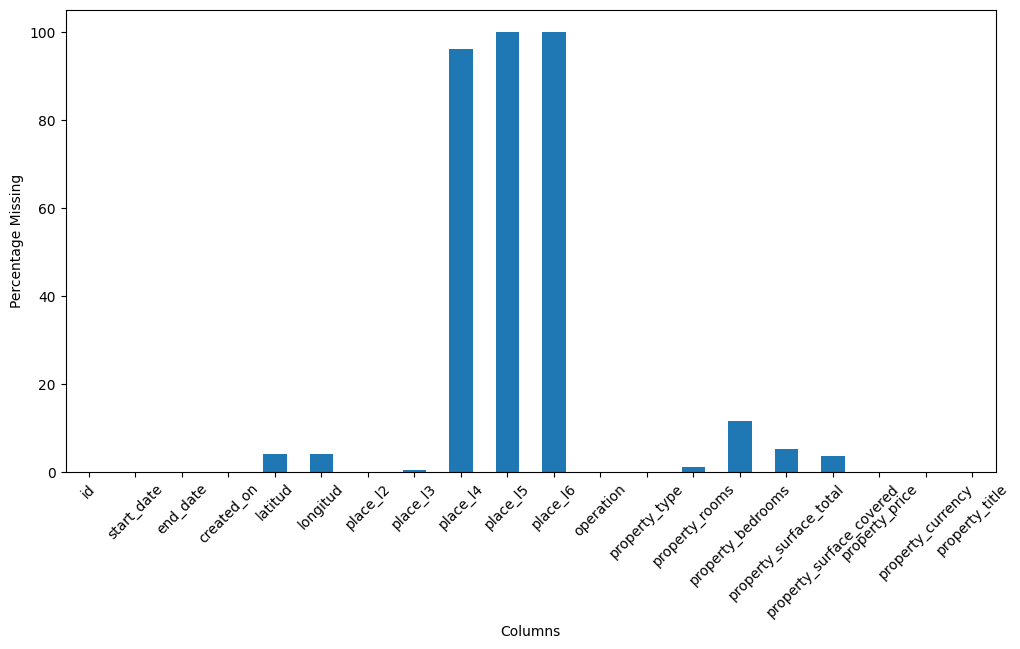

In [53]:
plot_missing_by_column(ds_train)

Eliminaremos las columnas mencionadas anteriormente. Luego, haremos algunas imputaciones sobre los datos faltantes para reparar algunos.


In [54]:
## Train

ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
              inplace=True, axis=1)

## Test
ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
             inplace=True, axis=1)

## Reparacion de datos faltantes

Ahora analizaremos columna a columna como podemos reparar esos datos.

### Pre Imputacion de latitud y longitud

latitud    3.949655
dtype: float64


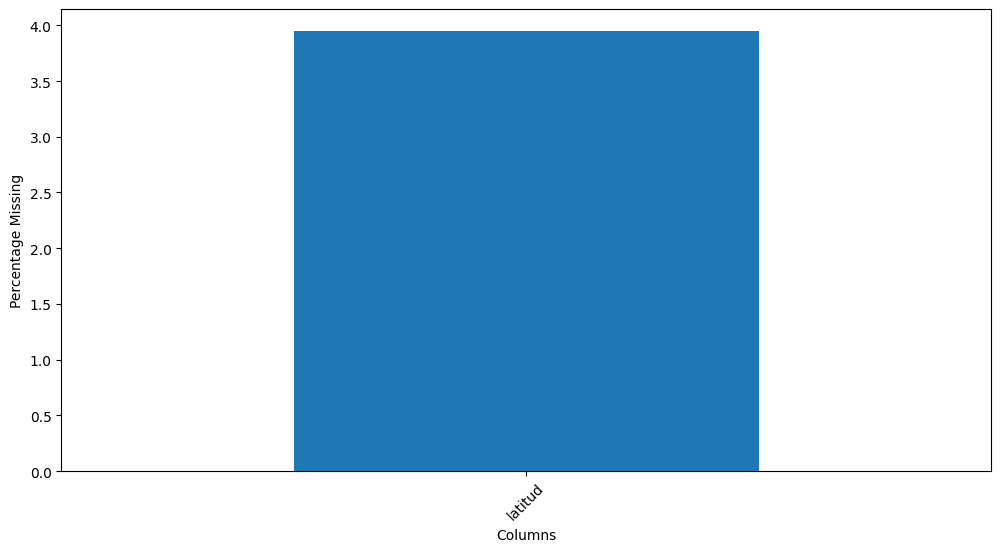

In [55]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.949655
dtype: float64


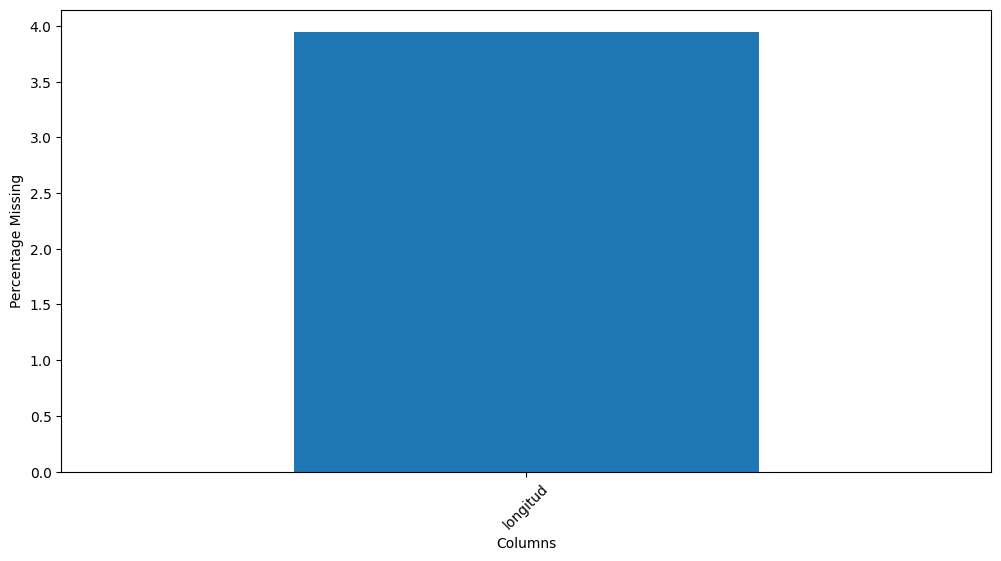

In [56]:
plot_missing_by_column(ds_train[['longitud']])

Vemos que de las coordenadas faltantes, siempre que falta una falta la otra también. No hay casos donde solo falte 1 de las 2 coordenadas.

In [57]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [58]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [59]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.668%
Los datos faltantes en la columna place_l3 para test representan el 4.122%


Para reconstruir los datos faltantes nos vamos a basar en el barrio marcado por 'place_l3' calculando la latitud y longitud media de cada uno y asignarle esos datos.

In [60]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

Vemos que los datos restantes ahora mismo son aquellos que tampoco tienen asignado un barrio. Dichos datos son irreparables, ya que no tenemos ninguna información respecto a la ubicación.

In [61]:
ds_train[ds_train.latitud.isna()]

id start_date   end_date  latitud  longitud  \
389690  BNsc9j62YZWgIQAaQ3vR7w== 2021-05-05 2021-06-05      NaN       NaN   
142639  Rz0b5avJ+Y05s1qSNFVmsw== 2021-06-08 2021-11-04      NaN       NaN   
45963   ZMETeO0JxjkcfJd8S+gZOg== 2021-04-21 2021-06-05      NaN       NaN   
308980  yHH+c/hrvj+80CmVIyH+iw== 2021-09-01 2022-03-09      NaN       NaN   
177602  fGNGYFbRxuKwIidrnXD8EQ== 2021-03-23 2021-04-22      NaN       NaN   
...                          ...        ...        ...      ...       ...   
313732  tvxDz5wn65wHWzDUkzb35Q== 2021-01-06 2021-10-05      NaN       NaN   
151051  NWbXB0gPxuUNRgXVhs8sKw== 2021-08-05 2021-11-04      NaN       NaN   
161698  GhIxeNGs5rOvxRVwOhqxfA== 2021-10-07 2022-03-09      NaN       NaN   
377126  utOWuv4OXDSljDlUPiZh3A== 2021-03-16 2021-06-05      NaN       NaN   
348183  pM5dQ2VTfrThYBFjlnY15g== 2021-04-16 2021-06-05      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
389690      NaN  Departamento             3.0                3.0   
142639      NaN          Casa             5.0                NaN   
45963       NaN  Departamento             1.0                NaN   
308980      NaN          Casa             NaN                6.0   
177602      NaN  Departamento             4.0                3.0   
...         ...           ...             ...                ...   
313732      NaN            PH             2.0                NaN   
151051      NaN          Casa             4.0                NaN   
161698      NaN  Departamento             3.0                2.0   
377126      NaN  Departamento             4.0                2.0   
348183      NaN  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
389690                    56.0                       NaN         97000.0   
142639                   236.0                     250.0        330000.0   
45963                      NaN                      20.0         70000.0   
308980                  1100.0                     300.0        800000.0   
177602                   170.0                     240.0        620000.0   
...                        ...                       ...             ...   
313732                    48.0                      39.0         95000.0   
151051                    90.0                     140.0        290000.0   
161698                    44.0                      44.0         59000.0   
377126                     NaN                      98.0        300000.0   
348183                    73.0                      73.0         85000.0   

                                           property_title  
389690  Oficina o vivienda. Todo luz! A pasos del Obel...  
142639     Casa  en Venta Caba / Buenos Aires (D038 1543)  
45963                          Departamento - Microcentro  
308980  IMPECABLE CASA EN ABRIL CON EXCELENTE VISTA AL...  
177602                              ALQUILER ANA VALENCIA  
...                                                   ...  
313732         PH en Venta CABA / Buenos Aires (D038 546)  
151051     Casa  en Venta Caba / Buenos Aires (D038 1562)  
161698  25 DE MAYO AL 700 - APTO PROF LUMIN OPCION COC...  
377126                     Departamento - Capital Federal  
348183  DEPARTAMENTO de 4 Ambientes al FRENTE  *Con CO...  

[139 rows x 13 columns]

In [62]:
ds_test[ds_test.latitud.isna()]

id start_date end_date  latitud  longitud  \
180567  VeUeVZzvn6CG1admtOWObg==        NaT      NaT      NaN       NaN   
433579  zYQ/wZdOxmyZK1asrNN/Ew==        NaT      NaT      NaN       NaN   
214731  eznwOHdDYqYAdOfh8ANvBA==        NaT      NaT      NaN       NaN   
143142  wrCkIm73SkbSvkaT5lI1NQ==        NaT      NaT      NaN       NaN   
25      CyZu6IaZgmQYGk8jmPajCg==        NaT      NaT      NaN       NaN   
146411  MbCY2JnbC/KUc446DZLA6w==        NaT      NaT      NaN       NaN   
286186  4vouwXxdR9jsE/8VHrbQsQ==        NaT      NaT      NaN       NaN   
143123  m281LUJMceK6Z3pN9+h3cg==        NaT      NaT      NaN       NaN   
84629   /DLePVDOMNQTbVzG8YVjTA==        NaT      NaT      NaN       NaN   
19426   0q0FwIHkex8jywo1x1Q6mA==        NaT      NaT      NaN       NaN   
161811  OBEJUlZ0HWzDeQOdVfUQ5g==        NaT      NaT      NaN       NaN   
459195  E8hNlBjeRdD9Cr759qVghQ==        NaT      NaT      NaN       NaN   
348199  9L8mNJdhzxb5vH8bNIKPoQ==        NaT      NaT      NaN       NaN   
341285  fH/+4asrLhpVCY1KxLwFKQ==        NaT      NaT      NaN       NaN   
125436  M5Sv89K3N2XSS7cK57DNxg==        NaT      NaT      NaN       NaN   
286975  TO9zmGEevDqKAwW4/Ear4w==        NaT      NaT      NaN       NaN   
169691  /HjGljAcks2boe1uclUdBg==        NaT      NaT      NaN       NaN   
100679  bazSV9fw9UcXJh6Xkx9IOg==        NaT      NaT      NaN       NaN   
346564  aJ+TIfF6ee30ip5+ik0Upw==        NaT      NaT      NaN       NaN   
80203   vHP8fy5SyLNedX7t7fgoKQ==        NaT      NaT      NaN       NaN   
63593   MDq7beRRDhnnexPlizndeg==        NaT      NaT      NaN       NaN   
385332  ih9LGBbNdcMTUZDASVl5iw==        NaT      NaT      NaN       NaN   
158340  p4w3F3utyN2K+OyuuCkzbA==        NaT      NaT      NaN       NaN   
402217  Hq7uSgPfrfVz1UnBOUUwOA==        NaT      NaT      NaN       NaN   
97667   B7DF6p55ymZ7udgcXdgv2g==        NaT      NaT      NaN       NaN   
308187  UHPrrt0xvMZ+CHRHoq3wFQ==        NaT      NaT      NaN       NaN   
445813  q2+AOsVPVqqxps7V5dCJZQ==        NaT      NaT      NaN       NaN   
223287  ANBlWDLQarFIoRKCdED4SQ==        NaT      NaT      NaN       NaN   
299216  3YXrUTUsKAzutpSbOuezfg==        NaT      NaT      NaN       NaN   
44423   oGPgLc4InEc+5rOhp+H7PA==        NaT      NaT      NaN       NaN   
218048  vRA/0y8xkAUweY9h1T7EzA==        NaT      NaT      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
180567      NaN  Departamento             4.0                3.0   
433579      NaN  Departamento             2.0                NaN   
214731      NaN          Casa             NaN                3.0   
143142      NaN  Departamento             1.0                NaN   
25          NaN          Casa             4.0                3.0   
146411      NaN          Casa             4.0                3.0   
286186      NaN            PH             3.0                NaN   
143123      NaN  Departamento             2.0                NaN   
84629       NaN  Departamento             2.0                1.0   
19426       NaN  Departamento             3.0                3.0   
161811      NaN  Departamento             2.0                1.0   
459195      NaN  Departamento             2.0                1.0   
348199      NaN          Casa             NaN                4.0   
341285      NaN  Departamento             4.0                NaN   
125436      NaN  Departamento             1.0                NaN   
286975      NaN  Departamento             1.0                NaN   
169691      NaN  Departamento             3.0                NaN   
100679      NaN  Departamento             1.0                1.0   
346564      NaN          Casa             4.0                3.0   
80203       NaN  Departamento             2.0                1.0   
63593       NaN  Departamento             1.0                NaN   
385332      NaN  Departamento             2.0                NaN   
158340      NaN          Casa             NaN                4.0 

In [63]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0018%
El porcentaje de valores a eliminar en test corresponden a un 0.0016%


In [64]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

### Post Imputacion de latitud y longitud

latitud    0.0
dtype: float64


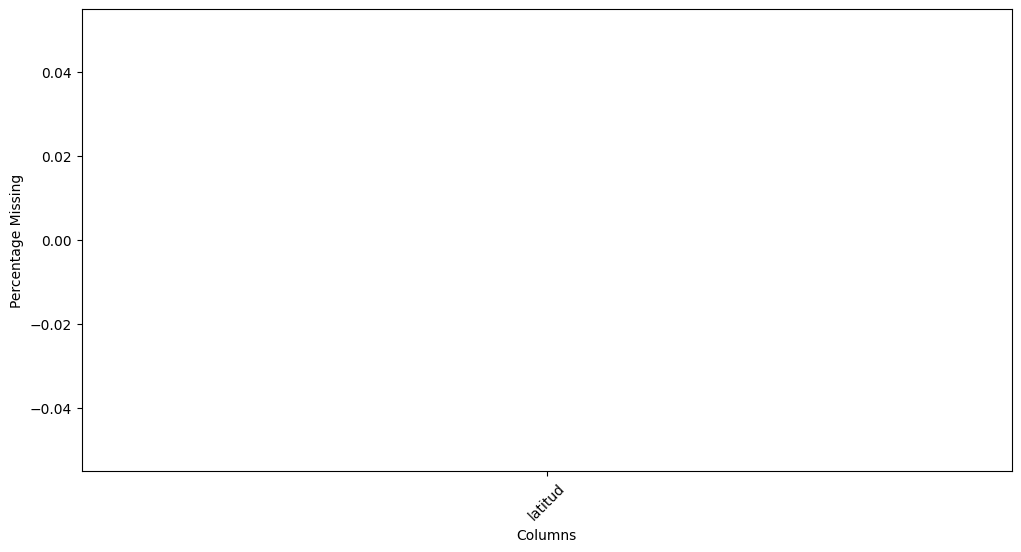

In [65]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


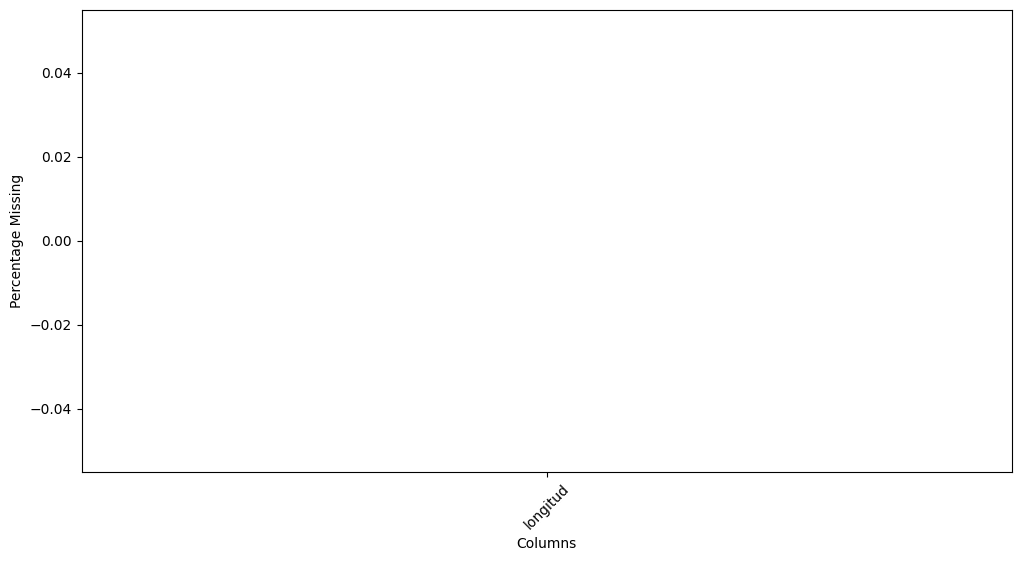

In [66]:
plot_missing_by_column(ds_train[['longitud']])

### Pre imputación de ambientes

property_rooms    1.092214
dtype: float64


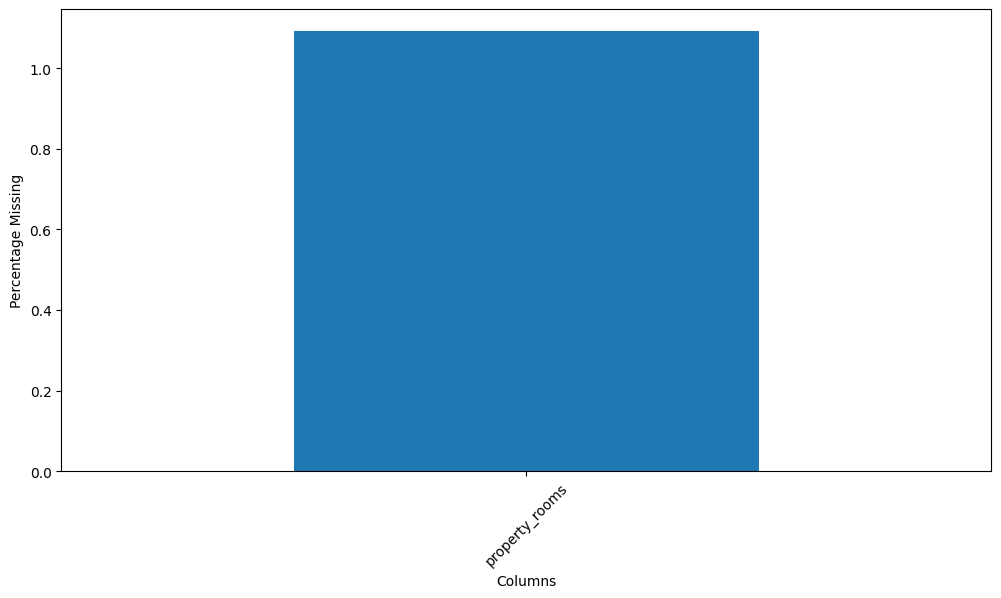

In [67]:
plot_missing_by_column(ds_train[['property_rooms']])

#### Reparacion de ambientes faltantes en base al titulo de la propiedad

In [68]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")


In [69]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 822
cantidad de ambientes faltantes post reparacion: 653
cantidad inicial de ambientes a reparar: 192
cantidad de ambientes faltantes post reparacion: 182


### Post Imputacion de ambientes

property_rooms    0.867659
dtype: float64


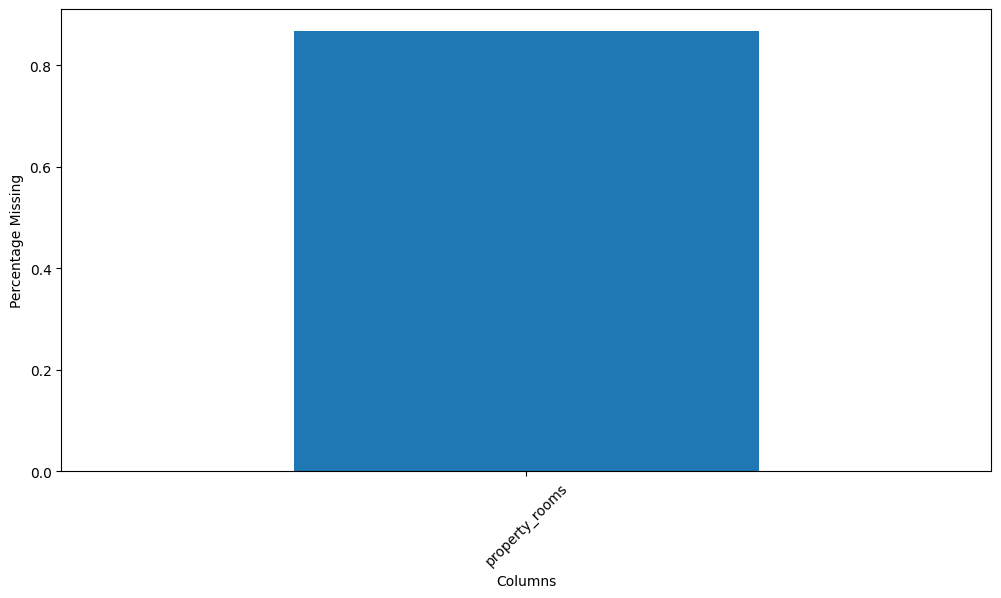

In [70]:
plot_missing_by_column(ds_train[['property_rooms']])

Como las que quedan sin datos son pocas observaciones, las eliminaremos

In [71]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


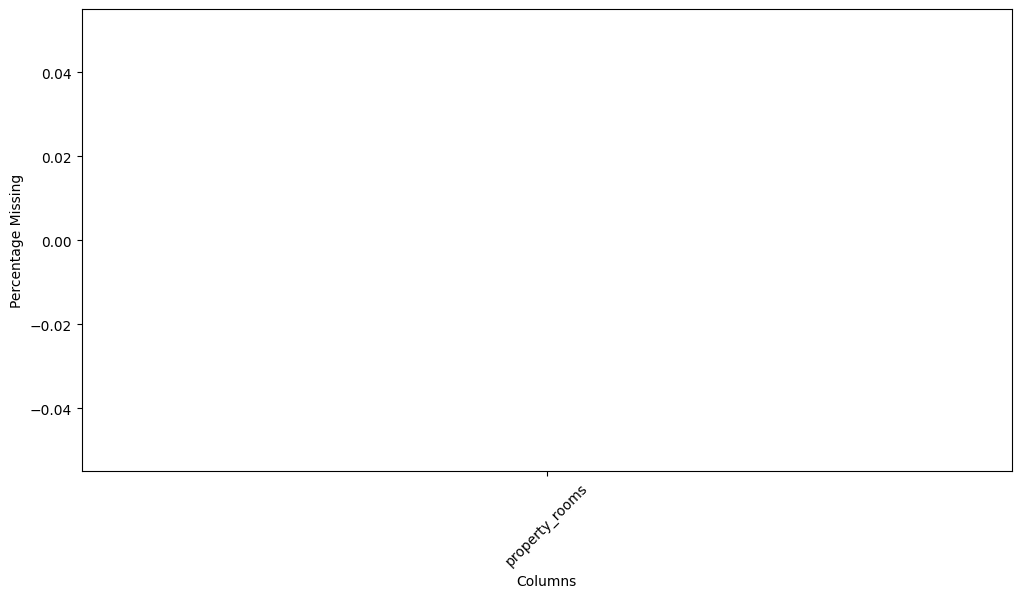

In [72]:
plot_missing_by_column(ds_train[['property_rooms']])

### Pre Imputacion de Habitaciones

property_bedrooms    11.295187
dtype: float64


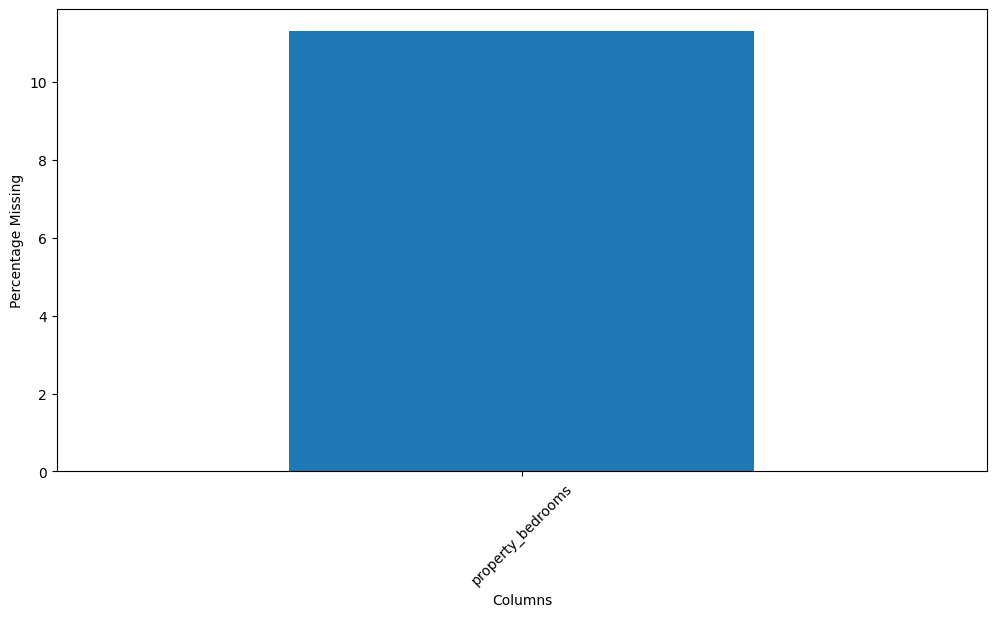

In [73]:
plot_missing_by_column(ds_train[['property_bedrooms']])

#### Reparacion de habitaciones faltantes en base a los ambientes

In [74]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas



El total de habitaciones en train es: 74607
El total de habitaciones invalidas es: 132. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18637
El total de habitaciones invalidas es: 29. Constituye al 0% de los datos del ds


id start_date end_date    latitud   longitud  \
130394  oGubrAcyAHXx5ilYS91Euw==        NaT      NaT -34.643439 -58.429532   
29406   OOz88YCCX3+F85n3z/yoiQ==        NaT      NaT -34.573955 -58.469930   
115167  Z9zRCLIVKH/KIgKLvMsstw==        NaT      NaT -34.620586 -58.439740   
150144  OwNpobSoNV+5PZJqdx/A0Q==        NaT      NaT -34.605254 -58.468938   
389699  /D5DqZYM2nZ/7R9a/Ty+Gw==        NaT      NaT -34.606923 -58.404533   
170460  hDvT3AtasnPkHjzJKm4NSA==        NaT      NaT -34.621530 -58.361752   
443898  oj7pM0UnMdxUrnbcWlN6DQ==        NaT      NaT -34.562809 -58.476758   
446099  HUuHPfUR7mXKFC4jFkiELA==        NaT      NaT -34.581798 -58.424732   
9495    OBDOu/FgK3dF4mwRcygTnA==        NaT      NaT -34.580919 -58.430717   
170461  6sUvmT1xmcR4/jzWUl7Kfw==        NaT      NaT -34.612864 -58.362658   
432011  s14IJlvWuE+oZmMurxiGpw==        NaT      NaT -34.643086 -58.435170   
116648  rc5FbdGZKitxmRAK7ssCJA==        NaT      NaT -34.647511 -58.505233   
150228  Lk0e2KiZLt5LPGGQfbj8xQ==        NaT      NaT -34.605254 -58.468938   
426286  li3VQt01Um6JdlK/+w3Kwg==        NaT      NaT -34.567114 -58.441770   
337149  cMA0xBBQnANFa/wNTQtZcw==        NaT      NaT -34.607449 -58.421950   
402516  xtmcr3kUACaydi28eIA/ZQ==        NaT      NaT -34.623056 -58.400937   
9491    ybK3GgBY+bzoeAA+YONVcQ==        NaT      NaT -34.580919 -58.430717   
115492  kRvcqrsStWAxxf/kUOa4Kg==        NaT      NaT -34.613261 -58.361513   
385730  qgnjg2cQkLeAALjoJhJl1g==        NaT      NaT -34.623053 -58.447006   
432156  bNrkEmRn2xrrFxVfXkhZ3A==        NaT      NaT -34.650316 -58.481964   
393372  7nxreTyKxab7bspnoAodSQ==        NaT      NaT -34.612133 -58.406925   
421250  FUByplvzpBHRGXpIB/c+aQ==        NaT      NaT -34.646502 -58.438508   
385580  48pQafgstnUSZLKK3E9u7A==        NaT      NaT -34.562537 -58.453923   
428691  wSKhYtj6JNFLu/pGuE4bbQ==        NaT      NaT -34.613152 -58.454014   
422322  +vPPcdUiRAfJw/r3pJhEDQ==        NaT      NaT -34.629807 -58.484938   
343791  vRgmnHhLJ5ElT+T/aUmO8A==        NaT      NaT -34.610459 -58.393132   
79035   +sZnkzGN5t45GzxOtQ4Svg==        NaT      NaT -34.581798 -58.424732   
451218  7krE2YAxkwyebVtlLkuFcA==        NaT      NaT -34.557917 -58.459907   
238661  f0A1+TKS8OCYI9kfzIZ3MQ==        NaT      NaT -34.621530 -58.361752   

                 place_l3 property_type  property_rooms  property_bedrooms  \
130394            Pompeya            PH             3.0                4.0   
29406            Belgrano          Casa             4.0                5.0   
115167          Caballito            PH             2.0                3.0   
150144           Paternal          Casa             3.0                5.0   
389699               Once  Departamento             1.0                2.0   
170460      Puerto Madero  Departamento             3.0                4.0   
443898           Congreso  Departamento             1.0                2.0   
446099            Palermo  Departamento             3.0                4.0   
9495              Palermo  Departamento             1.0                2.0   
170461      Puerto Madero  Departamento             4.0                6.0   
432011   Parque Chacabuco            PH             3.0                4.0   
116648          Mataderos            PH             3.0                4.0   
150228   Villa del Parque          Casa             3.0                5.0   
426286            Palermo          Casa             7.0                8.0   
337149            Almagro  Departamento             3.0               20.0   
402516      San Cristobal          Casa            10.0               12.0   
9491              Palermo  Departamento             1.0                2.0   
115492      Puerto Madero  Departamento             3.0                4.0   
385730          Caballito  Departamento             4.0                5.0   
432156  Parque Avellaneda            PH             4.0                5.0   
393372          Balvanera            PH            

Si tomamos en cuenta que 128 (train) y 35 (test) de los valores (0% aproximado) tienen mas habitaciones que ambientes, podriamos pensar en imputar los datos faltantes elimanando estas filas y haciendo que los valores que sean NAN, ahora sean habitaciones = ambientes - 1

In [75]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55761. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13928. Constituyen al 74% de los datos


Las habitaciones que son Ambientes - 1 son: 55797. Constituyen al 74% de los datos. Como notamos que es un valor muy representativo del dataset, optamos por imputar los datos faltantes como mencionamos antes, es decir, los ambientes que no esten vacios y que tengan habitaciones vacias, ahora tendran habitaciones = ambientes -1.

In [76]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8427
Valor inicial de habitaciones faltantes en el ds de test: 2104


In [77]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [78]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

### Post Imputacion de habitaciones

property_bedrooms    0.0
dtype: float64


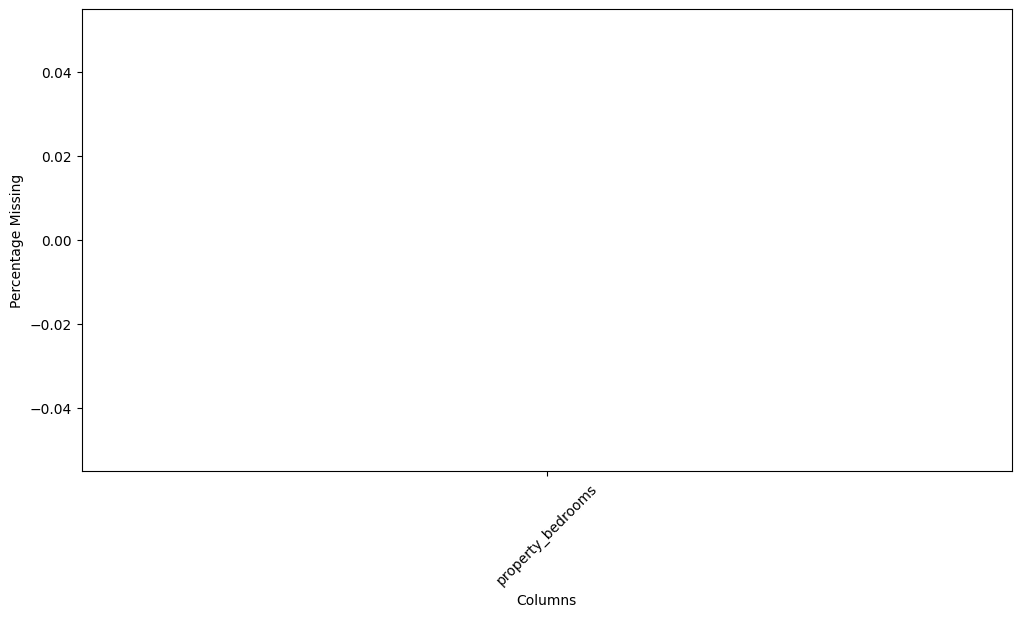

In [79]:
plot_missing_by_column(ds_train[['property_bedrooms']])

### Pre Imputación de Superficie total

property_surface_total    4.907046
dtype: float64


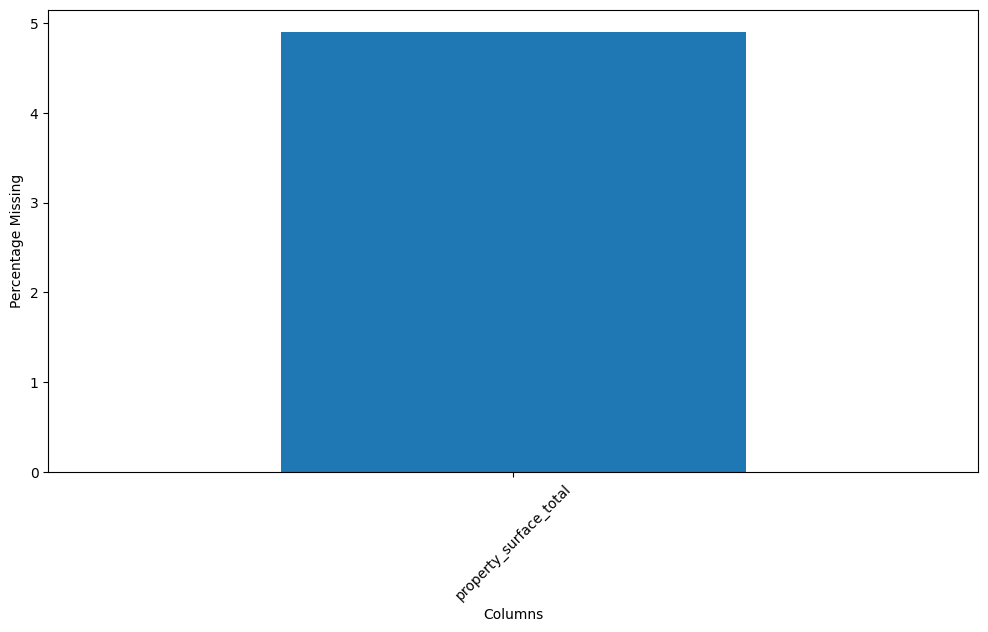

In [80]:
plot_missing_by_column(ds_train[['property_surface_total']])

Como a simple vista muchos registros tienen superficie cubierta, veremos en cuantos faltan ambos datos

In [81]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

#### Reparación de datos faltantes en superficie cubierta

Como todos los datos tienen la superficie cubierta, repararemos estos datos tomando ese valor como superficie total

In [82]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

### Post Imputación de Superficie total

property_surface_total    0.0
dtype: float64


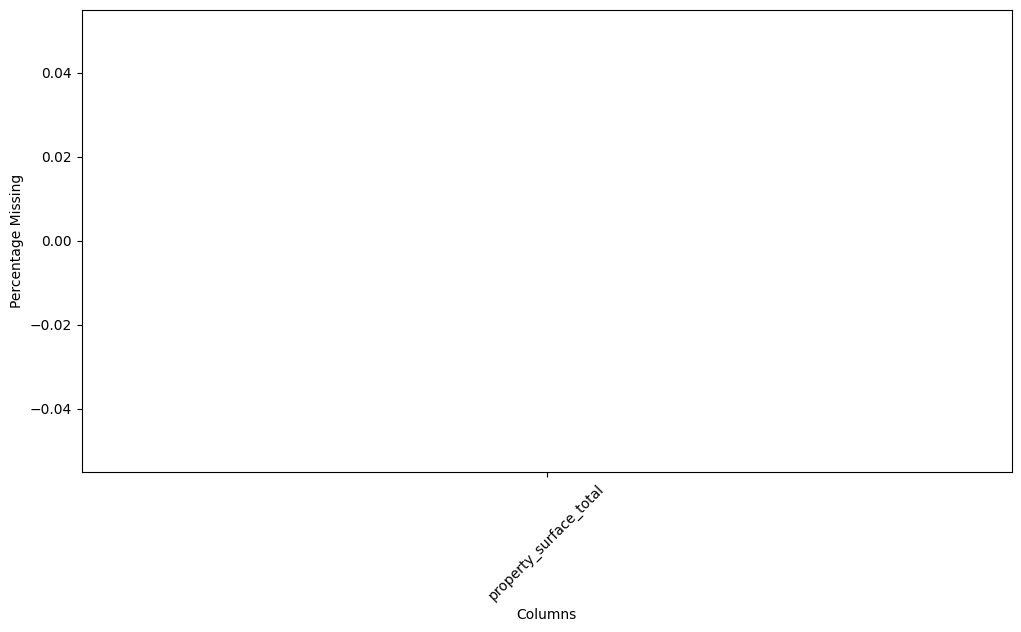

In [83]:
plot_missing_by_column(ds_train[['property_surface_total']])

### Pre Imputación de superficie cubierta

In [84]:
ds_train[ds_train.property_surface_covered.isna()]

id start_date   end_date    latitud   longitud  \
88383   XNEPNVyM/xP9p3MTWkx0Fg== 2021-05-14 2021-06-05 -34.622400 -58.422980   
346863  J/mTuLpxi51Dps0SmoDxcQ== 2021-09-30 2022-01-27 -34.619447 -58.464043   
167703  cVw7xc+vTOTigorQ6eXmmg== 2021-04-30 2021-06-05 -34.560890 -58.452093   
368568  z8L2em1CSnh2wQ9+9POvdQ== 2021-05-06 2021-06-05 -34.580663 -58.412521   
259023  Qgy7pmJ4NulNrdbxa8a7MQ== 2021-12-13 2021-12-23 -34.555436 -58.475303   
...                          ...        ...        ...        ...        ...   
46030   xv5U1vQsIC4HDJl6A2vL+g== 2021-04-21 2021-06-05 -34.621983 -58.416196   
229308  WyzobikCfHqMh43u1jTe2A== 2021-03-08 2021-04-14 -34.598450 -58.440311   
183795  40pYZR6bKF6Jm0+pPVLvWQ== 2021-04-18 2021-04-27 -34.563402 -58.463990   
414918  jsJ7q4oeEkh1Z7i0c3xnNg== 2021-09-08 2021-10-06 -34.579067 -58.432334   
388499  FCQIOQEunece3PQr6/5F0Q== 2021-10-12 2021-11-13 -34.573192 -58.422304   

            place_l3 property_type  property_rooms  property_bedrooms  \
88383          Boedo          Casa             4.0                3.0   
346863        Flores  Departamento             3.0                2.0   
167703      Belgrano  Departamento             5.0                4.0   
368568       Palermo  Departamento             3.0                2.0   
259023         Nuñez  Departamento             3.0                2.0   
...              ...           ...             ...                ...   
46030          Boedo            PH             4.0                3.0   
229308  Villa Crespo  Departamento             3.0                2.0   
183795      Belgrano  Departamento             2.0                1.0   
414918       Palermo  Departamento             3.0                2.0   
388499       Palermo  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
88383                    105.0                       NaN        219000.0   
346863                    60.0                       NaN        140000.0   
167703                   193.0                       NaN        560000.0   
368568                   100.0                       NaN        470000.0   
259023                    83.0                       NaN        100000.0   
...                        ...                       ...             ...   
46030                    110.0                       NaN        159000.0   
229308                    68.0                       NaN        159000.0   
183795                    50.0                       NaN        132000.0   
414918                   238.0                       NaN        286000.0   
388499                   110.0                       NaN        375000.0   

                                           property_title  
88383                                        Casa - Boedo  
346863  Inmejorable 3 ambientes con baño y toil con am...  
167703  Depto en torre de categoria - Hermoso 5 amb 19...  
368568                       Departamento - Palermo Chico  
259023                               Departamento - Nuñez  
...                                                   ...  
46030        PH en excelente ubicación c/ terraza - Boedo  
229308  Departamento 3 ambientes luminoso en Villa Crespo  
183795   Muy lindo 2 Ambientes en Belgrano con amenities!  
414918  Barrio Norte Av Santa Fe 3400   3 amb con dep ...  
388499  Venta  Departamento Palermo Nuevo 110m2 torre ...  

[2593 rows x 13 columns]

property_surface_covered    3.475545
dtype: float64


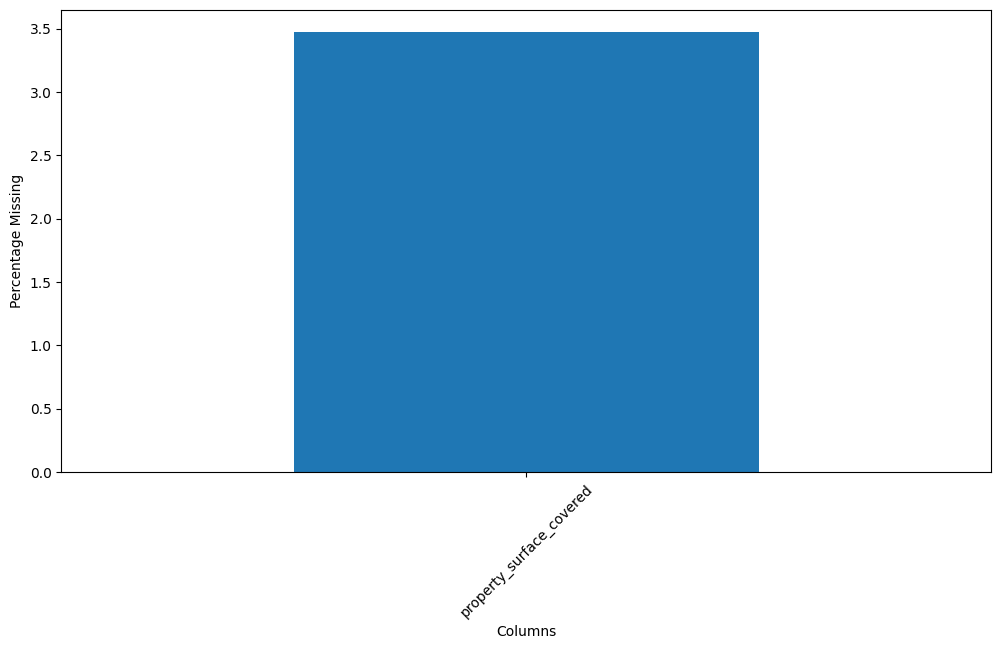

In [85]:
plot_missing_by_column(ds_train[['property_surface_covered']])

##### Reparación de datos faltantes en Superficie cubierta

Como tenemos 2672 registros nulos para la superficie cubierta, imputaremos de la misma forma los registros que son Departamentos porque su superficie total suele ser muy cercana a la cubierta

In [86]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2345
PH               173
Casa              75
Name: property_type, dtype: int64

In [87]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [88]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 248


In [89]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 671


Los 262 registros restantes de train los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

Los 651 registros restantes de test tambien los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

In [90]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

Volvemos a evaluar el porcentaje de datos faltantes

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.215172
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


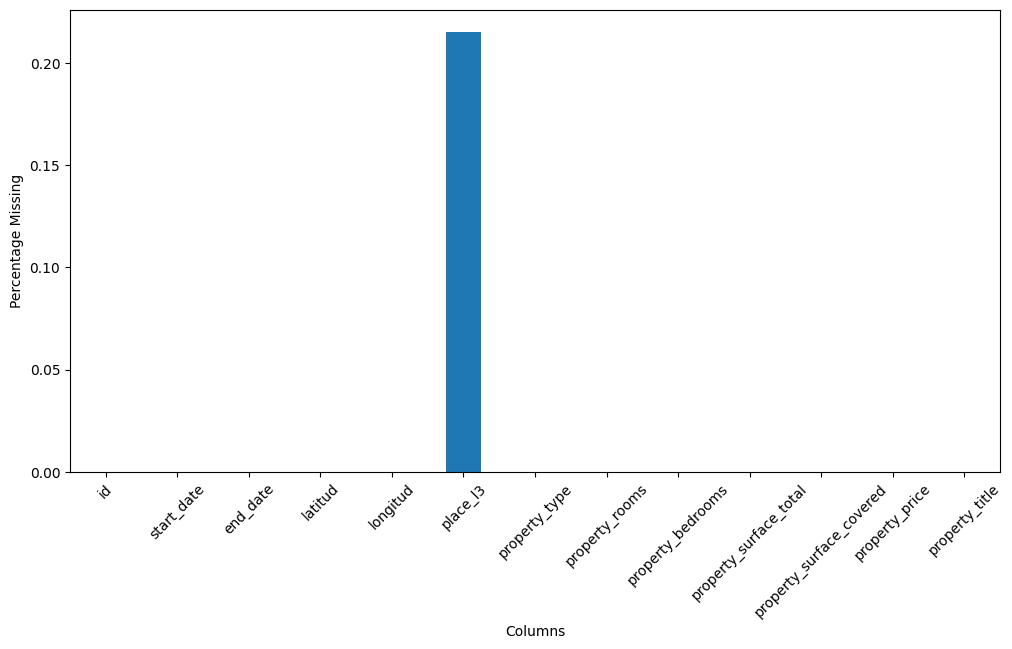

In [91]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

## Grafico de los barrios de CABA

In [92]:
# Proceso el archivo de los barrios de CABA
barrios = gpd.read_file('./barrios.geojson')
barrios.head()

NameError: name 'gpd' is not defined

In [ ]:
# Realizo el grafico de los barrios de CABA
fig, ax = plt.subplots(figsize=(8, 10))
barrios.plot(column='BARRIO', categorical=True, legend=True, ax=ax, cmap='tab20b')

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.4, 1.2))

ax.set(title='Barrios CABA')
plt.show()

## Analisis de Valores Atipicos

### Univariados

#### Metodo IQR

In [93]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()


In [94]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max

In [95]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

##### Ambientes

cantidad de datos del ds: 74359
outliers encontrados para los property_rooms: 1154
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


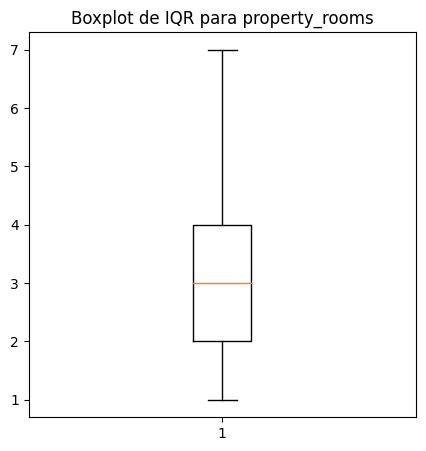

In [96]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

Tomaremos 7 como límite superior y 0 como límite inferior ya que no tiene sentido que haya cantidad de habitaciones negativas.

In [97]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")



Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 589. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 137. Constituyen al 0% de los datos


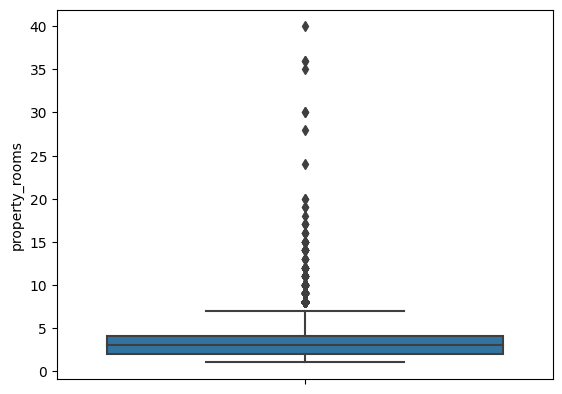

In [98]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Eliminamos los ambientes que son > 7 ya que rompen la media y representan solamente a un porcentaje minúsculo del dataset (1% sobre el 100% del ds).

In [99]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


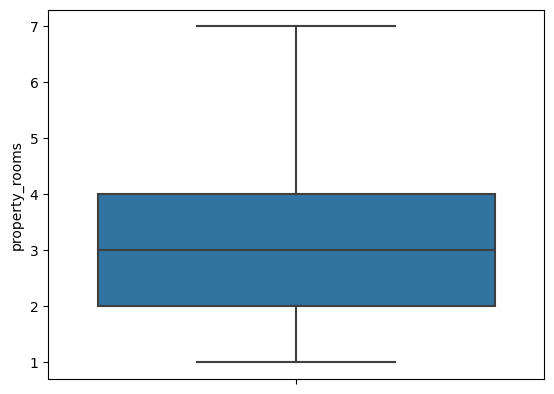

In [100]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Habitaciones

Moderated outliers limits [min: -0.5,max: 3.5]
Severe outliers limits [min: -2.0,max: 5.0]


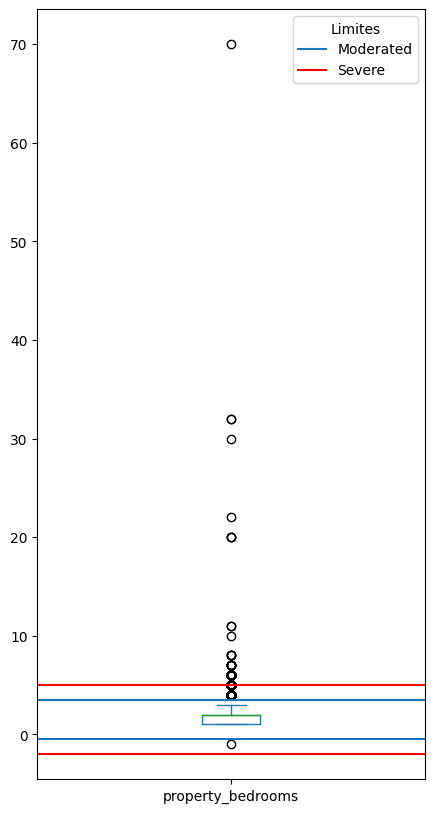

In [101]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73770
outliers encontrados para los property_bedrooms: 4354
hay 5% de outliers de property_bedrooms sobre el ds
limit sup: 3.5, limite inf: -0.5


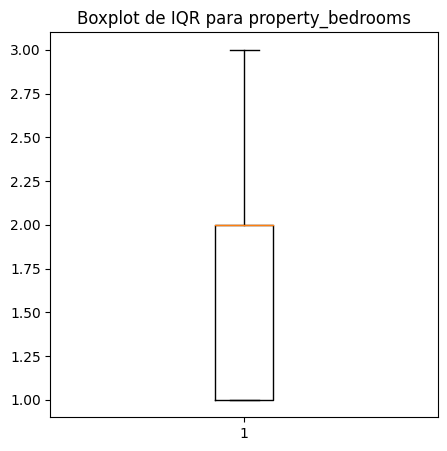

In [102]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [103]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")


Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 27. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 7. Constituyen al 0% de los datos


###### Eliminaremos una observacion en particular que fue detectada como outlier ya que dice tener -1 habitaciones. Este valor no tiene ningun sentido logico en nuestro domino de problema.


In [104]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar:                               id start_date   end_date    latitud   longitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg== 2021-01-07 2021-03-18 -34.577595 -58.495185   

             place_l3 property_type  property_rooms  property_bedrooms  \
406880  Villa Urquiza  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  \
406880                    61.0                      43.0        125000.0   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en train
filas a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en test


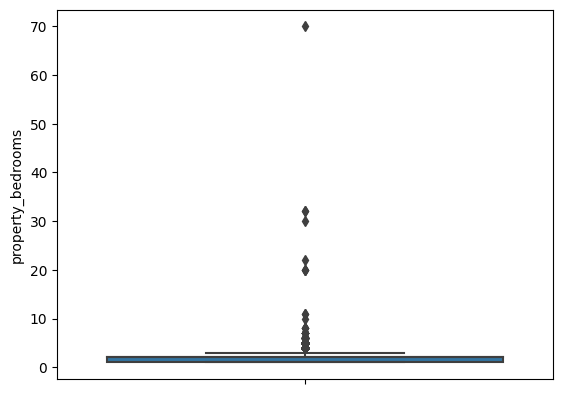

In [105]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

###### Cuando analizamos los valores atipicos detectados notamos que algunas observaciones eran mayores a los ambientes, esto no es posible en nuestro dominio de problema. Por ende, procederemos a eliminarlos. Podemos hacer esto ya que estos valores representan un valor minusculo del dataset.

In [106]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_bedrooms])}")

Ejemplos: 


14

In [107]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 27 registros en train
Se han eliminado: 7 registros en test


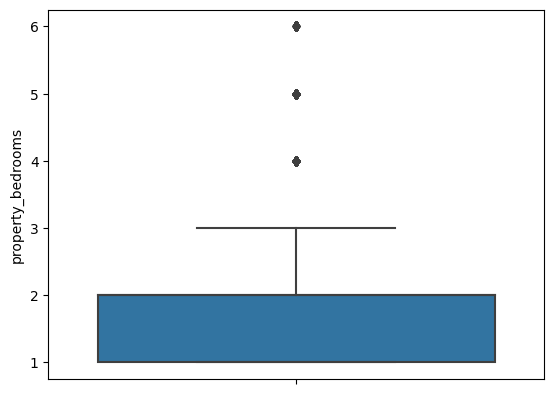

In [108]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

##### Superficie Total

cantidad de datos del ds: 73742
outliers encontrados para los property_surface_total: 5916
hay 8% de outliers de property_surface_total sobre el ds
limit sup: 186.5, limite inf: -41.5


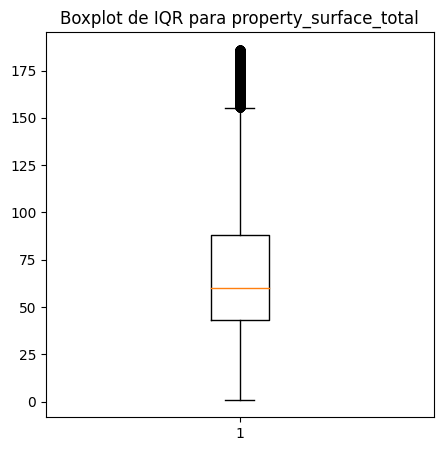

In [109]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

Elegimos tomar como outlier a viviendas que tengan una superifice menor a 18 ya que, en base a los documentos que leimos, este es el minimo necesario para que una persona viva en una vivienda. 18 m2 minimo. Observar los links adjuntos:

https://observatoriociudad.org/microdepartamentos-y-codigo-de-edificacion/

http://ssplan.buenosaires.gob.ar/webfiles/100_preguntas/ce_art_3_8_1_1_1_areas_y_lados_minimos_de_locales_de_vivienda_individual_y_colectiva.pdf

###### Eliminaremos las viviendas que tienen menos de 18 m2 de superficie

In [110]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 78 registros en train
Se han eliminado: 16 registros en test


In [111]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -127.0, 272.0


In [112]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")


Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5574. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1344. Constituyen al 7% de los datos


Visualizamos nuevamente el box-plot para entender que valores tienen las nuevas observaciones atipicas y ver si debemos seguir eliminando

Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


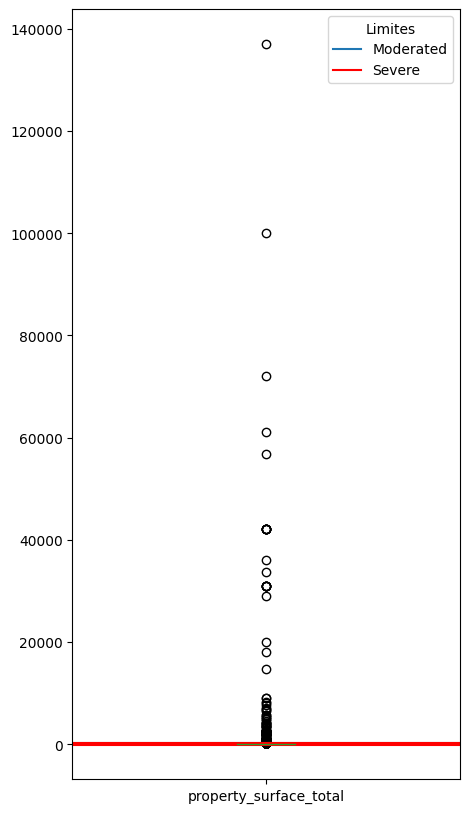

In [113]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

Como tenemos outliers muy altos, el boxplot no se aprecia. Tomaremos solo los outliers severos para un primer análisis

0-272       3242
272-500     2039
500-750      181
1000-inf      90
750-1000      22
Name: property_surface_total, dtype: int64


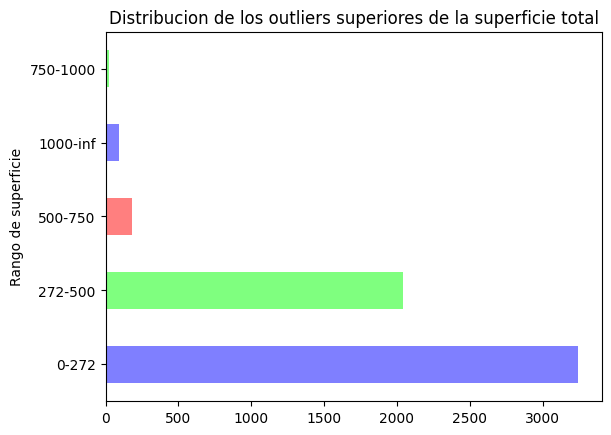

In [114]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [115]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")

Si bien la mediana de la superficite total es 220.0 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [116]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers superiores de sup total en train son: 293. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 293. Constituyen al 0% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


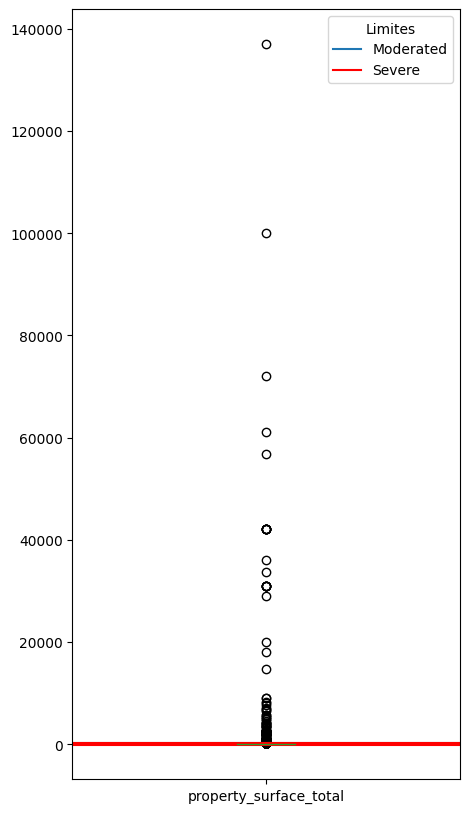

In [117]:
boxplot_with_outliers(ds_train, 'property_surface_total')

###### Procederemos a eliminar las superifices mayores a 500m^2

In [118]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 293 registros en train
Se han eliminado: 74 registros en test


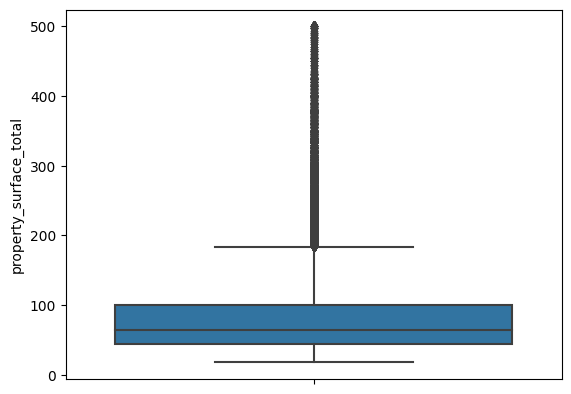

In [119]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

##### Superficie cubierta

cantidad de datos del ds: 73371
outliers encontrados para los property_surface_covered: 5852
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


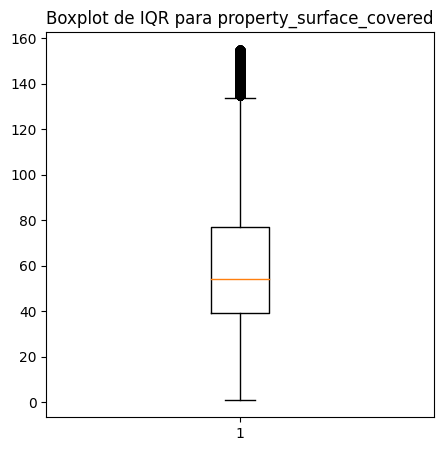

In [120]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [121]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5758. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1310. Constituyen al 7% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


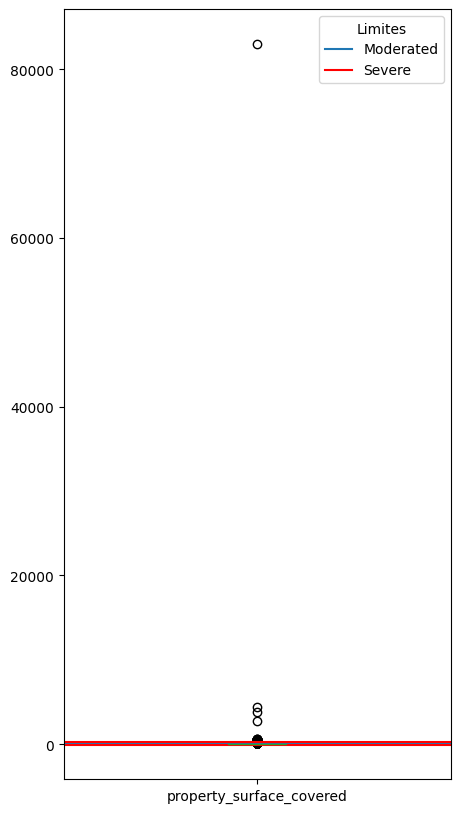

In [122]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Como hay algunas observacion demasiado anómalas, las excluímos para ver mejor

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


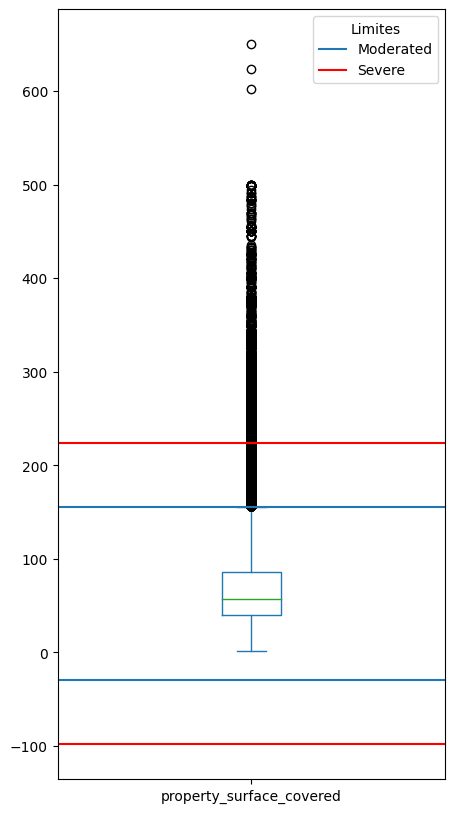

In [123]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3218
224-500     2274
500-750       55
1000-inf      20
750-1000       7
Name: property_surface_covered, dtype: int64


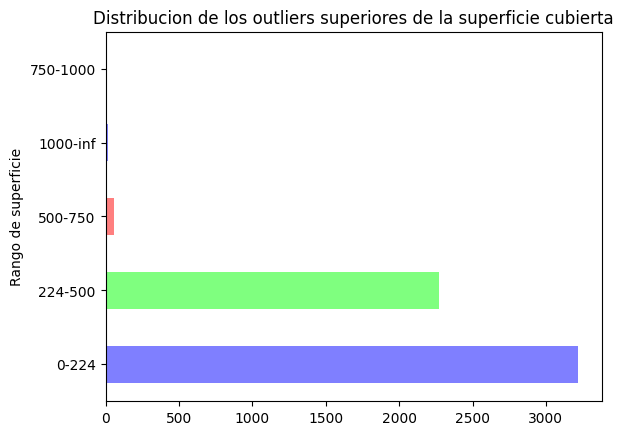

In [124]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

Inspeccionaremos los datos que se encuentran entre 224 y 500 $m^2$ de superficie cubierta

###### Como decidimos tomar como maximo valor de superificie total 500m^2, ese tambien va a ser nuestro maximo limite para la superificie cubierta para mantener la coherencia y el sentido en nuestro dominio. Procederemos a eliminar los valores que se encuentren por arriba. 

In [125]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 7 registros en train
Se han eliminado: 0 registros en test


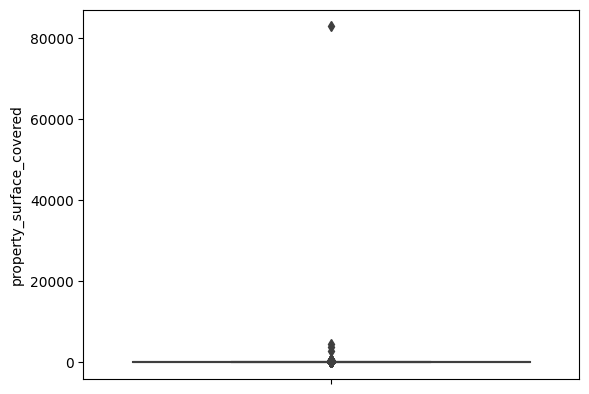

In [126]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

##### Latitud y longitud

cantidad de datos del ds: 73371
outliers encontrados para los latitud: 419
hay 0% de outliers de latitud sobre el ds
limit sup: -34.519934924999994, limite inf: -34.672864325


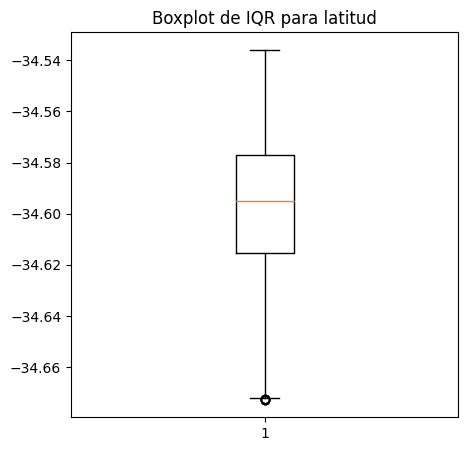

In [127]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73371
outliers encontrados para los longitud: 89
hay 0% de outliers de longitud sobre el ds
limit sup: -58.324721125, limite inf: -58.54988612500001


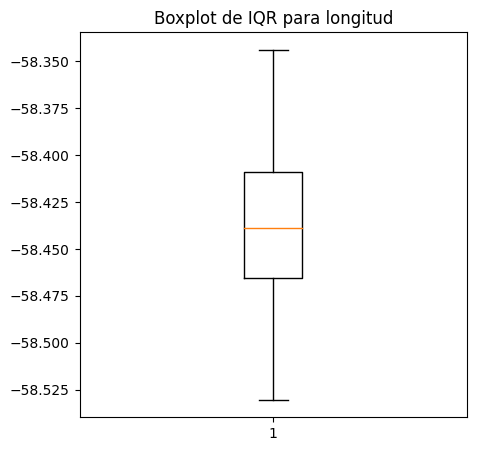

In [128]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

Los datos de latitud y longitud son dificiles de analizar por medio del rango intercuartil dado que los datos representan variaciones muy pequeñas y no son faciles de imaginar sin una ubicación en el mapa. Haremos este análisis más adelante.

In [129]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73294. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 77. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17713. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 19. Constituyen al 0% de los datos


#### Metodo Z score

In [130]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

Analisis de outliers con el metodo zscore para los ambientes

##### Ambientes

In [131]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para el caso de la variable Rooms

In [132]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 506. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 506. Constituyen al 2% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos


Aunque Zscore haya encontrado outliers, no consideramos que haya algun motivo valido para borrar estos datos. Por otro lado, corrimos Zscore modificado y despues de haber borrado los outliers por el metodo de IQR, no detecto ningun outlier. Proseguiremos sin borrar mas nada para rooms

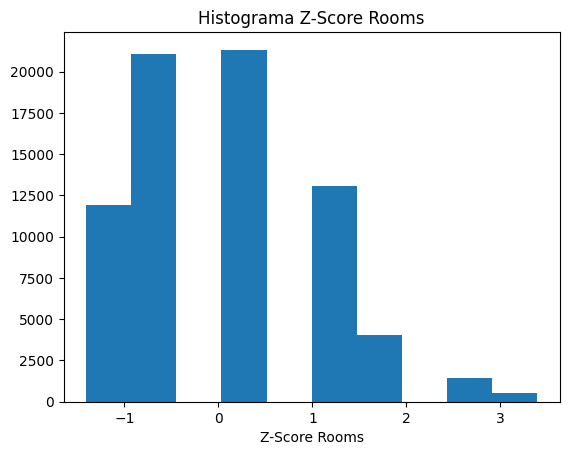

In [133]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

##### Habitaciones

In [134]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [135]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 656.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 656.Constituyen al 3% de los datos


id start_date   end_date    latitud   longitud  \
209423  qjq9ef1ldmOdeygQaqqQCQ== 2021-11-29 2022-01-27 -34.594110 -58.377692   
371609  YKdLXAln24tHF0+DuEekeA== 2021-04-24 2021-06-05 -34.622477 -58.393909   
456311  xlKMDPURi+UhF1BnSOlZ4Q== 2021-12-16 2022-02-09 -34.645203 -58.485413   
374000  wzHDmtcVqo7KwArcPLyTWQ== 2021-05-31 2021-06-05 -34.587646 -58.389200   
452859  wcGGECvHPt3lzy8pXAMcAw== 2021-12-16 2022-03-25 -34.613363 -58.445880   
...                          ...        ...        ...        ...        ...   
298960  S1CUSBrvBcpxAJmibHk55Q== 2021-06-28 2021-09-26 -34.562537 -58.453923   
104006  FMnuxCy0YQYkCkgPg37+DA== 2021-05-28 2021-06-19 -34.604267 -58.387942   
452157  aN5RFPITSEd4z1lYa2FgDw== 2021-12-16 2022-03-25 -34.594131 -58.466213   
453038  FmuREKZLqwB2U6Nr7tEkiA== 2021-12-16 2022-01-27 -34.610907 -58.375271   
18729   jbT6B64120xkmQ5mYHxPTA== 2021-08-28 2021-09-02 -34.625448 -58.524920   

                 place_l3 property_type  property_rooms  property_bedrooms  \
209423       Barrio Norte  Departamento             7.0                6.0   
371609      San Cristobal            PH             6.0                5.0   
456311  Parque Avellaneda          Casa             7.0                5.0   
374000           Recoleta  Departamento             6.0                5.0   
452859          Caballito            PH             7.0                6.0   
...                   ...           ...             ...                ...   
298960           Belgrano  Departamento             6.0                5.0   
104006        San Nicolás  Departamento             5.0                5.0   
452157           Paternal          Casa             6.0                5.0   
453038          Monserrat  Departamento             6.0                5.0   
18729           Versalles          Casa             6.0                5.0   

        property_surface_total  property_surface_covered  property_price  \
209423                   380.0                     370.0        900000.0   
371609                   201.0                     154.0        185000.0   
456311                   464.0                     291.0        385000.0   
374000                   483.0                     483.0       2250000.0   
452859                   199.0                     180.0        225000.0   
...                        ...                       ...             ...   
298960                   270.0                     240.0        709000.0   
104006                   157.0                     157.0        200000.0   
452157                   288.0                     211.0        284000.0   
453038                   244.0                     244.0        260000.0   
18729                    300.0                     200.0        400000.0   

                                           property_title  z_property_bedrooms  
209423  Departamento - Retiro -Basavilbaso entre Arena...             4.345557  
371609                                 PH - San Cristobal             3.295248  
456311   CASA VENTA PQUE AVELLANEDA 7 AMB QUINCHO COCHERA             3.295248  
374000  DUPLEX en edificio tradicional de gran categor...             3.295248  
452859         VENTA PH CABALLITO 7 AMBIENTES CON TERRAZA             4.345557  
...                                                   ...                  ...  
298960  Venta-Departamento -6 ambientes -Barrancas de ...             3.295248  
104006    DPTO. VENTA SAN NICOLAS 5 AMB. APTO PROESIONALL             3.295248  
452157    Casa 6 ambientes con quincho y jardin, Paternal             3.295248  
453038  Venta o alquiler de  piso de oficina Av Julio ...             3.295248  
18729      Venta casa de 6 ambientes en Versalles Permuta             3.295248  

[656 rows x 14 columns]

In [136]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

Mismo caso que para los rooms, al haber borrado los outliers de bedrooms por el metodo IQR notamos que al correr Zscore modificado ya no hay outliers aunque Zscore si detecta algunos. No los eliminaremos porque tras analizar el dataset resultante no vemos ningun valor extraño en nuestro dominio.

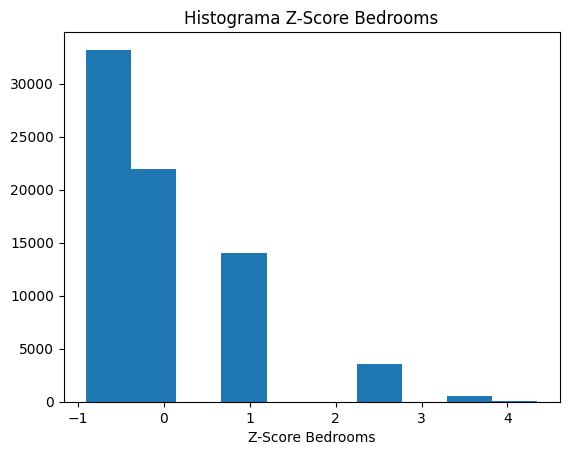

In [137]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

##### Superficie Total

In [138]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [139]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1822. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1822. Constituyen al 10% de los datos


id start_date   end_date    latitud   longitud  \
101956  DVl2N00iNvUdBnu7MN4A7g== 2021-05-28 2021-06-18 -34.611834 -58.436272   
7028    fLZiTzTF0NWN2VkZ8cNDmg== 2021-02-09 2021-06-05 -34.616624 -58.475625   
376469  +st4BaxxLvlF/zpDom8Ytw== 2021-03-18 2021-04-10 -34.567567 -58.431303   
392417  y0LKtERK2bYVyQQyqc+hrw== 2021-10-28 2022-03-31 -34.547911 -58.456533   
54482   kB4vTdnPVwbFi0QRSO8SUA== 2021-07-04 2021-07-04 -34.631028 -58.527817   

                place_l3 property_type  property_rooms  property_bedrooms  \
101956         Caballito          Casa             5.0                4.0   
7028    Villa Santa Rita          Casa             6.0                4.0   
376469           Palermo  Departamento             5.0                4.0   
392417             Nuñez  Departamento             6.0                4.0   
54482          Versalles          Casa             5.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
101956                   360.0                     197.0        399500.0   
7028                     300.0                     240.0        360000.0   
376469                   400.0                     400.0       3500000.0   
392417                   455.0                     455.0       2950000.0   
54482                    499.0                     351.0        550000.0   

                                           property_title  \
101956    Venta Casa 5 Amb Jardín Patio Terraza Caballito   
7028              Venta Casa 6 amb Patio Terraza Parrilla   
376469                             Departamento - Palermo   
392417  VENTA exclusivo piso MUY ALTO en CHATEAU LIBER...   
54482     CHALET con PARQUE y OPCION SALIDA CALLE TRASERA   

        z_property_surface_total  
101956                  4.168459  
7028                    3.256182  
376469                  4.776643  
392417                  5.612897  
54482                   6.281900

In [140]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore como outliers son aquellas viviendas que tienen mas de 200 m^2 pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

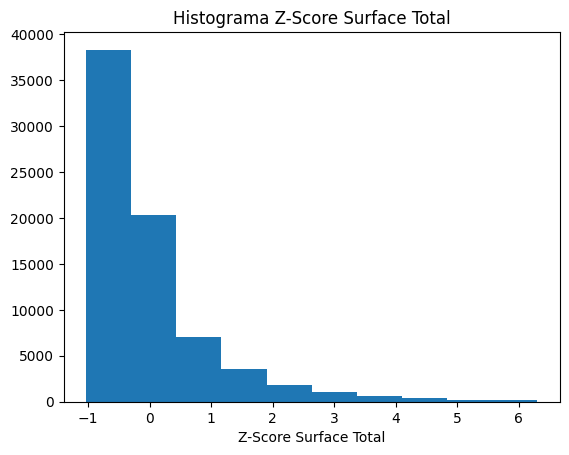

In [141]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

##### Superficie Cubierta

In [142]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [143]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 4. Constituyen al 0% de los datos
Los outliers superiores de sup cubierta en test son: 4. Constituyen al 0% de los datos


id start_date                      end_date  \
354376  oSruKb4+uOYztGpv3h5FKA== 2021-11-04 2022-01-27 00:00:00.000000000   
199905  EDZUWORq83zRgdk9Zqlv+A== 2021-07-25 2021-10-07 13:52:48.088804171   
438160  mzH1lMHi7l9z9MTU0eMRVg== 2021-10-27 2022-01-04 00:00:00.000000000   
30359   rpeGyTLDvloNDFf/CSF6Aw== 2021-10-15 2022-01-27 00:00:00.000000000   

          latitud   longitud          place_l3 property_type  property_rooms  \
354376 -34.579394 -58.453519        Colegiales  Departamento             3.0   
199905 -34.604362 -58.392366      Barrio Norte  Departamento             4.0   
438160 -34.630704 -58.400901  Parque Patricios  Departamento             1.0   
30359  -34.620717 -58.375060         San Telmo  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
354376                2.0                    41.0                    3837.0   
199905                3.0                    83.0                   83000.0   
438160                1.0                    31.0                    2700.0   
30359                 1.0                    48.0                    4435.0   

        property_price                                     property_title  \
354376         83000.0                          Departamento - Colegiales   
199905        155000.0                AMPLIO DEPTO  EN VENTA BARRIO NORTE   
438160         71500.0  DEPARTAMENTO - PQUE.PATRICIOS, 2 AMBIENTES,  B...   
30359          93500.0             Dptos 2 amb a estrenar en San Telmo!!!   

        z_property_surface_covered  
354376                   12.050130  
199905                  265.687698  
438160                    8.407192  
30359                    13.966117

In [144]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

Los outliers encontrados por Zscore son los valores que decidimos mantener. Se encuentran en el rango de > 200m^2 y < 500m^2. No eliminaremos nada. 

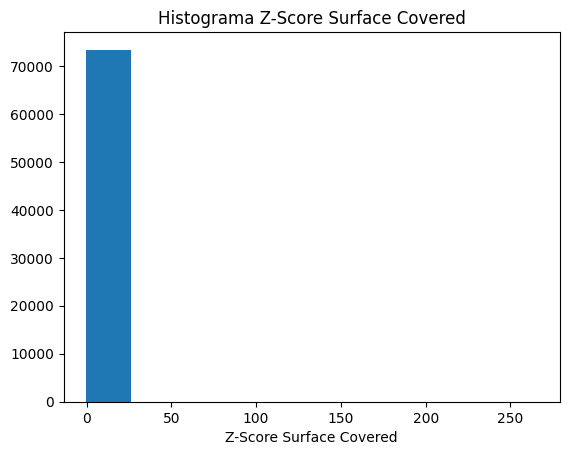

In [145]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

##### Latitud y Longitud

In [146]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [147]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 78. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 78. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
190872  i4/0KG7vU2s7mHcWwZjgHA== 2021-11-01 2022-01-27 -31.343807 -64.336648   
102594  3Ev2cyd+v7SL0HgAq4h6eA== 2021-05-28 2021-06-05 -33.030773 -60.627277   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 -32.065926 -64.527838   
333522  fITlGgHl9wOxBHUIYOTQ6Q== 2021-12-28 2022-01-27 -31.431335 -64.509355   
45532   XdZsZLmbXUPzQFsMs6J4dA== 2021-05-02 2021-06-05 -31.369084 -64.584422   
...                          ...        ...        ...        ...        ...   
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
318763  21X2XW7KwPHKb73K0LDWUg== 2021-03-17 2021-06-05 -27.469213 -58.830635   
54727   eXTGEc1mJr1WGJSJBLo+LA== 2021-01-11 2021-02-09 -31.664340 -63.885916   
308524  5gULcuCymCY+LG4gkqts3w== 2021-04-28 2021-07-17 -33.081030 -68.468140   
249721  qSkfd71p7RwwsJ8xFMQ0gQ== 2021-04-29 2021-05-19 -33.081030 -68.468140   

       place_l3 property_type  property_rooms  property_bedrooms  \
190872      NaN          Casa             4.0                3.0   
102594      NaN  Departamento             5.0                3.0   
45536       NaN          Casa             3.0                2.0   
333522      NaN  Departamento             3.0                2.0   
45532       NaN          Casa             3.0                2.0   
...         ...           ...             ...                ...   
226093      NaN  Departamento             2.0                1.0   
318763      NaN  Departamento             2.0                1.0   
54727       NaN          Casa             5.0                4.0   
308524      NaN  Departamento             3.0                2.0   
249721      NaN  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
190872                   212.0                     140.0         65000.0   
102594                   430.0                     430.0         73000.0   
45536                    307.0                     106.0        139000.0   
333522                    90.0                      80.0         70000.0   
45532                    300.0                      70.0         58000.0   
...                        ...                       ...             ...   
226093                    51.0                      51.0         85000.0   
318763                    55.0                      55.0        125000.0   
54727                    145.0                     145.0        190000.0   
308524                    49.0                      44.0         57000.0   
249721                    80.0                      66.0        145000.0   

                                           property_title  z_latitud  
190872                                  Casa en La Calera  20.788563  
102594                                 OPORTUNIDAD VENTA    9.996751  
45536   Se Vende Casa Amoblada en Santa Rosa de Calamu...  16.169044  
333522           departamento en venta frente al fantasio  20.228628  
45532   Casa en venta Tanti a 8 cuadras de la ruta 2 d...  20.626861  
...                                                   ...        ...  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...   9.675250  
318763  2 Ambientes de 70 mts2 reciclado a Nuevo. Con ...  45.574996  
54727        VENTA CASA CON PILETA Y COCHERA - B° PRIVADO  18.738057  
308524  Oportunidad, dpto.  3 amb en condominio c/cochera   9.675250  
249721  Venta departamento 3 amb c/cochera S.Martín Ce...   9.675250  

[78 rows x 14 columns]

In [148]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 9. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 9. Constituyen al 0% de los datos


id start_date                      end_date  \
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 13:52:48.088804171   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
131188 -41.083002 -71.182747      NaN  Departamento             2.0   
106297 -41.086352 -71.185720      NaN  Departamento             2.0   
155333 -41.164123 -71.415420      NaN          Casa             3.0   
106288 -40.131723 -71.299436      NaN  Departamento             2.0   
105792 -41.084900 -71.187159      NaN  Departamento             1.0   
324200 -38.940227 -68.073865      NaN  Departamento             3.0   
208085 -41.085373 -71.185766      NaN  Departamento             2.0   
457631 -53.788624 -67.718089      NaN  Departamento             3.0   
410404 -38.964493 -68.075830      NaN          Casa             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
131188                1.0                    66.0                      56.0   
106297                1.0                    53.0                      53.0   
155333                2.0                    70.0                      70.0   
106288                1.0                    44.0                      44.0   
105792                1.0                    53.0                      53.0   
324200                2.0                    55.0                      55.0   
208085                1.0                    60.0                      50.0   
457631                2.0                   121.0                     100.0   
410404                5.0                   218.0                     218.0   

        property_price                                     property_title  \
131188        135000.0  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO    
106297        145000.0  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...   
155333        380000.0  HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C...   
106288        105000.0  Hermoso departamento en venta, totalmente equi...   
105792        145000.0  Villa Huapi - Dina Huapi - Río Negro - APTO CR...   
324200        120000.0  DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...   
208085        142000.0  Excelente departamento en venta en Dina Huapi ...   
457631        375000.0                Depto 3 ambientes Arboris Las Lomas   
410404        230000.0  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...   

         z_latitud  
131188  -41.514724  
106297  -41.536156  
155333  -42.033671  
106288  -35.429231  
105792  -41.526864  
324200  -27.807028  
208085  -41.529895  
457631 -122.794747  
410404  -27.962264

Comprarandolo con los valores de lat/long del gráfico de CABA, podemos ver que los datos corresponden a valores que no están dentro del rango. Procederemos a eliminarlos en base al zscore.

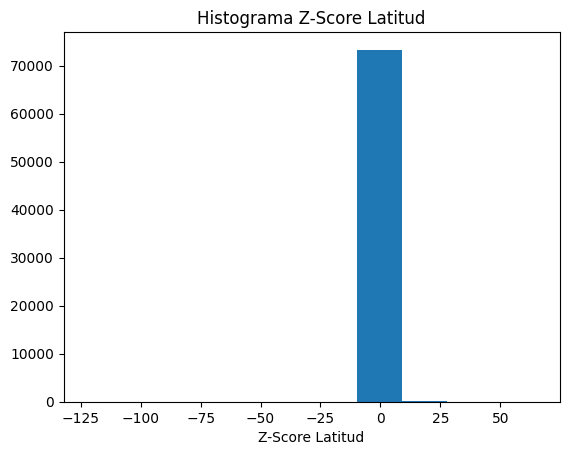

In [149]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [150]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id start_date   end_date    latitud   longitud  \
265075  cfQOjnbFBa7yBI/y8/AWlA== 2021-11-19 2022-01-27 -34.597965 -58.421136   
450176  Si5DNdNP5YxcS1Zl/80f0A== 2021-12-16 2022-02-09 -34.579836 -58.447115   
408274  Rcr1PNtQL6qx1TUiPlNvyw== 2021-03-05 2021-06-05 -34.561177 -58.451993   
379947  XwVj/FebvA7Qx0lCm7pMwA== 2021-05-19 2021-09-18 -34.602711 -58.391107   
232940  NATAc2wIFneugCG+lN2P5g== 2021-03-20 2022-02-09 -34.601441 -58.416935   

          place_l3 property_type  property_rooms  property_bedrooms  \
265075     Almagro  Departamento             2.0                1.0   
450176     Palermo  Departamento             1.0                1.0   
408274    Belgrano  Departamento             4.0                2.0   
379947  Tribunales  Departamento             7.0                3.0   
232940     Almagro  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
265075                    39.0                      39.0         68000.0   
450176                    48.0                      37.0         95000.0   
408274                   102.0                      79.0        258000.0   
379947                   158.0                     158.0        260000.0   
232940                    80.0                      74.0        185000.0   

                                          property_title  z_latitud  
265075            Av. Córdoba al 3800 - 2 amb. - Almagro  -0.028838  
450176          VENTA MONOAMBIENTE CON BALCON A ESTRENAR   0.087135  
408274                           Departamento - Belgrano   0.206500  
379947           VENTA PISO ESTILO FRANCES EN TRIBUNALES  -0.059202  
232940  VENTA DEPARTAMENTO 3 AMBIENTES COCHERA AMENITIES  -0.051074

In [151]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 6. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 6. Constituyen al 0% de los datos


id start_date   end_date   latitud   longitud  \
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   

       place_l3 property_type  property_rooms  property_bedrooms  \
220851      NaN          Casa             4.0                2.0   
187631      NaN  Departamento             5.0                4.0   
405382      NaN          Casa             3.0                2.0   
234893      NaN  Departamento             4.0                3.0   
241662      NaN          Casa             4.0                3.0   
173667      NaN  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
220851                   105.0                     105.0        190000.0   
187631                   158.0                     150.0        380000.0   
405382                   205.0                     102.0        125000.0   
234893                    98.0                      88.0        269000.0   
241662                   230.0                     200.0        255000.0   
173667                    98.0                      88.0        269000.0   

                                           property_title  z_longitud  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.022268  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    3.540177  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   17.173558  
234893  Venta departamento 4 amb Vicente Lopez con cochea   11.745315  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   17.173558  
173667  Venta departamento 4 amb Vicente Lopez con cochea   11.745315

In [152]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 80. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 80. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
190872  i4/0KG7vU2s7mHcWwZjgHA== 2021-11-01 2022-01-27 -31.343807 -64.336648   
102594  3Ev2cyd+v7SL0HgAq4h6eA== 2021-05-28 2021-06-05 -33.030773 -60.627277   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 -32.065926 -64.527838   
333522  fITlGgHl9wOxBHUIYOTQ6Q== 2021-12-28 2022-01-27 -31.431335 -64.509355   
45532   XdZsZLmbXUPzQFsMs6J4dA== 2021-05-02 2021-06-05 -31.369084 -64.584422   
...                          ...        ...        ...        ...        ...   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 -38.964493 -68.075830   
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
54727   eXTGEc1mJr1WGJSJBLo+LA== 2021-01-11 2021-02-09 -31.664340 -63.885916   
308524  5gULcuCymCY+LG4gkqts3w== 2021-04-28 2021-07-17 -33.081030 -68.468140   
249721  qSkfd71p7RwwsJ8xFMQ0gQ== 2021-04-29 2021-05-19 -33.081030 -68.468140   

       place_l3 property_type  property_rooms  property_bedrooms  \
190872      NaN          Casa             4.0                3.0   
102594      NaN  Departamento             5.0                3.0   
45536       NaN          Casa             3.0                2.0   
333522      NaN  Departamento             3.0                2.0   
45532       NaN          Casa             3.0                2.0   
...         ...           ...             ...                ...   
410404      NaN          Casa             7.0                5.0   
226093      NaN  Departamento             2.0                1.0   
54727       NaN          Casa             5.0                4.0   
308524      NaN  Departamento             3.0                2.0   
249721      NaN  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
190872                   212.0                     140.0         65000.0   
102594                   430.0                     430.0         73000.0   
45536                    307.0                     106.0        139000.0   
333522                    90.0                      80.0         70000.0   
45532                    300.0                      70.0         58000.0   
...                        ...                       ...             ...   
410404                   218.0                     218.0        230000.0   
226093                    51.0                      51.0         85000.0   
54727                    145.0                     145.0        190000.0   
308524                    49.0                      44.0         57000.0   
249721                    80.0                      66.0        145000.0   

                                           property_title  z_longitud  
190872                                  Casa en La Calera  -23.461063  
102594                                 OPORTUNIDAD VENTA    -8.688529  
45536   Se Vende Casa Amoblada en Santa Rosa de Calamu...  -24.222478  
333522           departamento en venta frente al fantasio  -24.148869  
45532   Casa en venta Tanti a 8 cuadras de la ruta 2 d...  -24.447822  
...                                                   ...         ...  
410404  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...  -38.352322  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...  -39.914693  
54727        VENTA CASA CON PILETA Y COCHERA - B° PRIVADO  -21.666028  
308524  Oportunidad, dpto.  3 amb en condominio c/cochera  -39.914693  
249721  Venta departamento 3 amb c/cochera S.Martín Ce...  -39.914693  

[80 rows x 14 columns]

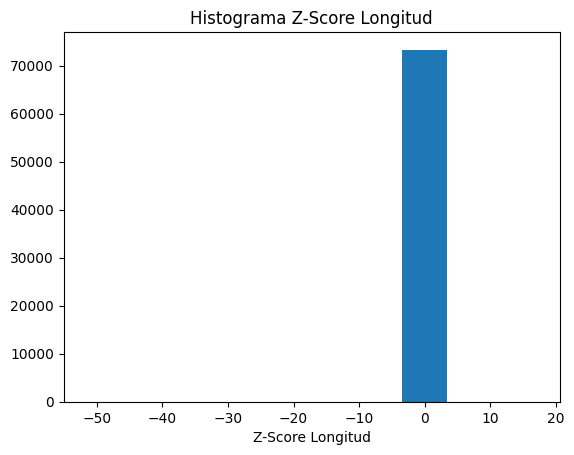

In [153]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

#### Metodo Z Score modificado

In [154]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

##### Ambientes

In [155]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para la variable Rooms en el zscore modificado

In [156]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [157]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

Notamos que despues de haber borrado los outliers por el metodo de IQR para rooms, no se detectan outliers por este metodo. Lo mas seguro es que hayan sido outliers compartidos, al borrarlos por un metodo la interseccion nos da vacio.

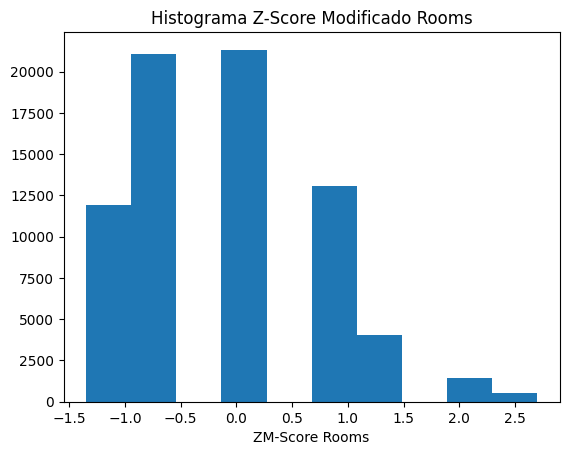

In [158]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

##### Habitaciones

In [159]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [160]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [161]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

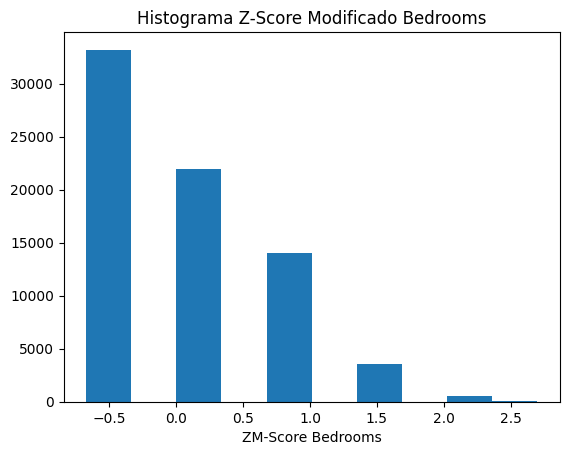

In [162]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

##### Superficie Total

In [163]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id start_date   end_date    latitud   longitud  \
265075  cfQOjnbFBa7yBI/y8/AWlA== 2021-11-19 2022-01-27 -34.597965 -58.421136   
450176  Si5DNdNP5YxcS1Zl/80f0A== 2021-12-16 2022-02-09 -34.579836 -58.447115   
408274  Rcr1PNtQL6qx1TUiPlNvyw== 2021-03-05 2021-06-05 -34.561177 -58.451993   
379947  XwVj/FebvA7Qx0lCm7pMwA== 2021-05-19 2021-09-18 -34.602711 -58.391107   
232940  NATAc2wIFneugCG+lN2P5g== 2021-03-20 2022-02-09 -34.601441 -58.416935   

          place_l3 property_type  property_rooms  property_bedrooms  \
265075     Almagro  Departamento             2.0                1.0   
450176     Palermo  Departamento             1.0                1.0   
408274    Belgrano  Departamento             4.0                2.0   
379947  Tribunales  Departamento             7.0                3.0   
232940     Almagro  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
265075                    39.0                      39.0         68000.0   
450176                    48.0                      37.0         95000.0   
408274                   102.0                      79.0        258000.0   
379947                   158.0                     158.0        260000.0   
232940                    80.0                      74.0        185000.0   

                                          property_title  \
265075            Av. Córdoba al 3800 - 2 amb. - Almagro   
450176          VENTA MONOAMBIENTE CON BALCON A ESTRENAR   
408274                           Departamento - Belgrano   
379947           VENTA PISO ESTILO FRANCES EN TRIBUNALES   
232940  VENTA DEPARTAMENTO 3 AMBIENTES COCHERA AMENITIES   

        zm_property_surface_total  
265075                  -0.702604  
450176                  -0.449667  
408274                   1.067958  
379947                   2.641792  
232940                   0.449667

Verificamos si se cumple la regla de oro para la variable sup total en el zscore modificado

In [164]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5499. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5499. Constituyen al 31% de los datos


id start_date   end_date    latitud   longitud  \
101956  DVl2N00iNvUdBnu7MN4A7g== 2021-05-28 2021-06-18 -34.611834 -58.436272   
90824   1oBCzz03C3GdLekaneVvzg== 2021-08-03 2021-09-02 -34.613390 -58.529311   
7028    fLZiTzTF0NWN2VkZ8cNDmg== 2021-02-09 2021-06-05 -34.616624 -58.475625   
41682   0zrU6+OTFy5h+N5RgdcznA== 2021-01-12 2021-04-07 -34.585970 -58.396197   
187519  jPvCN7dyUIpf+lONT6f8zg== 2021-06-05 2021-06-08 -34.667923 -58.483845   
...                          ...        ...        ...        ...        ...   
18729   jbT6B64120xkmQ5mYHxPTA== 2021-08-28 2021-09-02 -34.625448 -58.524920   
15841   G4kMTB+PWpQCepp1R9HZCg== 2021-04-22 2021-06-05 -34.587030 -58.508617   
141736  BR5dD/ZzAR+Z/jHzNNiwRQ== 2021-03-10 2021-05-18 -34.630207 -58.361121   
155811  YQ3YfqodXf1ul96NFJlfhA== 2021-04-05 2021-04-06 -34.638482 -58.476347   
16809   9gLZmCWpVyaR1+AwZbTdBA== 2021-06-10 2021-09-20 -34.582031 -58.432021   

                place_l3 property_type  property_rooms  property_bedrooms  \
101956         Caballito          Casa             5.0                4.0   
90824         Villa Real          Casa             5.0                4.0   
7028    Villa Santa Rita          Casa             6.0                4.0   
41682           Recoleta  Departamento             4.0                3.0   
187519      Villa Lugano          Casa             7.0                4.0   
...                  ...           ...             ...                ...   
18729          Versalles          Casa             6.0                5.0   
15841   Villa Pueyrredón          Casa             4.0                3.0   
141736              Boca  Departamento             4.0                3.0   
155811          Floresta            PH             4.0                3.0   
16809            Palermo  Departamento             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
101956                   360.0                     197.0        399500.0   
90824                    223.0                     210.0        249000.0   
7028                     300.0                     240.0        360000.0   
41682                    235.0                     225.0        690000.0   
187519                   220.0                     220.0        265000.0   
...                        ...                       ...             ...   
18729                    300.0                     200.0        400000.0   
15841                    287.0                     204.0        390000.0   
141736                   210.0                     109.0        160000.0   
155811                   317.0                     284.0        299900.0   
16809                    246.0                     240.0       1600000.0   

                                           property_title  \
101956    Venta Casa 5 Amb Jardín Patio Terraza Caballito   
90824    VENTA VILLA REAL CASA LOTE PROPIO 2 PLANTAS COCH   
7028              Venta Casa 6 amb Patio Terraza Parrilla   
41682   VENTA Edificio BUSTILLO PB estilo CASA Plaza f...   
187519    Venta Casa de 7 ambientes IDEAL PARA 2 FAMILIAS   
...                                                   ...   
18729      Venta casa de 6 ambientes en Versalles Permuta   
15841                               PH - Villa Pueyrredon   
141736                                Departamento - Boca   
155811                          P.H 2 Y 4 AMB FLORESTA!!!   
16809   Departamento en venta en TORRE MIRABILIA - Pal...   

        zm_property_surface_total  
101956                   8.318833  
90824                    4.468562  
7028                     6.632583  
41682                    4.805813  
187519                   4.384250  
...                           ...  
18729                    6.632583  
15841                    6.267229  
141736                   4.103208  
155811                   7.110354  
16809                    5.114958  

[5499 rows x 14 columns]

In [165]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore Modificado, asi como tambien el Zscore, son aquellas viviendas que tienen mas de 200 m^2 y menos de 500m^2pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

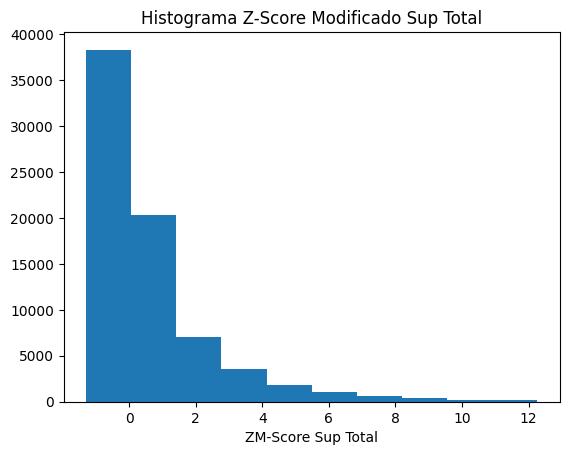

In [166]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

##### Superficie Cubierta

In [167]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

Verificamos si se cumple la regla de oro para la variable sup cubierta en el zscore modificado

In [168]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id start_date   end_date    latitud   longitud  \
101956  DVl2N00iNvUdBnu7MN4A7g== 2021-05-28 2021-06-18 -34.611834 -58.436272   
90824   1oBCzz03C3GdLekaneVvzg== 2021-08-03 2021-09-02 -34.613390 -58.529311   
7028    fLZiTzTF0NWN2VkZ8cNDmg== 2021-02-09 2021-06-05 -34.616624 -58.475625   
41682   0zrU6+OTFy5h+N5RgdcznA== 2021-01-12 2021-04-07 -34.585970 -58.396197   
187519  jPvCN7dyUIpf+lONT6f8zg== 2021-06-05 2021-06-08 -34.667923 -58.483845   
...                          ...        ...        ...        ...        ...   
453038  FmuREKZLqwB2U6Nr7tEkiA== 2021-12-16 2022-01-27 -34.610907 -58.375271   
18729   jbT6B64120xkmQ5mYHxPTA== 2021-08-28 2021-09-02 -34.625448 -58.524920   
15841   G4kMTB+PWpQCepp1R9HZCg== 2021-04-22 2021-06-05 -34.587030 -58.508617   
155811  YQ3YfqodXf1ul96NFJlfhA== 2021-04-05 2021-04-06 -34.638482 -58.476347   
16809   9gLZmCWpVyaR1+AwZbTdBA== 2021-06-10 2021-09-20 -34.582031 -58.432021   

                place_l3 property_type  property_rooms  property_bedrooms  \
101956         Caballito          Casa             5.0                4.0   
90824         Villa Real          Casa             5.0                4.0   
7028    Villa Santa Rita          Casa             6.0                4.0   
41682           Recoleta  Departamento             4.0                3.0   
187519      Villa Lugano          Casa             7.0                4.0   
...                  ...           ...             ...                ...   
453038         Monserrat  Departamento             6.0                5.0   
18729          Versalles          Casa             6.0                5.0   
15841   Villa Pueyrredón          Casa             4.0                3.0   
155811          Floresta            PH             4.0                3.0   
16809            Palermo  Departamento             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
101956                   360.0                     197.0        399500.0   
90824                    223.0                     210.0        249000.0   
7028                     300.0                     240.0        360000.0   
41682                    235.0                     225.0        690000.0   
187519                   220.0                     220.0        265000.0   
...                        ...                       ...             ...   
453038                   244.0                     244.0        260000.0   
18729                    300.0                     200.0        400000.0   
15841                    287.0                     204.0        390000.0   
155811                   317.0                     284.0        299900.0   
16809                    246.0                     240.0       1600000.0   

                                           property_title  \
101956    Venta Casa 5 Amb Jardín Patio Terraza Caballito   
90824    VENTA VILLA REAL CASA LOTE PROPIO 2 PLANTAS COCH   
7028              Venta Casa 6 amb Patio Terraza Parrilla   
41682   VENTA Edificio BUSTILLO PB estilo CASA Plaza f...   
187519    Venta Casa de 7 ambientes IDEAL PARA 2 FAMILIAS   
...                                                   ...   
453038  Venta o alquiler de  piso de oficina Av Julio ...   
18729      Venta casa de 6 ambientes en Versalles Permuta   
15841                               PH - Villa Pueyrredon   
155811                          P.H 2 Y 4 AMB FLORESTA!!!   
16809   Departamento en venta en TORRE MIRABILIA - Pal...   

        zm_property_surface_covered  
101956                     4.721500  
90824                      5.159925  
7028                       6.171675  
41682                      5.665800  
187519                     5.497175  
...                             ...  
453038                     6.306575  
18729                      4.822675  
15841                      4.957575  
155811                     7.655575  
16809                      6.171675  

[5278 rows x 14 columns]

In [169]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

Mismo caso que el explicado para Zscore, Zscore modificado esta tomando como outliers a las superificies cubiertas que estan entre 200 y 500 m^2, nosotros optamos por mantener este valor ya nos parece valido, no eliminaremos nada.

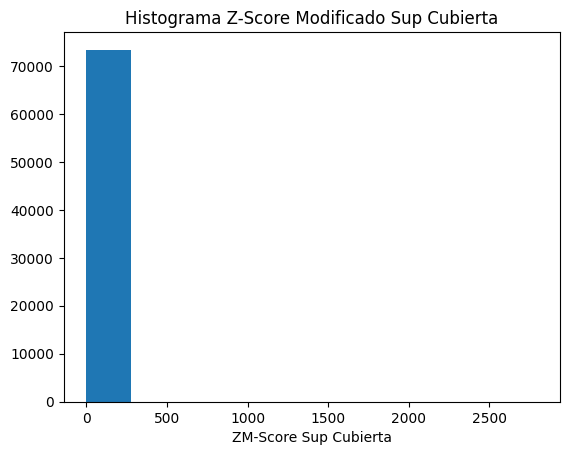

In [170]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

##### Latitud y longitud

In [171]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

Verificamos si se cumple la regla de oro para la variable latitud en el zscore modificado

In [172]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id start_date   end_date    latitud   longitud  \
190872  i4/0KG7vU2s7mHcWwZjgHA== 2021-11-01 2022-01-27 -31.343807 -64.336648   
102594  3Ev2cyd+v7SL0HgAq4h6eA== 2021-05-28 2021-06-05 -33.030773 -60.627277   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 -32.065926 -64.527838   
333522  fITlGgHl9wOxBHUIYOTQ6Q== 2021-12-28 2022-01-27 -31.431335 -64.509355   
45532   XdZsZLmbXUPzQFsMs6J4dA== 2021-05-02 2021-06-05 -31.369084 -64.584422   
...                          ...        ...        ...        ...        ...   
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
318763  21X2XW7KwPHKb73K0LDWUg== 2021-03-17 2021-06-05 -27.469213 -58.830635   
54727   eXTGEc1mJr1WGJSJBLo+LA== 2021-01-11 2021-02-09 -31.664340 -63.885916   
308524  5gULcuCymCY+LG4gkqts3w== 2021-04-28 2021-07-17 -33.081030 -68.468140   
249721  qSkfd71p7RwwsJ8xFMQ0gQ== 2021-04-29 2021-05-19 -33.081030 -68.468140   

       place_l3 property_type  property_rooms  property_bedrooms  \
190872      NaN          Casa             4.0                3.0   
102594      NaN  Departamento             5.0                3.0   
45536       NaN          Casa             3.0                2.0   
333522      NaN  Departamento             3.0                2.0   
45532       NaN          Casa             3.0                2.0   
...         ...           ...             ...                ...   
226093      NaN  Departamento             2.0                1.0   
318763      NaN  Departamento             2.0                1.0   
54727       NaN          Casa             5.0                4.0   
308524      NaN  Departamento             3.0                2.0   
249721      NaN  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
190872                   212.0                     140.0         65000.0   
102594                   430.0                     430.0         73000.0   
45536                    307.0                     106.0        139000.0   
333522                    90.0                      80.0         70000.0   
45532                    300.0                      70.0         58000.0   
...                        ...                       ...             ...   
226093                    51.0                      51.0         85000.0   
318763                    55.0                      55.0        125000.0   
54727                    145.0                     145.0        190000.0   
308524                    49.0                      44.0         57000.0   
249721                    80.0                      66.0        145000.0   

                                           property_title  zm_latitud  
190872                                  Casa en La Calera  114.722139  
102594                                 OPORTUNIDAD VENTA    55.201249  
45536   Se Vende Casa Amoblada en Santa Rosa de Calamu...   89.243761  
333522           departamento en venta frente al fantasio  111.633889  
45532   Casa en venta Tanti a 8 cuadras de la ruta 2 d...  113.830296  
...                                                   ...         ...  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...   53.428049  
318763  2 Ambientes de 70 mts2 reciclado a Nuevo. Con ...  251.428624  
54727        VENTA CASA CON PILETA Y COCHERA - B° PRIVADO  103.412829  
308524  Oportunidad, dpto.  3 amb en condominio c/cochera   53.428049  
249721  Venta departamento 3 amb c/cochera S.Martín Ce...   53.428049  

[80 rows x 14 columns]

In [173]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 15. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 15. Constituyen al 0% de los datos


id start_date                      end_date  \
65844   0tGMaOsXgkOAnx8GSH1pmA== 2021-05-15 2021-05-25 00:00:00.000000000   
308365  j4l0DxeSfN6KnNMYSo6bSg== 2021-04-28 2021-05-01 00:00:00.000000000   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
250707  n/VGq/lp+AH1XRd4RSHphg== 2021-04-29 2021-05-15 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
317537  x1BlLb49Up0aSX9yuzhrMw== 2021-09-29 2022-03-25 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 13:52:48.088804171   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
411779  jt4VEm3y2Ktb573eFDHQUw== 2021-03-02 2021-03-12 00:00:00.000000000   
351916  BKk+pz+G7Tajvr6LE+9UZw== 2021-06-25 2021-07-17 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   

          latitud   longitud         place_l3 property_type  property_rooms  \
65844  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
308365 -34.694900 -58.469161     Villa Lugano          Casa             2.0   
131188 -41.083002 -71.182747              NaN  Departamento             2.0   
250707 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
106297 -41.086352 -71.185720              NaN  Departamento             2.0   
155333 -41.164123 -71.415420              NaN          Casa             3.0   
106288 -40.131723 -71.299436              NaN  Departamento             2.0   
105792 -41.084900 -71.187159              NaN  Departamento             1.0   
317537 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
324200 -38.940227 -68.073865              NaN  Departamento             3.0   
208085 -41.085373 -71.185766              NaN  Departamento             2.0   
457631 -53.788624 -67.718089              NaN  Departamento             3.0   
411779 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
351916 -34.694900 -58.469161     Villa Lugano          Casa             2.0   
410404 -38.964493 -68.075830              NaN          Casa             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
65844                 3.0                    91.0                      79.0   
308365                1.0                    80.0                      80.0   
131188                1.0                    66.0                      56.0   
250707                3.0                    91.0                      79.0   
106297                1.0                    53.0                      53.0   
155333                2.0                    70.0                      70.0   
106288                1.0                    44.0                      44.0   
105792                1.0                    53.0                      53.0   
317537                3.0                    91.0                      79.0   
324200                2.0                    55.0                      55.0   
208085                1.0                    60.0                      50.0   
457631                2.0                   121.0                     100.0   
411779                3.0                    91.0                      79.0   
351916                1.0                    72.0                      72.0   
410404                5.0                   218.0                     218.0   

        property_price                                     property_title  \
65844          59900.0         Venta 3/4 ambientes Vista Abierta Luminoso   
308365        159000.0   Casa LUGANO 2 Ambientes amplios-  PATIO Y JARDIN   
131188        135000.0  VENDO MUY LI

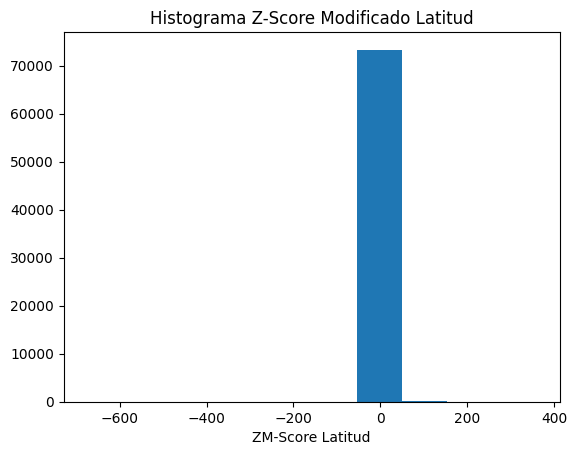

In [174]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [175]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

Verificamos si se cumple la regla de oro para la variable longitud en el zscore modificado

In [176]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id start_date   end_date   latitud   longitud  \
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   

       place_l3 property_type  property_rooms  property_bedrooms  \
220851      NaN          Casa             4.0                2.0   
187631      NaN  Departamento             5.0                4.0   
405382      NaN          Casa             3.0                2.0   
234893      NaN  Departamento             4.0                3.0   
241662      NaN          Casa             4.0                3.0   
173667      NaN  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
220851                   105.0                     105.0        190000.0   
187631                   158.0                     150.0        380000.0   
405382                   205.0                     102.0        125000.0   
234893                    98.0                      88.0        269000.0   
241662                   230.0                     200.0        255000.0   
173667                    98.0                      88.0        269000.0   

                                           property_title  zm_longitud  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.358668  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    21.273761  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   103.827196  
234893  Venta departamento 4 amb Vicente Lopez con cochea    70.957867  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   103.827196  
173667  Venta departamento 4 amb Vicente Lopez con cochea    70.957867

In [177]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 83. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 83. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
190872  i4/0KG7vU2s7mHcWwZjgHA== 2021-11-01 2022-01-27 -31.343807 -64.336648   
102594  3Ev2cyd+v7SL0HgAq4h6eA== 2021-05-28 2021-06-05 -33.030773 -60.627277   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 -32.065926 -64.527838   
333522  fITlGgHl9wOxBHUIYOTQ6Q== 2021-12-28 2022-01-27 -31.431335 -64.509355   
45532   XdZsZLmbXUPzQFsMs6J4dA== 2021-05-02 2021-06-05 -31.369084 -64.584422   
...                          ...        ...        ...        ...        ...   
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
318763  21X2XW7KwPHKb73K0LDWUg== 2021-03-17 2021-06-05 -27.469213 -58.830635   
54727   eXTGEc1mJr1WGJSJBLo+LA== 2021-01-11 2021-02-09 -31.664340 -63.885916   
308524  5gULcuCymCY+LG4gkqts3w== 2021-04-28 2021-07-17 -33.081030 -68.468140   
249721  qSkfd71p7RwwsJ8xFMQ0gQ== 2021-04-29 2021-05-19 -33.081030 -68.468140   

       place_l3 property_type  property_rooms  property_bedrooms  \
190872      NaN          Casa             4.0                3.0   
102594      NaN  Departamento             5.0                3.0   
45536       NaN          Casa             3.0                2.0   
333522      NaN  Departamento             3.0                2.0   
45532       NaN          Casa             3.0                2.0   
...         ...           ...             ...                ...   
226093      NaN  Departamento             2.0                1.0   
318763      NaN  Departamento             2.0                1.0   
54727       NaN          Casa             5.0                4.0   
308524      NaN  Departamento             3.0                2.0   
249721      NaN  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
190872                   212.0                     140.0         65000.0   
102594                   430.0                     430.0         73000.0   
45536                    307.0                     106.0        139000.0   
333522                    90.0                      80.0         70000.0   
45532                    300.0                      70.0         58000.0   
...                        ...                       ...             ...   
226093                    51.0                      51.0         85000.0   
318763                    55.0                      55.0        125000.0   
54727                    145.0                     145.0        190000.0   
308524                    49.0                      44.0         57000.0   
249721                    80.0                      66.0        145000.0   

                                           property_title  zm_longitud  
190872                                  Casa en La Calera  -142.225314  
102594                                 OPORTUNIDAD VENTA    -52.774027  
45536   Se Vende Casa Amoblada en Santa Rosa de Calamu...  -146.835864  
333522           departamento en venta frente al fantasio  -146.390145  
45532   Casa en venta Tanti a 8 cuadras de la ruta 2 d...  -148.200377  
...                                                   ...          ...  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...  -241.856043  
318763  2 Ambientes de 70 mts2 reciclado a Nuevo. Con ...    -9.448081  
54727        VENTA CASA CON PILETA Y COCHERA - B° PRIVADO  -131.355937  
308524  Oportunidad, dpto.  3 amb en condominio c/cochera  -241.856043  
249721  Venta departamento 3 amb c/cochera S.Martín Ce...  -241.856043  

[83 rows x 14 columns]

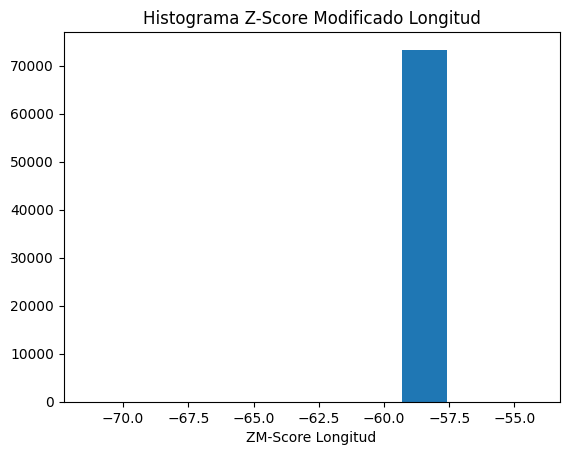

In [178]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

### Multivariados

#### Clustering - Mahalanobis

In [179]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X


In [180]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [181]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

##### Analisis entre ambientes y habitaciones de valores atipicos

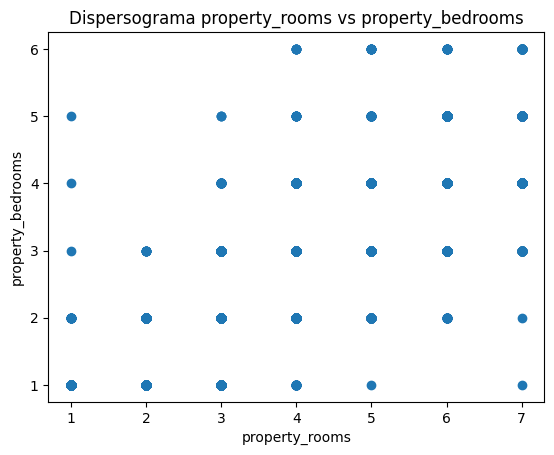

In [182]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

Parecerían exisitir algunas observaciones anómalas. Vamos a calcular la distancia de mahalanobis para cada observación.

In [183]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
265075             2.0                1.0     1.170243
450176             1.0                1.0     2.940761
408274             4.0                2.0     5.000717
379947             7.0                3.0    36.540559
232940             3.0                2.0     0.049811

Tenemos que seleccionar un valor umbral para definir qué observaciones podrían ser anómalas según la distancia de mahalanobis.

<AxesSubplot: ylabel='mahalanobis'>

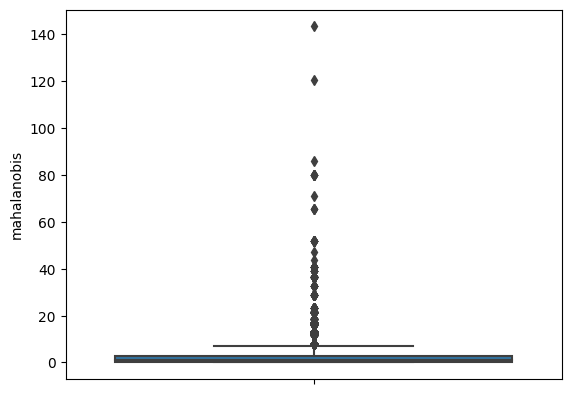

In [184]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

Seleccionamos 35 como valor umbral

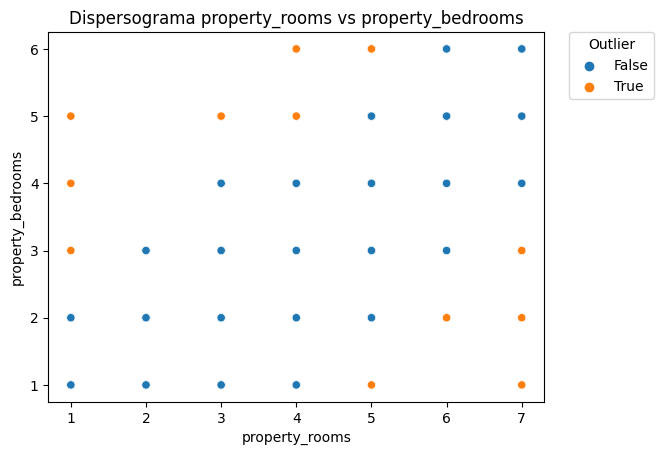

Los outliers para mahalanobis con un umbral de 35 son: 145. Constituyen el 0% de los datos


In [185]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot: ylabel='mahalanobis'>

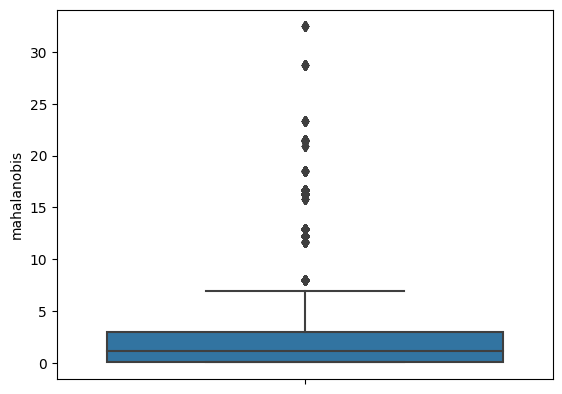

In [186]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [187]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
379947             7.0                3.0    36.540559
147404             7.0                3.0    36.540559
413697             7.0                3.0    36.540559
150143             3.0                5.0    65.265626
193391             7.0                3.0    36.540559
...                ...                ...          ...
14163              4.0                5.0    39.037804
448031             6.0                2.0    40.574029
452318             7.0                3.0    36.540559
208347             7.0                3.0    36.540559
170276             7.0                3.0    36.540559

[145 rows x 3 columns]

Como podemos observar en el scatter plot, quedan bien marcados los outliers que en nuestro dominio de problema no tienen ningun sentido.
Por ejemplo, tener 7 ambientes y 1 habitacion...
Procederemos a eliminar estos outliers.

###### Eliminamos dichas observaciones

In [188]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 145 registros en train
Se han eliminado: 39 registros en test


Dispersograma sin los outliers mencionados


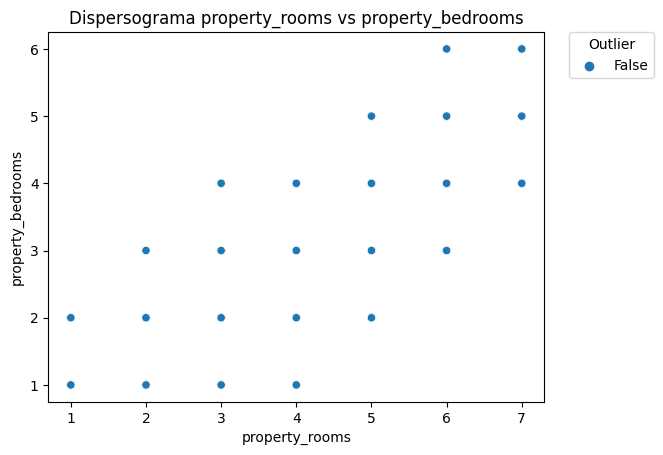

In [189]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

##### Analisis entre superficie total y superificie cubierta de valores atipicos

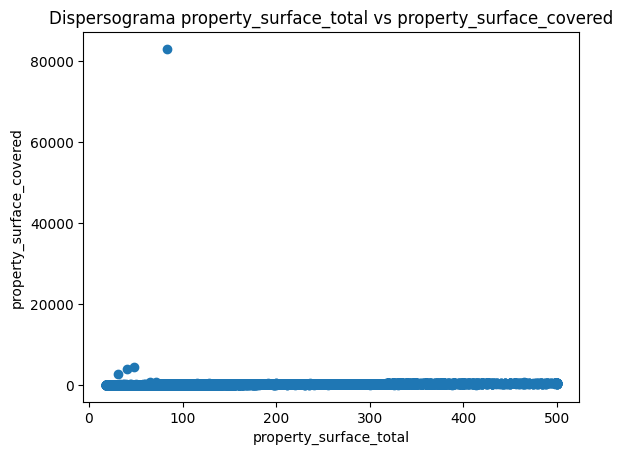

In [190]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [191]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
265075                    39.0                      39.0     0.533202
450176                    48.0                      37.0     0.487977
408274                   102.0                      79.0     0.345299
232940                    80.0                      74.0     0.052396
225031                   100.0                      75.0     0.488226

<AxesSubplot: ylabel='mahalanobis'>

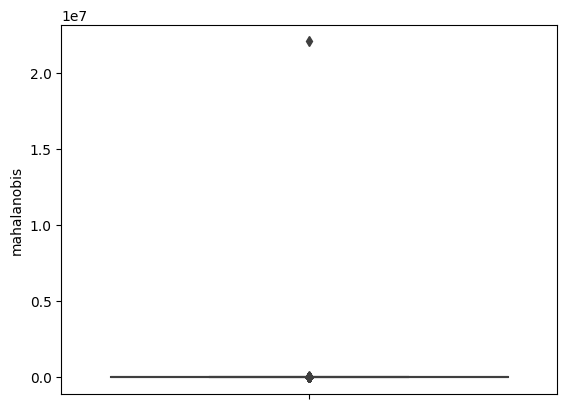

In [192]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [193]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [194]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered   mahalanobis
354376                    41.0                    3837.0  4.637888e+04
97083                    500.0                     130.0  3.025714e+02
138208                   500.0                     100.0  3.604034e+02
310407                   388.0                      38.0  2.832484e+02
104359                   200.0                     450.0  2.575146e+02
104592                   200.0                     450.0  2.575146e+02
393711                   414.0                      56.0  2.933782e+02
450430                   442.0                     140.0  1.969074e+02
395321                   465.0                     650.0  2.586282e+02
412681                   393.0                      80.0  2.191837e+02
387598                   475.0                     140.0  2.448042e+02
32735                    485.0                     108.0  3.176574e+02
441196                    72.0                     602.0  9.314962e+02
73552                     65.0                     623.0  1.026399e+03
275735                   432.0                     144.0  1.778463e+02
199905                    83.0                   83000.0  2.210135e+07
438160                    31.0                    2700.0  2.291190e+04
45540                    420.0                     120.0  1.960744e+02
52066                    380.0                      80.0  2.007063e+02
97055                    500.0                     130.0  3.025714e+02
445383                   500.0                     130.0  3.025714e+02
121279                   500.0                     130.0  3.025714e+02
30359                     48.0                    4435.0  6.196738e+04

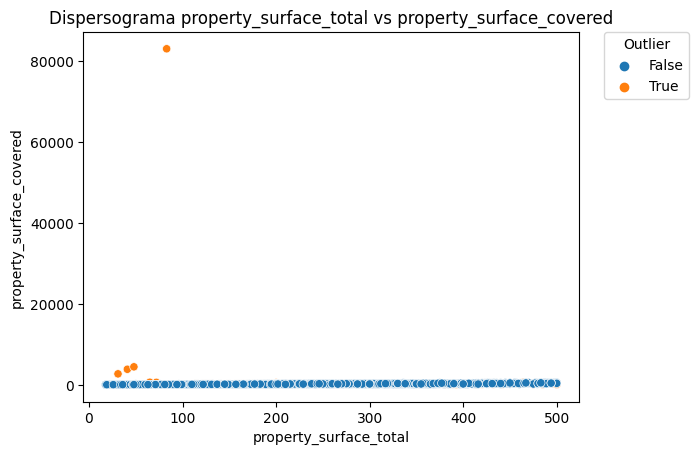

In [195]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

###### Como podemos observar, con mahalanobis pudimos detectar dos escenarios de outliers. Son outliers aquellas viviendas que tengan una superificie cubierta > superificie total Y son outliers tambien aquellas viviendas que tengan una brecha importante entre la superificie total y la cubierta. Por ejemplo: $380 m^2$ de total VS $80 m^2$ de cubierta. Procederemos a eliminarlos.

In [196]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 23 registros en train
Se han eliminado: 3 registros en test


Dispersograma sin los outliers mencionados


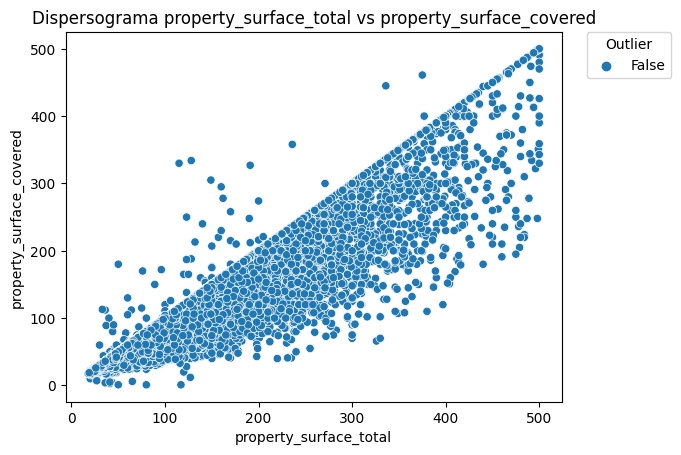

In [197]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

##### Analisis entre latitud y logitud de valores atipicos

In [198]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')


In [199]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 82.34536569401565


latitud   longitud  mahalanobis
190872 -31.343807 -64.336648   467.953299
102594 -33.030773 -60.627277    82.345366
45536  -32.065926 -64.527838   410.577143
333522 -31.431335 -64.509355   474.070983
45532  -31.369084 -64.584422   488.600350
...           ...        ...          ...
226093 -33.081030 -68.468140   858.680649
318763 -27.469213 -58.830635   994.257219
54727  -31.664340 -63.885916   391.226406
308524 -33.081030 -68.468140   858.680649
249721 -33.081030 -68.468140   858.680649

[86 rows x 3 columns]

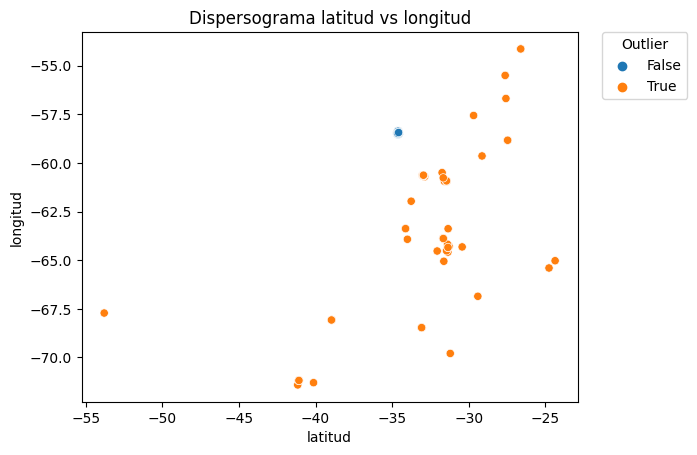

El grafico muestra 86 outliers
El mínimo según el umbral es de: 82.34536569401565


In [200]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


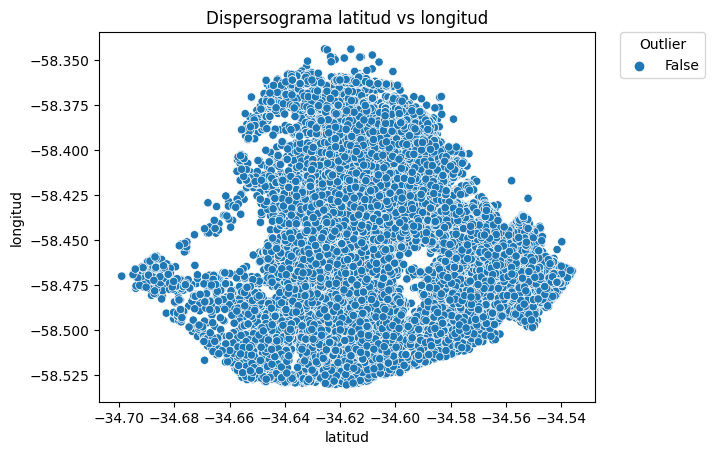

In [201]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'latitud', 'longitud',
                   umbral)

A simple vista se nota como el dispersograma cambió mucho y ahora se parece un poco a CABA. Notar además que tomamos como umbral 1 y sin embargo el valor mínimo de la distancia de estos outliers era de 106.

Como estos 1684 outliers tienen valores demasiado alejados del dataset, procederemos a borrarlos

In [202]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 86 registros en train
Se han eliminado: 11788 registros en test


Ahora que eliminamos los outliers de latitud y longitud, eliminaremos los datos nulos de place_l3.

In [203]:
ds_train.place_l3.isna().sum()

42

In [204]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

#### Analisis entre superficie total y precio

In [205]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    73075.000000
mean         1.991893
std         13.863736
min          0.000067
25%          0.185889
50%          0.394644
75%          0.675661
max       1989.488149
Name: mahalanobis, dtype: float64

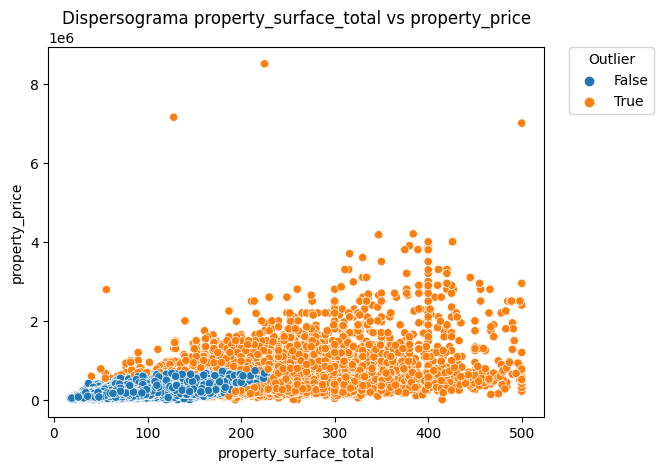

El grafico muestra 4841 outliers
El mínimo según el umbral es de: 5.000808766816108
Los outliers representan un 6.624700650017106%


In [206]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot: ylabel='mahalanobis'>

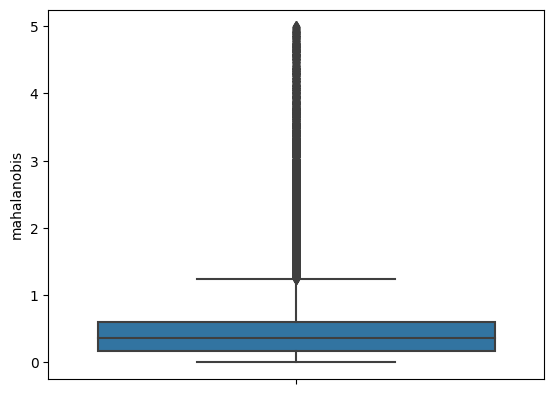

In [207]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

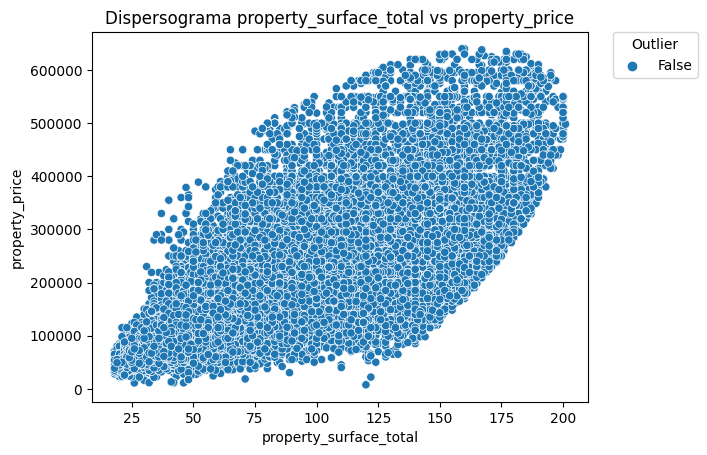

In [208]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

No llegamos a una buena conclusión para decidir el umbral por lo que tomaremos otro camino. Investigaremos acerca del precio por $m^2$ y realizaremos un análisis con el método de IQR sobre eso.

In [209]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 73075
outliers encontrados para los price_m2: 3348
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4281.046993265391, limite inf: 325.2391382084745


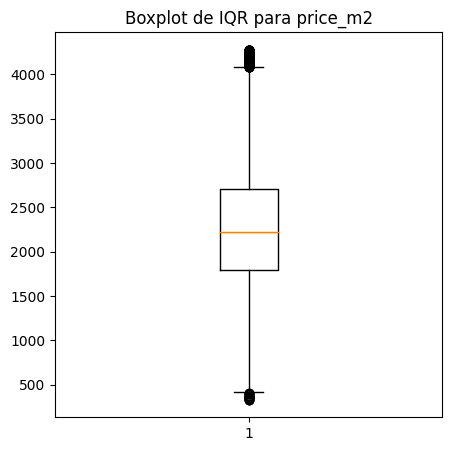

cantidad de datos del ds: 5902
outliers encontrados para los price_m2: 244
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4062.193742412537, limite inf: 680.6574881359672


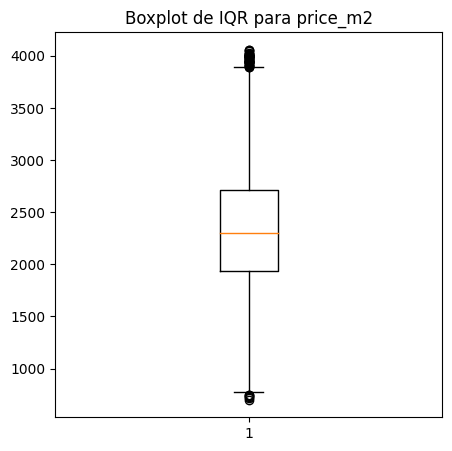

In [210]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3324 registros en train por encima del límite superior en train (4.548751282928498)
Hay 24 registros en train por debajo del límite inferior en train  (0.03284296955183031)
Hay 192 registros en train por encima del límite superior en train (0.2627437564146425)%
Hay 1 registros en train por debajo del límite inferior en train  (0.0013684570646595963%)


Text(0.5, 1.0, 'Distribución sin outliers')

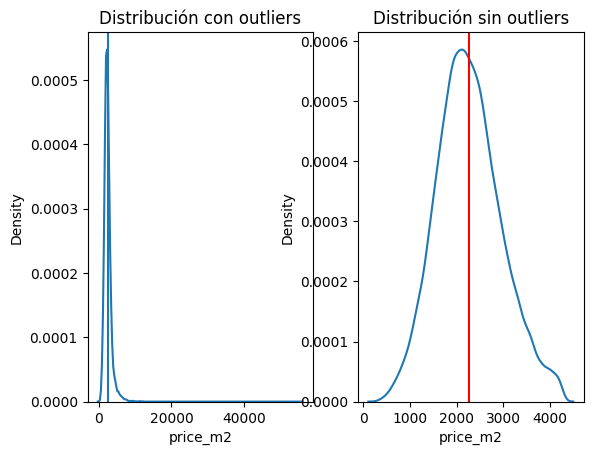

In [211]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

Como podemos ver, quitar estos outliers nos acerca el grafico a algo parecido a una distribución normal. Procederemos a borrar tanto los outliers superiores como inferiores.

In [212]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3324 registros en train
Se han eliminado: 192 registros en test


In [213]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 24 registros en train
Se han eliminado: 1 registros en test


#### LOF

In [214]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [215]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [216]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

##### Analisis de outliers para ambientes y habitaciones

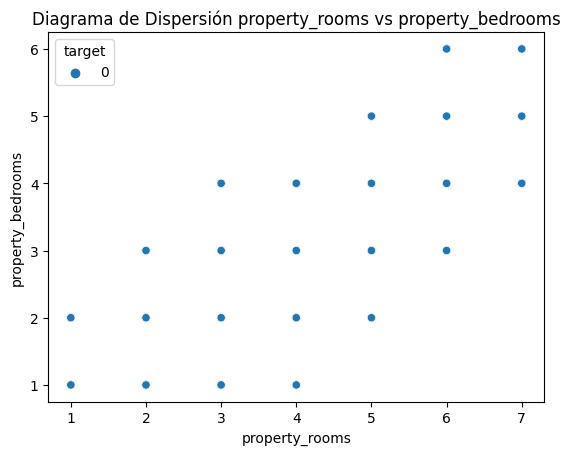

In [217]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [218]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id start_date   end_date    latitud   longitud  \
265075  cfQOjnbFBa7yBI/y8/AWlA== 2021-11-19 2022-01-27 -34.597965 -58.421136   
450176  Si5DNdNP5YxcS1Zl/80f0A== 2021-12-16 2022-02-09 -34.579836 -58.447115   
408274  Rcr1PNtQL6qx1TUiPlNvyw== 2021-03-05 2021-06-05 -34.561177 -58.451993   
232940  NATAc2wIFneugCG+lN2P5g== 2021-03-20 2022-02-09 -34.601441 -58.416935   
225031  bdA8Zft390ZFxKAp4SaHyQ== 2021-09-14 2022-03-09 -34.628037 -58.517201   
...                          ...        ...        ...        ...        ...   
254629  U+/cYZaEVS94lJ4RCW1ZwA== 2021-08-20 2021-08-27 -34.617034 -58.367304   
270651  4otf6i6pxuM0BS+ps/vAgA== 2021-07-13 2022-05-01 -34.582972 -58.496133   
180432  LcIgmlpGab8J8uM3Gqu56g== 2021-02-16 2021-06-05 -34.586182 -58.424139   
29145   12ZEfkuAOtJJ/YTxF88WvQ== 2021-10-15 2022-01-27 -34.644610 -58.473373   
155811  YQ3YfqodXf1ul96NFJlfhA== 2021-04-05 2021-04-06 -34.638482 -58.476347   

                 place_l3 property_type  property_rooms  property_bedrooms  \
265075            Almagro  Departamento             2.0                1.0   
450176            Palermo  Departamento             1.0                1.0   
408274           Belgrano  Departamento             4.0                2.0   
232940            Almagro  Departamento             3.0                2.0   
225031       Monte Castro  Departamento             3.0                2.0   
...                   ...           ...             ...                ...   
254629          San Telmo  Departamento             1.0                1.0   
270651   Villa Pueyrredón            PH             3.0                2.0   
180432            Palermo  Departamento             2.0                1.0   
29145   Parque Avellaneda            PH             3.0                2.0   
155811           Floresta            PH             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
265075                    39.0                      39.0         68000.0   
450176                    48.0                      37.0         95000.0   
408274                   102.0                      79.0        258000.0   
232940                    80.0                      74.0        185000.0   
225031                   100.0                      75.0        165000.0   
...                        ...                       ...             ...   
254629                    47.0                      47.0        195000.0   
270651                   157.0                     120.0        205000.0   
180432                    63.0                      44.0        165000.0   
29145                     48.0                      42.0         74900.0   
155811                   317.0                     284.0        299900.0   

                                           property_title  target  scores  
265075             Av. Córdoba al 3800 - 2 amb. - Almagro       0    -1.0  
450176           VENTA MONOAMBIENTE CON BALCON A ESTRENAR       0    -1.0  
408274                            Departamento - Belgrano       0    -1.0  
232940   VENTA DEPARTAMENTO 3 AMBIENTES COCHERA AMENITIES       0    -1.0  
225031  Excelente tríplex de 3 amb. con terraza y coch...       0    -1.0  
...                                                   ...     ...     ...  
254629  Quartier Madero. Monoambiente 47 mt2 con cochera        0    -1.0  
270651                              PH - Villa Pueyrredon       0    -1.0  
180432  Departamento de 2 ambientes en venta en Palerm...       0    -1.0  
29145   PH 3 ambientes , excelente ubicación , Parque ...       0    -1.0  
155811                          P.H 2 Y 4 AMB FLORESTA!!!       0    -1.0  

[69727 rows x 15 columns]

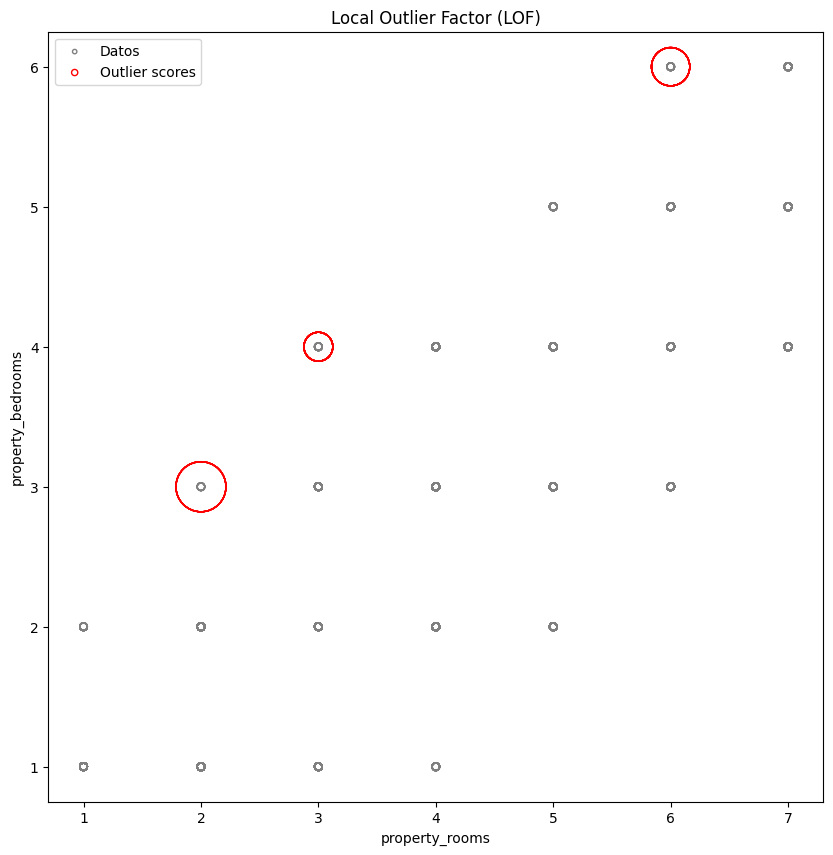

In [219]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

Como podemos observar, LOF parece estar marcandonos 3 outliers. Pareceria estar cumpliendo que un ambiente no puede ser mayor o igual al numero de habitaciones. No vimos un patro grande en el dataset que se rija bajo este criterio asi que en prinicpio no vamos a tomar accion al respecto. Lo grueso fue eliminado con mahalanobis.

##### Analisis de outliers para superficie total y superficie cubierta

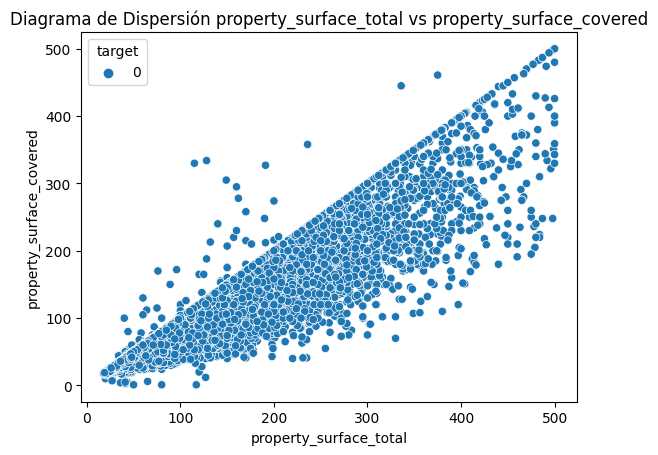

In [220]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [221]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id start_date   end_date    latitud   longitud  \
265075  cfQOjnbFBa7yBI/y8/AWlA== 2021-11-19 2022-01-27 -34.597965 -58.421136   
450176  Si5DNdNP5YxcS1Zl/80f0A== 2021-12-16 2022-02-09 -34.579836 -58.447115   
408274  Rcr1PNtQL6qx1TUiPlNvyw== 2021-03-05 2021-06-05 -34.561177 -58.451993   
232940  NATAc2wIFneugCG+lN2P5g== 2021-03-20 2022-02-09 -34.601441 -58.416935   
225031  bdA8Zft390ZFxKAp4SaHyQ== 2021-09-14 2022-03-09 -34.628037 -58.517201   
...                          ...        ...        ...        ...        ...   
254629  U+/cYZaEVS94lJ4RCW1ZwA== 2021-08-20 2021-08-27 -34.617034 -58.367304   
270651  4otf6i6pxuM0BS+ps/vAgA== 2021-07-13 2022-05-01 -34.582972 -58.496133   
180432  LcIgmlpGab8J8uM3Gqu56g== 2021-02-16 2021-06-05 -34.586182 -58.424139   
29145   12ZEfkuAOtJJ/YTxF88WvQ== 2021-10-15 2022-01-27 -34.644610 -58.473373   
155811  YQ3YfqodXf1ul96NFJlfhA== 2021-04-05 2021-04-06 -34.638482 -58.476347   

                 place_l3 property_type  property_rooms  property_bedrooms  \
265075            Almagro  Departamento             2.0                1.0   
450176            Palermo  Departamento             1.0                1.0   
408274           Belgrano  Departamento             4.0                2.0   
232940            Almagro  Departamento             3.0                2.0   
225031       Monte Castro  Departamento             3.0                2.0   
...                   ...           ...             ...                ...   
254629          San Telmo  Departamento             1.0                1.0   
270651   Villa Pueyrredón            PH             3.0                2.0   
180432            Palermo  Departamento             2.0                1.0   
29145   Parque Avellaneda            PH             3.0                2.0   
155811           Floresta            PH             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
265075                    39.0                      39.0         68000.0   
450176                    48.0                      37.0         95000.0   
408274                   102.0                      79.0        258000.0   
232940                    80.0                      74.0        185000.0   
225031                   100.0                      75.0        165000.0   
...                        ...                       ...             ...   
254629                    47.0                      47.0        195000.0   
270651                   157.0                     120.0        205000.0   
180432                    63.0                      44.0        165000.0   
29145                     48.0                      42.0         74900.0   
155811                   317.0                     284.0        299900.0   

                                           property_title  target    scores  
265075             Av. Córdoba al 3800 - 2 amb. - Almagro       0 -1.000000  
450176           VENTA MONOAMBIENTE CON BALCON A ESTRENAR       0 -1.000000  
408274                            Departamento - Belgrano       0 -1.147165  
232940   VENTA DEPARTAMENTO 3 AMBIENTES COCHERA AMENITIES       0 -1.000000  
225031  Excelente tríplex de 3 amb. con terraza y coch...       0 -1.000000  
...                                                   ...     ...       ...  
254629  Quartier Madero. Monoambiente 47 mt2 con cochera        0 -1.000000  
270651                              PH - Villa Pueyrredon       0 -1.031622  
180432  Departamento de 2 ambientes en venta en Palerm...       0 -1.000000  
29145   PH 3 ambientes , excelente ubicación , Parque ...       0 -1.000000  
155811                          P.H 2 Y 4 AMB FLORESTA!!!       0 -1.051455  

[69727 rows x 15 columns]

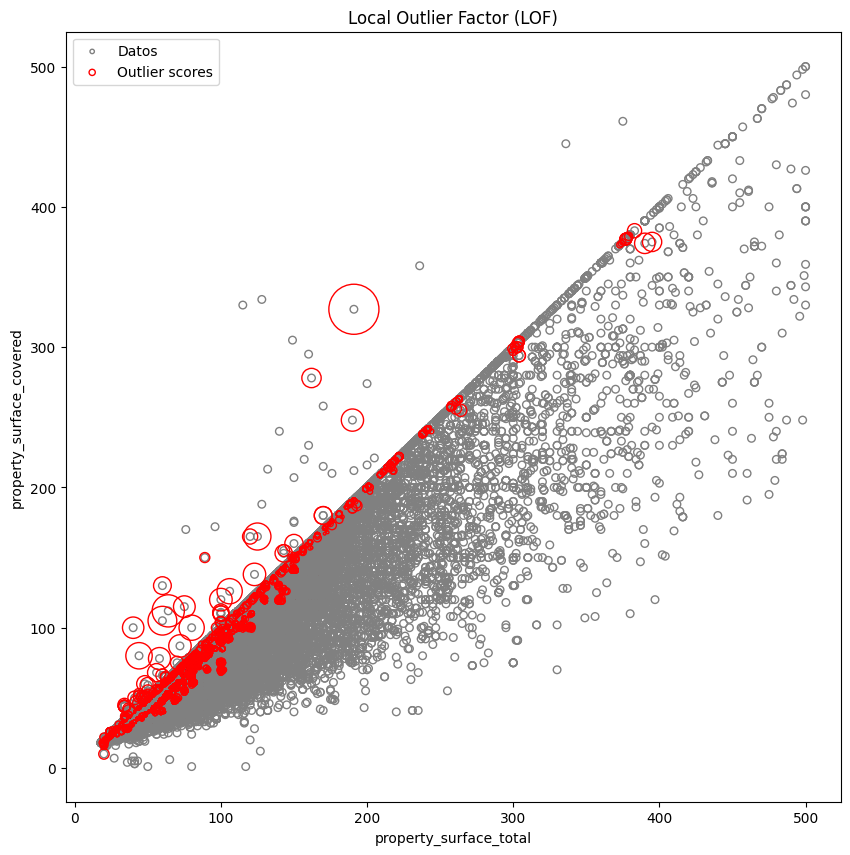

In [222]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

Como vemos en el grafico de LOF pareceria que la superifice total no puede ser exactamente igual a la superificie cubierta, por eso la deteccion de outiers a lo largo de la recta con pendiente creciente. Como no tenemos especificaciones tecnicas de cuantos metros menos deberia tener una superificie cubierta con respecto a la total, no vamos a tocar los datos.

#### Isolation Forest

##### Analisis de outliers para ambientes y habitaciones

In [223]:
rooms_bedrooms_iforest = ds_train[['property_rooms', 'property_bedrooms']]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_rooms'].isna())]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_bedrooms'].isna())]

iforest = IsolationForest(n_estimators=100, max_samples='auto',
                          contamination=0.05, max_features=2,
                          bootstrap=False, n_jobs=-1, random_state=1)

pred = iforest.fit_predict(rooms_bedrooms_iforest)
#Almaceno scores y etiquetas
rooms_bedrooms_iforest['scores'] = iforest.decision_function(rooms_bedrooms_iforest)
rooms_bedrooms_iforest['outlier_label'] = pred

#Observaciones anómalas
rooms_bedrooms_iforest[rooms_bedrooms_iforest.outlier_label == -1]

property_rooms  property_bedrooms    scores  outlier_label
408274             4.0                2.0 -0.045939             -1
236556             4.0                2.0 -0.045939             -1
7028               6.0                4.0 -0.077576             -1
187519             7.0                4.0 -0.142287             -1
147624             4.0                2.0 -0.045939             -1
...                ...                ...       ...            ...
61432              7.0                4.0 -0.142287             -1
108679             4.0                4.0 -0.029057             -1
453038             6.0                5.0 -0.147523             -1
18729              6.0                5.0 -0.147523             -1
45264              3.0                1.0 -0.059458             -1

[3483 rows x 4 columns]

In [224]:
rooms_bedrooms_iforest.outlier_label.value_counts()

 1    66244
-1     3483
Name: outlier_label, dtype: int64

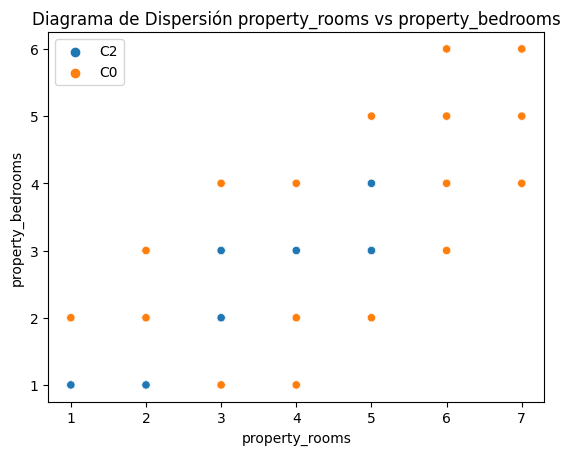

In [225]:
#Grafico dispersograma
color = [f"C{n + 1}" for n in (rooms_bedrooms_iforest['outlier_label'].values)]

sns.scatterplot(x=rooms_bedrooms_iforest['property_rooms'], y=rooms_bedrooms_iforest['property_bedrooms'], hue=color)
plt.title('Diagrama de Dispersión property_rooms vs property_bedrooms')
plt.show()

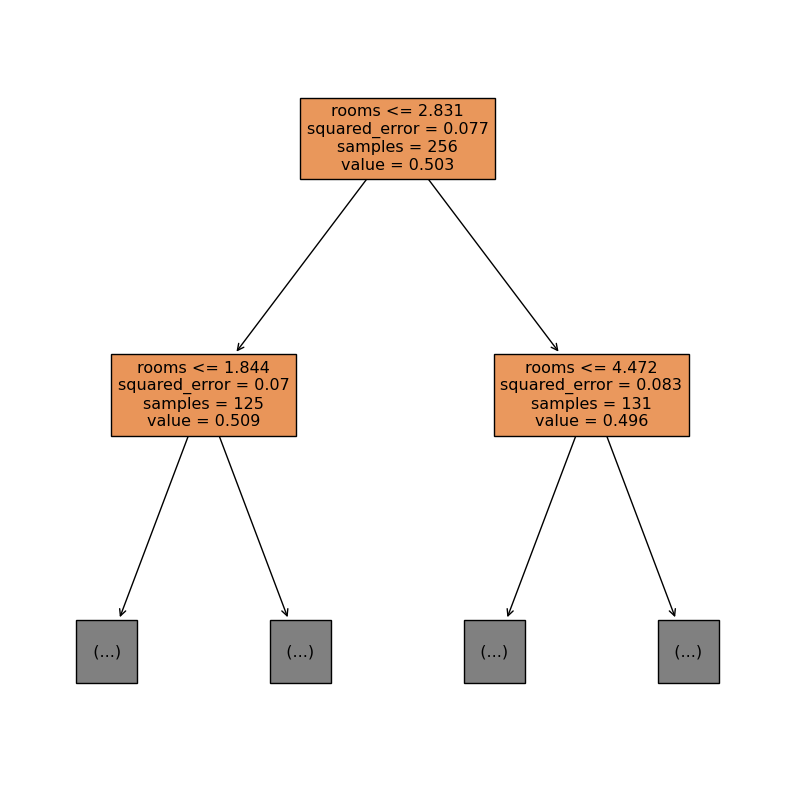

In [226]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['rooms', 'bedrooms'], filled=True, max_depth=1)
plt.show()

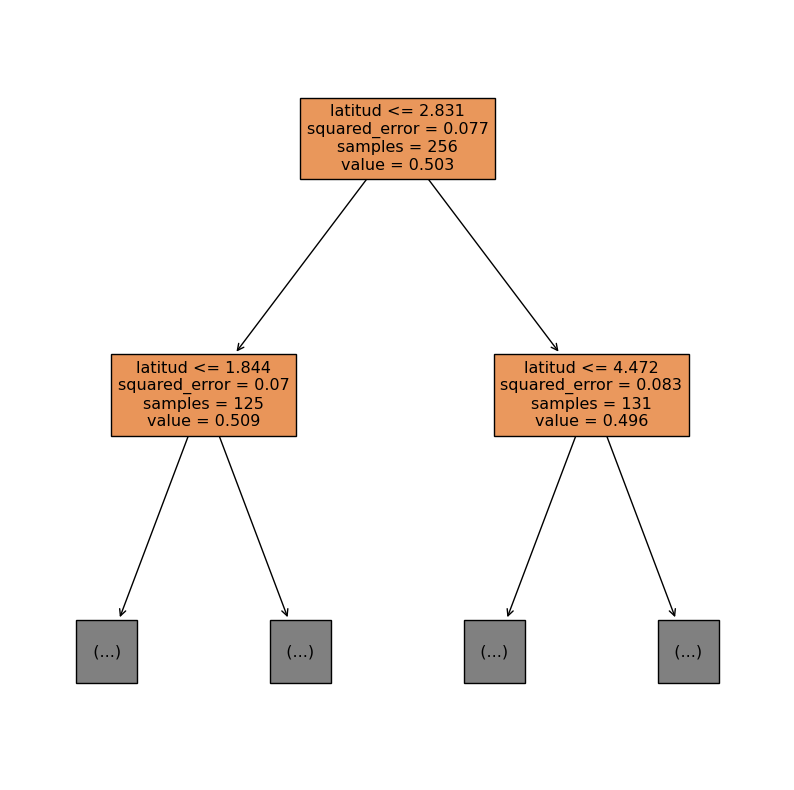

In [227]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['latitud', 'longitud'], filled=True, max_depth=1)
plt.show()

Habiendo hecho el análisis de valores atípicos y las imputaciones necesarias, finalmente eliminamos la columna id que usamos para hacer algunos merges.

In [228]:
# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

## Reduccion de la Dimensionalidad

### Analisis PCA

Para poder realizar el análisis PCA del dataset es necesario que todos los campos sean numéricos.
Vamos a deshacernos de las siguientes columnas:
- ID: no aporta información
- Fechas y título: no pueden adaptarse a un formato numérico
- place_l3: es información redundante cuando tenemos latitud y longitud.
- property_price: es la variable que queremos predecir


In [229]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
265075 -34.597965 -58.421136             2.0                1.0   
450176 -34.579836 -58.447115             1.0                1.0   
408274 -34.561177 -58.451993             4.0                2.0   
232940 -34.601441 -58.416935             3.0                2.0   
225031 -34.628037 -58.517201             3.0                2.0   
...           ...        ...             ...                ...   
254629 -34.617034 -58.367304             1.0                1.0   
270651 -34.582972 -58.496133             3.0                2.0   
180432 -34.586182 -58.424139             2.0                1.0   
29145  -34.644610 -58.473373             3.0                2.0   
155811 -34.638482 -58.476347             4.0                3.0   

        property_surface_total  property_surface_covered  
265075                    39.0                      39.0  
450176                    48.0                      37.0  
408274                   102.0                      79.0  
232940                    80.0                      74.0  
225031                   100.0                      75.0  
...                        ...                       ...  
254629                    47.0                      47.0  
270651                   157.0                     120.0  
180432                    63.0                      44.0  
29145                     48.0                      42.0  
155811                   317.0                     284.0  

[69727 rows x 6 columns]

In [230]:
ds_reducido.shape

(69727, 6)

Procedemos ahora a normalizar las columnas del dataframe

In [231]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -0.060698  0.507251       -0.589683          -0.892086   
1      0.625393 -0.189352       -1.402670          -0.892086   
2      1.331550 -0.320136        1.036291           0.170514   
3     -0.192244  0.619899        0.223304           0.170514   
4     -1.198780 -2.068579        0.223304           0.170514   
...         ...       ...             ...                ...   
69722 -0.782379  1.950668       -1.402670          -0.892086   
69723  0.506697 -1.503687        0.223304           0.170514   
69724  0.385218  0.426722       -0.589683          -0.892086   
69725 -1.826012 -0.893405        0.223304           0.170514   
69726 -1.594089 -0.973148        1.036291           1.233114   

       property_surface_total  property_surface_covered  
0                   -0.710230                 -0.639358  
1                   -0.563099                 -0.678928  
2                    0.319688                  0.152046  
3                   -0.039966                  0.053120  
4                    0.286992                  0.072906  
...                       ...                       ...  
69722               -0.579447                 -0.481077  
69723                1.218822                  0.963235  
69724               -0.317881                 -0.540432  
69725               -0.563099                 -0.580003  
69726                3.834486                  4.207990  

[69727 rows x 6 columns]

Armamos ahora la matriz de correlación del dataset normalizado

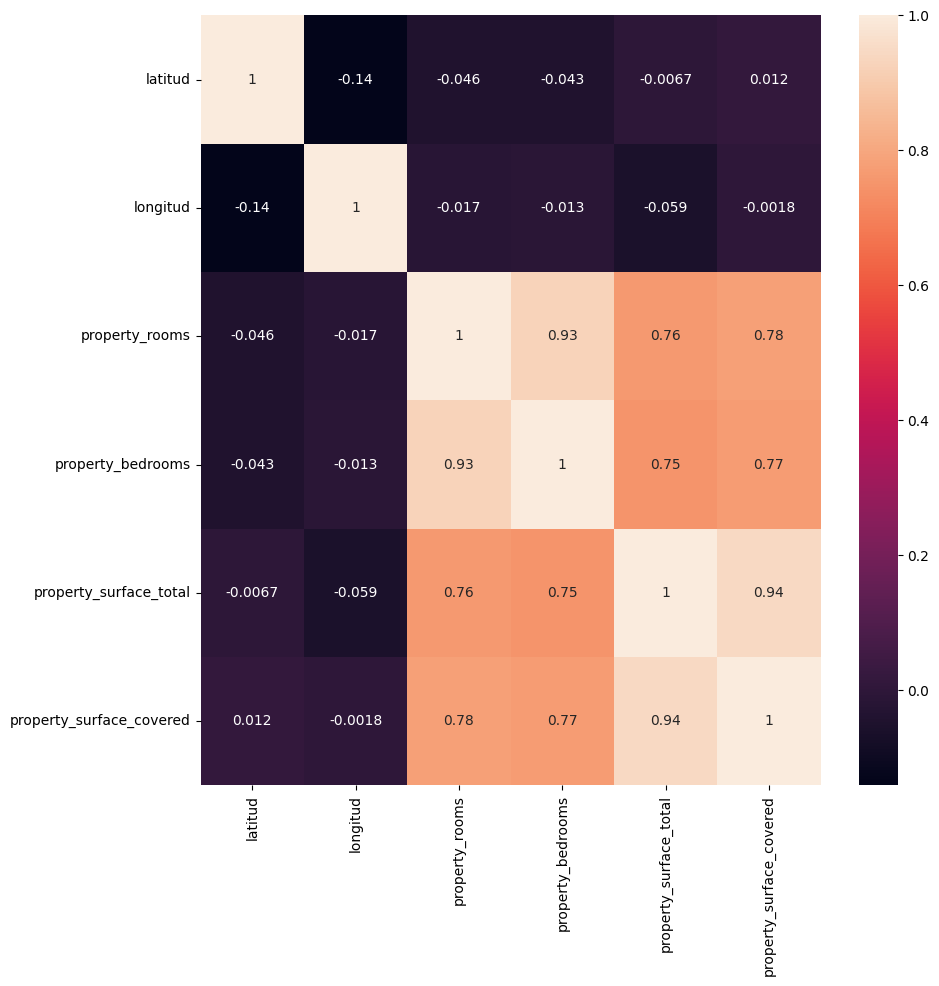

In [232]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

Como era de esperarse, podemos ver que existe una correlación muy fuerte entre property_surface_total y property_surface_covered y entre property_rooms y property_bedrooms

Ahora si comenzamos con PCA y calculamos las componentes principales, elegimos el mismo número de variables que en el dataframe anterior

In [233]:
ds_reducido_normalizado.shape

(69727, 6)

In [234]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0     -1.422272  0.394971 -0.288712  0.084150 -0.216455  0.039847
1     -1.774598 -0.610925 -0.286226  0.473638  0.369027 -0.058538
2      0.823930 -1.146924 -0.702403 -0.450385 -0.625016 -0.150494
3      0.195513  0.585279 -0.302840 -0.170841 -0.042889  0.032797
4      0.431583 -0.609171  2.306572  0.058562 -0.027198 -0.030292
...         ...       ...       ...       ...       ...       ...
69722 -1.698359  1.888778 -0.827854  0.686464  0.371895  0.030514
69723  1.307363 -1.472777  0.645292  0.840814 -0.007136 -0.091727
69724 -1.182635  0.004414 -0.552455  0.302374 -0.211428 -0.164803
69725 -0.331551  0.708888  1.961360 -0.633425 -0.050758  0.041625
69726  5.204008  0.279499  1.536600  2.952769  0.244923  0.439625

[69727 rows x 6 columns]

In [235]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.19
0.14
0.07
0.01
0.01


In [236]:
varianza_explicada.cumsum()

array([0.57767931, 0.76839199, 0.91176527, 0.97903429, 0.99097322,
       1.        ])

Podemos ver que con 3 componentes llegamos a un 91% de la varianza, trataremos de ver esto en un gráfico

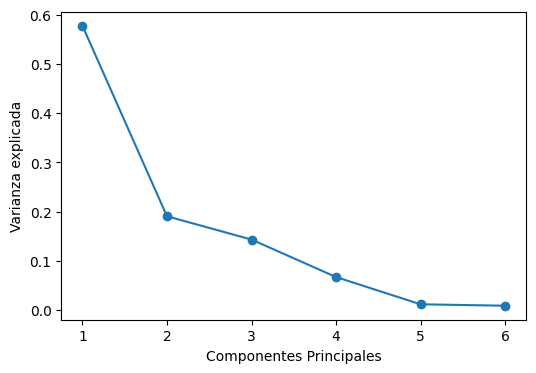

In [237]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

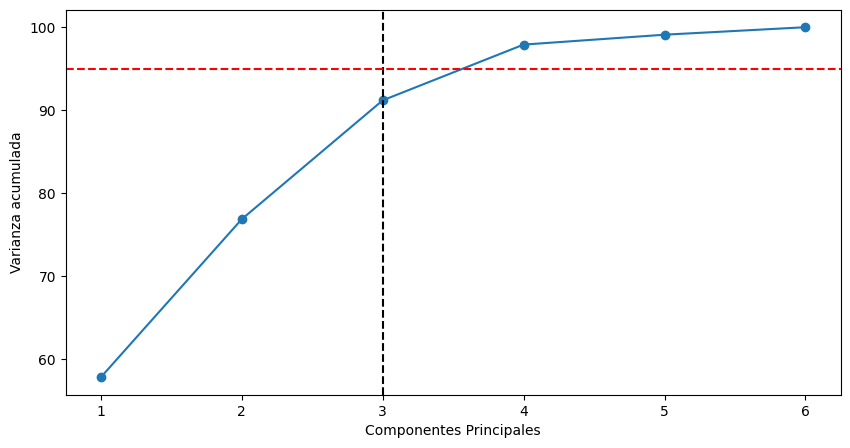

In [238]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

Con 3 componentes logramos explicar más del 90% de la varianza, por lo que nos quedaremos con esta reducción.

In [239]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0 -1.422272  0.394971 -0.288712
1 -1.774598 -0.610925 -0.286226
2  0.823930 -1.146924 -0.702403
3  0.195513  0.585279 -0.302840
4  0.431583 -0.609171  2.306572

## Agrupamiento

Importamos librerías de agrupamiento.

In [240]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from pyclustertend import hopkins

ModuleNotFoundError: No module named 'yellowbrick'

Para el analisis de agrupamiento incorporaremos el precio

In [244]:
ds_agrupamiento = ds_reducido.copy()
ds_agrupamiento['property_price'] = ds_train.property_price
ds_agrupamiento

latitud   longitud  property_rooms  property_bedrooms  \
265075 -34.597965 -58.421136             2.0                1.0   
450176 -34.579836 -58.447115             1.0                1.0   
408274 -34.561177 -58.451993             4.0                2.0   
232940 -34.601441 -58.416935             3.0                2.0   
225031 -34.628037 -58.517201             3.0                2.0   
...           ...        ...             ...                ...   
254629 -34.617034 -58.367304             1.0                1.0   
270651 -34.582972 -58.496133             3.0                2.0   
180432 -34.586182 -58.424139             2.0                1.0   
29145  -34.644610 -58.473373             3.0                2.0   
155811 -34.638482 -58.476347             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  
265075                    39.0                      39.0         68000.0  
450176                    48.0                      37.0         95000.0  
408274                   102.0                      79.0        258000.0  
232940                    80.0                      74.0        185000.0  
225031                   100.0                      75.0        165000.0  
...                        ...                       ...             ...  
254629                    47.0                      47.0        195000.0  
270651                   157.0                     120.0        205000.0  
180432                    63.0                      44.0        165000.0  
29145                     48.0                      42.0         74900.0  
155811                   317.0                     284.0        299900.0  

[69727 rows x 7 columns]

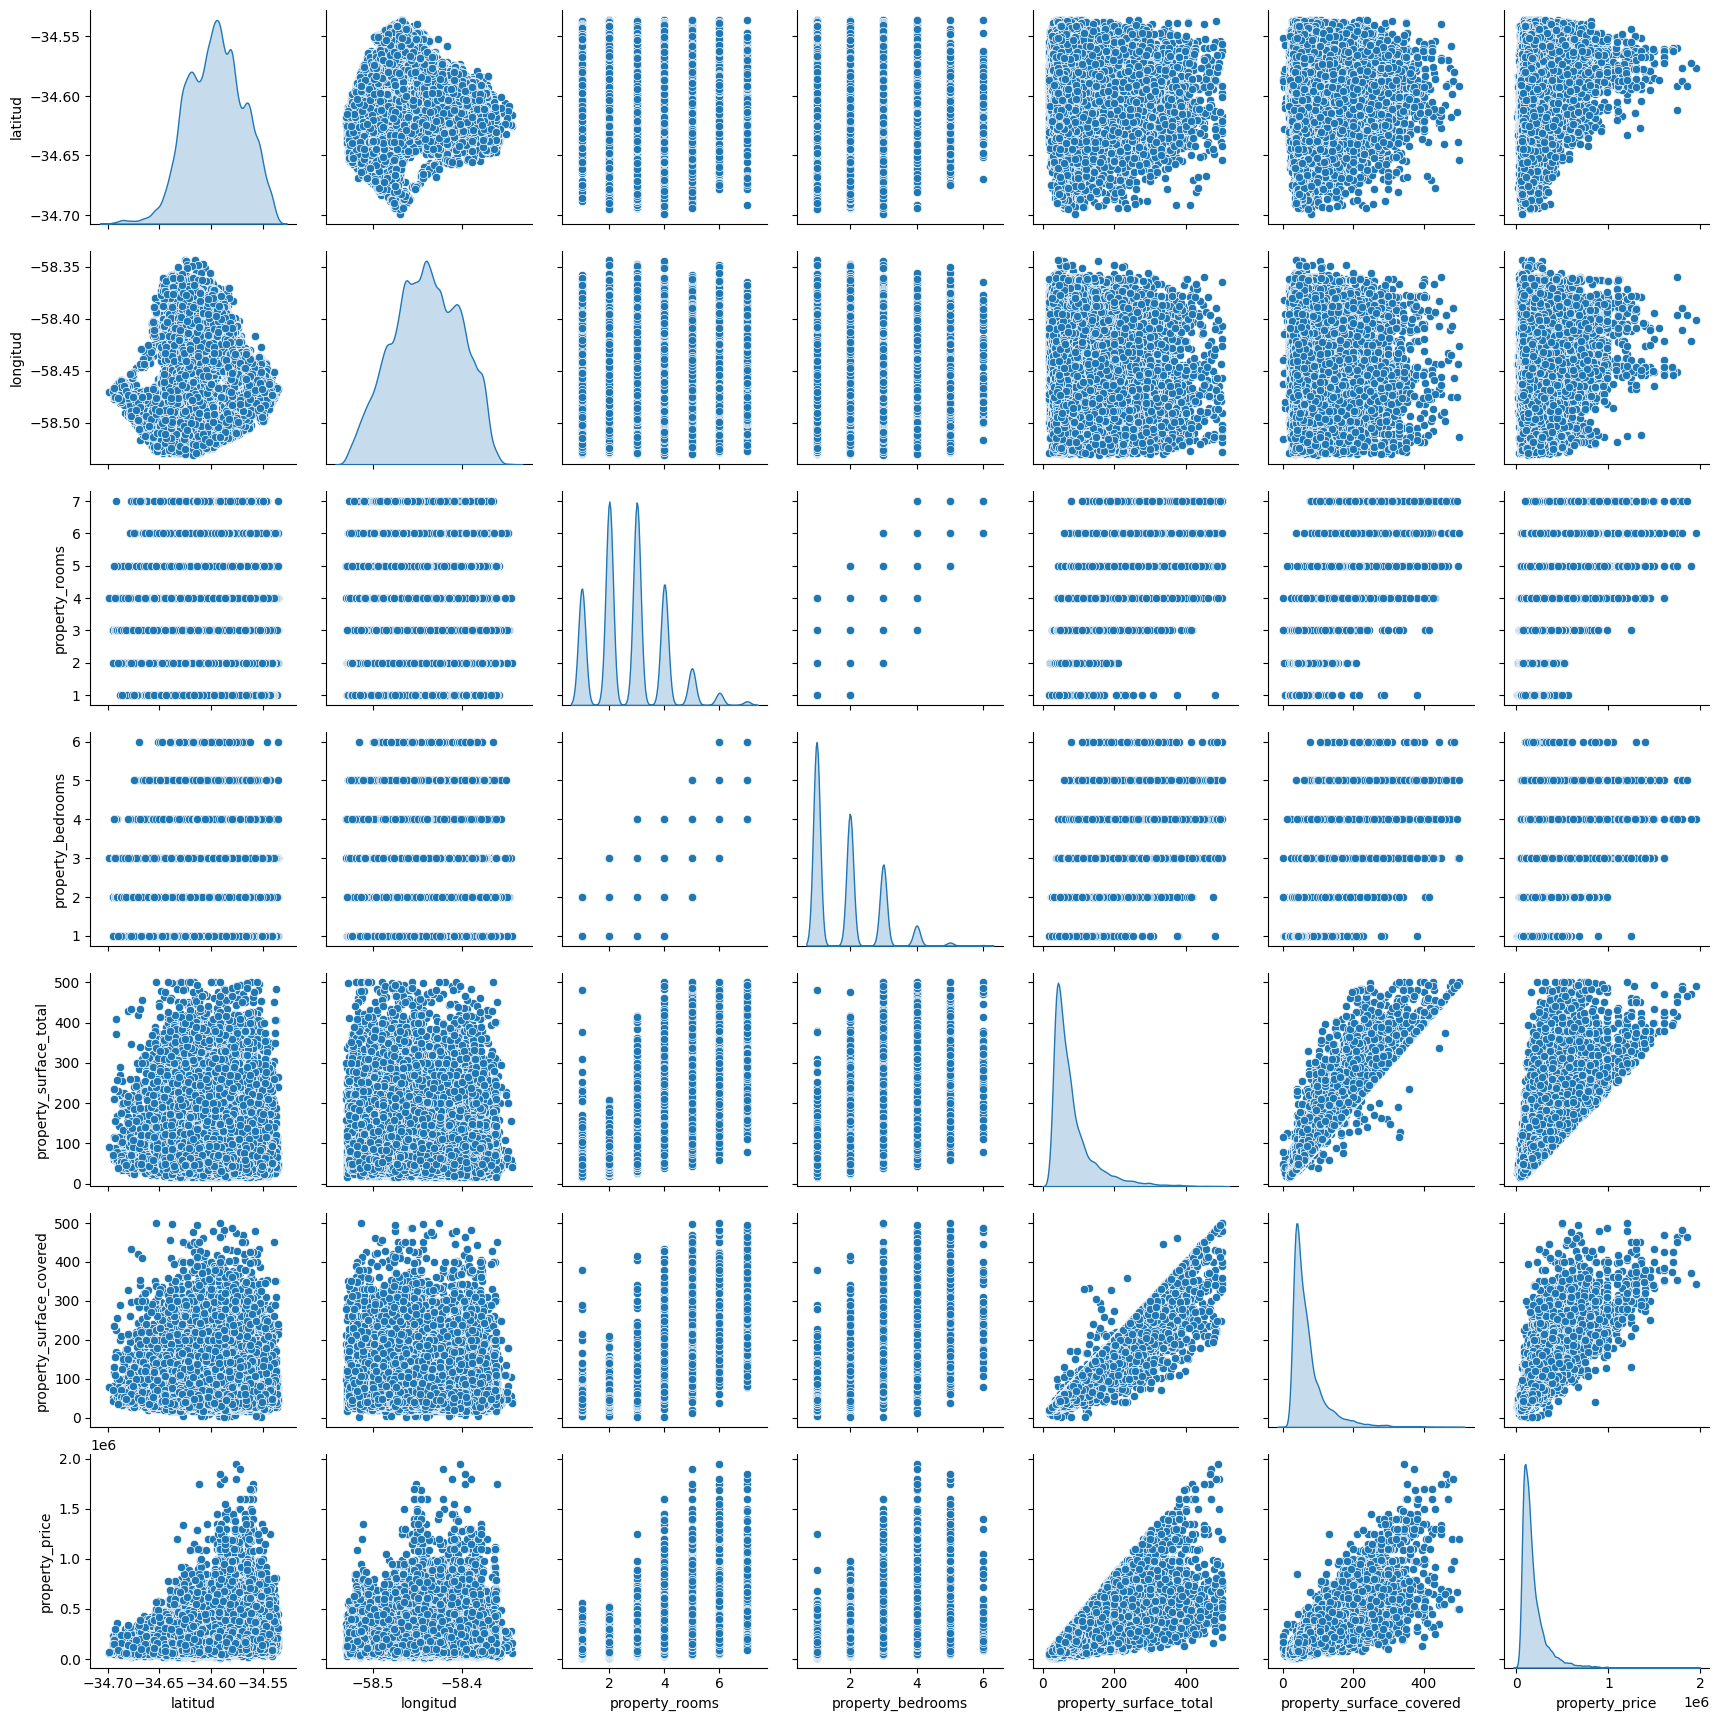

In [245]:
sns.pairplot(ds_agrupamiento, diag_kind='kde');

In [246]:
hopkins(ds_agrupamiento, ds_agrupamiento.shape[0])

NameError: name 'hopkins' is not defined

Para la estadística de Hopkins, un valor cercano a cero indica que la distribución es bastante uniforme y que hay poca tendencia al clustering.

Si bien es dificil identificar agrupamientos en estos gráficos, probaremos buscarlos mediante el uso de KMeans

#### Método de Elbow

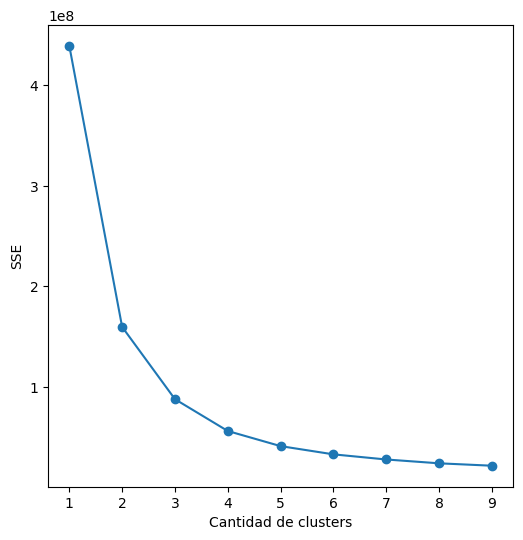

In [247]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_reducido)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Podemos ver que para 2 o 3 clusters la pendiente cambia de forma bastante significativa. Probaremos predicciones con KMeans para esas cantidades.

#### KMeans

In [248]:
kmeans = KMeans(2, random_state=0)
kmeans.fit(ds_reducido)

y_2_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters', index=ds_reducido.index)

In [249]:
y_2_clusters.value_counts()

0    60249
1     9478
Name: clusters, dtype: int64

In [250]:
ds_reducido['two_cluster'] = y_2_clusters

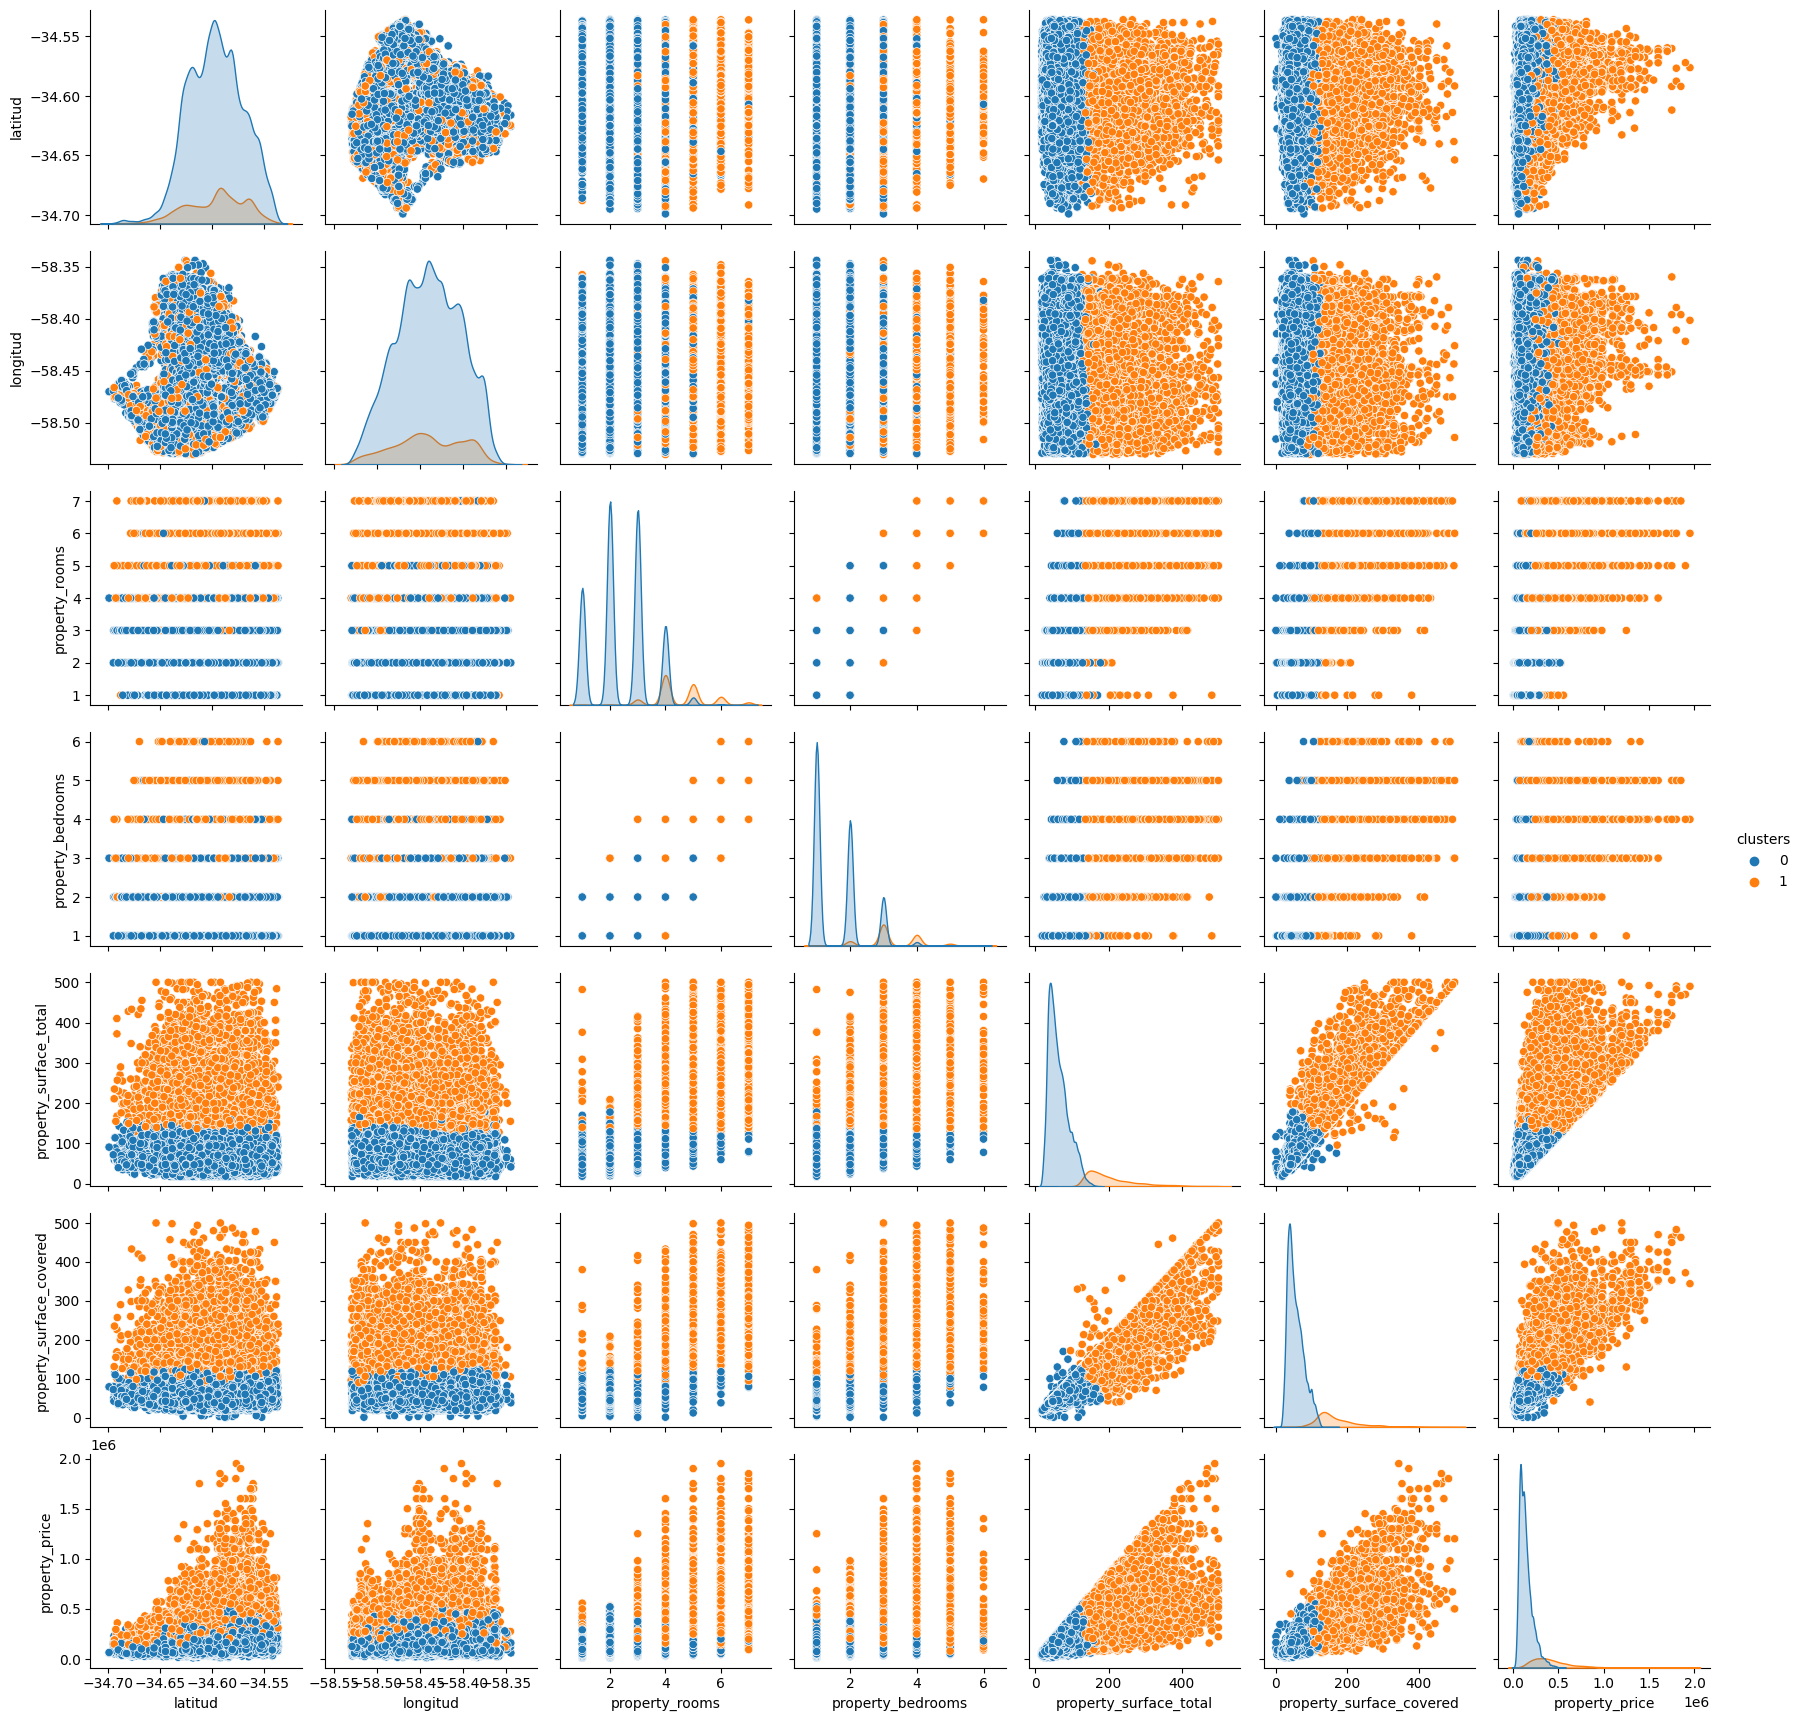

In [251]:
sns.pairplot(pd.concat([ds_agrupamiento, y_2_clusters], axis=1), hue='clusters');

In [ ]:
kmeans = KMeans(3, random_state=0)
kmeans.fit(ds_reducido)

y_3_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters', index=ds_reducido.index)

In [ ]:
sns.pairplot(pd.concat([ds_agrupamiento, y_3_clusters], axis=1), hue='clusters');

### Analisis de Silhouette

Realizaremos un analisis de Silhouette para evaluar la calidad de los clusters.

In [ ]:
list_k = list(range(2, 6))
sse = []

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_agrupamiento)
    score = silhouette_score(ds_agrupamiento, preds)
    print(f"Para {n_clusters} el puntaje de Silhouette es " + str(score))

El mejor puntaje es el de 2 clusters. Cuanto más cerca de 1 mayor tendencia a agruparse. Evaluaremos la calidad de los clusters mediante el gráfico de silueta

#### Para 2 clusters

In [255]:
model = KMeans(2, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(ds_agrupamiento)
plt.show()

NameError: name 'SilhouetteVisualizer' is not defined

NameError: name 'barrios' is not defined

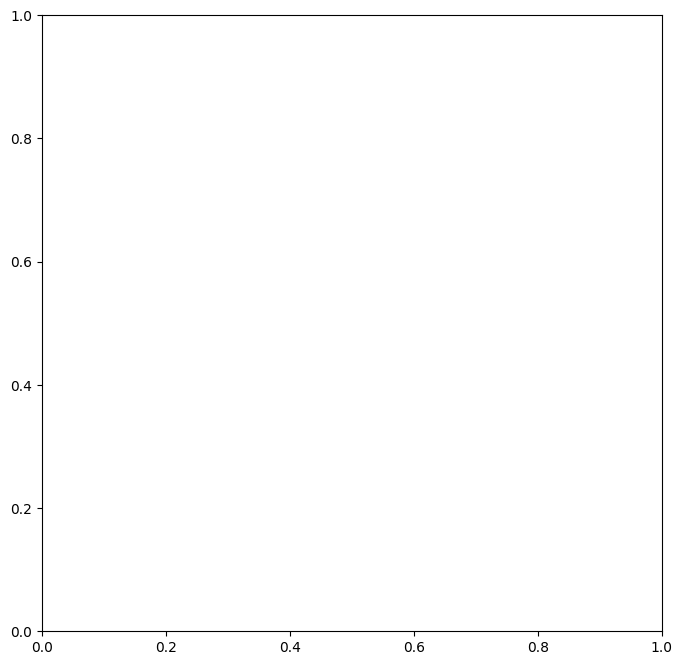

In [256]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_2_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()

#### Para 3 clusters

In [257]:
model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')  # Instancio el visualizador
visualizer.fit(ds_agrupamiento)
plt.show()

NameError: name 'SilhouetteVisualizer' is not defined

NameError: name 'barrios' is not defined

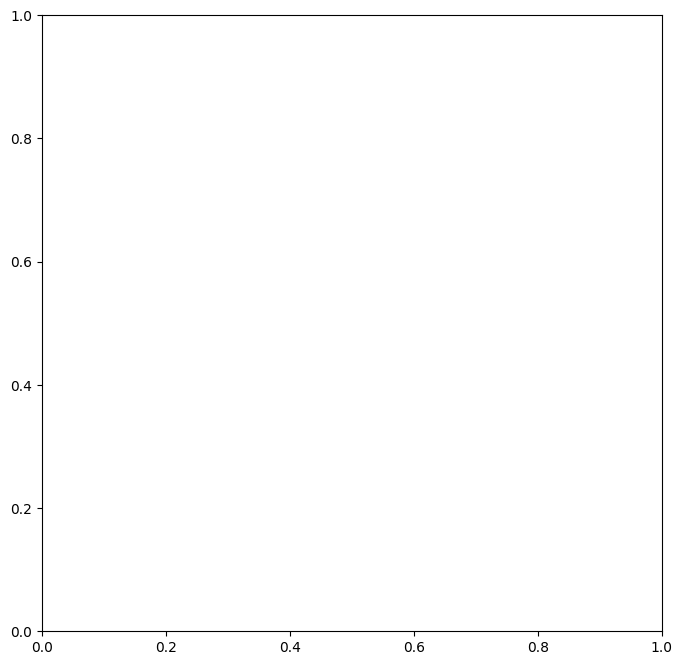

In [258]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_3_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()

## Clasificación

In [259]:
def precio_metro_cuadrado(dataset):
    pxm2 = dataset['property_price'] / dataset['property_surface_total']
    sorted_pxm2 = pxm2.sort_values(ascending=True)
    return (pxm2, sorted_pxm2)

(pxm2, sorted_pxm2) = precio_metro_cuadrado(ds_train)
pxm2.describe()

count    69727.000000
mean      2268.305656
std        695.862502
min        328.048780
25%       1787.398374
50%       2224.137931
75%       2705.882353
max       4278.846154
dtype: float64

Definiremos la variable tipo_precio con 3 valores posibles, alto, medio y bajo.

#### Primera variable (33% bajo, 33% medio, 33% alto)

La primera clasificación tiene que tener la misma cantidad de registros en las 3 diferentes categorias

In [260]:
def agregar_variable(dataset, categoria, nombre_categoria, pxm2, sorted_pxm2):
    nueva_categoria = pd.DataFrame()
    nueva_categoria['pxm2'] = sorted_pxm2
    nueva_categoria[nombre_categoria] = categoria
    dataset[nombre_categoria] = pxm2
    dataset[nombre_categoria] = nueva_categoria[nombre_categoria]
    return dataset

def imprimir_limites(dataset, categoria):
    valores_bajos = dataset[dataset[categoria]== 'Bajo']
    valores_medios = dataset[dataset[categoria] == 'Medio']
    valores_altos = dataset[dataset[categoria] == 'Alto']
    print(f'Minimo bajo: {valores_bajos.pxm2.min()}, Maximo bajo: {valores_bajos.pxm2.max()}')
    print(f'Minimo medio: {valores_medios.pxm2.min()}, Maximo medio: {valores_medios.pxm2.max()}')
    print(f'Minimo alto: {valores_altos.pxm2.min()}, Maximo alto: {valores_altos.pxm2.max()}')

In [261]:
ds_train['pxm2'] = pxm2
categoria = []
for i in range(0, len(sorted_pxm2) // 3):
    categoria.append('Bajo')
for i in range(len(sorted_pxm2) // 3, 2 * len(sorted_pxm2) // 3):
    categoria.append('Medio')
for i in range(2 * len(sorted_pxm2) // 3, len(sorted_pxm2)):
    categoria.append('Alto')

ds_train = agregar_variable(ds_train, categoria, 'clasificacion_1', pxm2, sorted_pxm2)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de la categoria 1'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

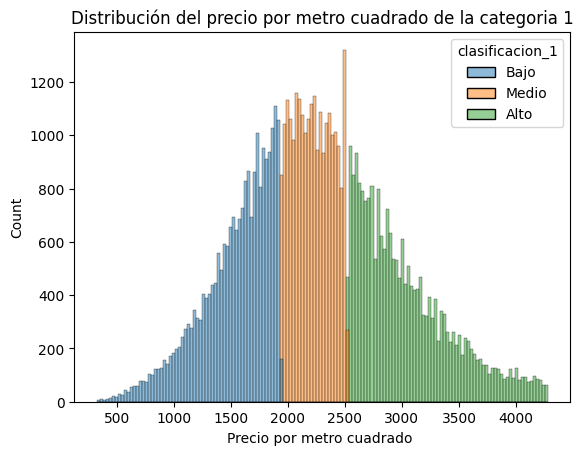

In [262]:
sns.histplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_1, bins=150).set(title='Distribución del precio por metro cuadrado de la categoria 1', xlabel='Precio por metro cuadrado ')

In [263]:
ds_train.clasificacion_1.value_counts()

Alto     23243
Bajo     23242
Medio    23242
Name: clasificacion_1, dtype: int64

In [264]:
imprimir_limites(ds_train,'clasificacion_1')

Minimo bajo: 328.0487804878049, Maximo bajo: 1938.7755102040817
Minimo medio: 1938.7755102040817, Maximo medio: 2525.423728813559
Minimo alto: 2525.423728813559, Maximo alto: 4278.846153846154


#### Segunda variable (25% bajo, 50% medio, 25% alto)

In [265]:
def separar_25_50_25(dataset):
    categoria = []
    for i in range(0, len(dataset) // 4):
        categoria.append('Bajo')
    for i in range(len(dataset) // 4, 3 * len(dataset) // 4):
        categoria.append('Medio')
    for i in range(3 * len(dataset) // 4, len(dataset)):
        categoria.append('Alto')

    return categoria

In [266]:
categoria = separar_25_50_25(ds_train)
ds_train = agregar_variable(ds_train, categoria, 'clasificacion_2', pxm2, sorted_pxm2)

[Text(0.5, 1.0, 'Distribución de las categorías en relación al precio por metro cuadrado'),
 Text(0.5, 0, 'Precio por metro cuadrado'),
 Text(0, 0.5, 'Cantidad')]

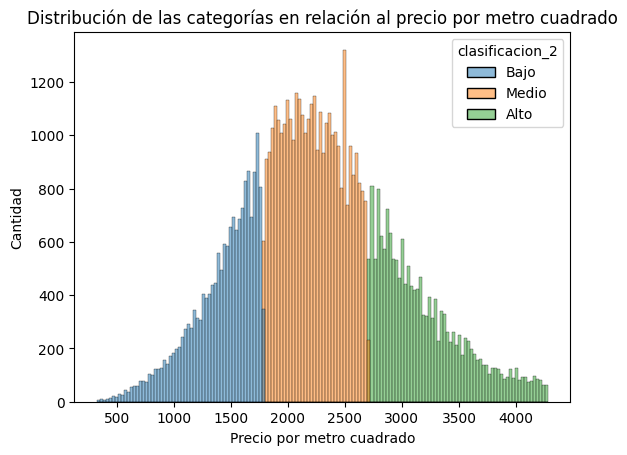

In [267]:
sns.histplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_2, bins=150).set(title='Distribución de las categorías en relación al precio por metro cuadrado', xlabel='Precio por metro cuadrado', ylabel='Cantidad')

In [268]:
ds_train.clasificacion_2.value_counts()

Medio    34864
Alto     17432
Bajo     17431
Name: clasificacion_2, dtype: int64

In [269]:
imprimir_limites(ds_train, 'clasificacion_2')

Minimo bajo: 328.0487804878049, Maximo bajo: 1787.3303167420815
Minimo medio: 1787.39837398374, Maximo medio: 2705.8823529411766
Minimo alto: 2705.8823529411766, Maximo alto: 4278.846153846154


#### Tercera variable (25-50-25 por tipo de propiedad)

##### Casas

In [270]:
casas = ds_train[ds_train.property_type == 'Casa'].copy()
dptos = ds_train[ds_train.property_type == 'Departamento'].copy()
phs = ds_train[ds_train.property_type == 'PH'].copy()

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

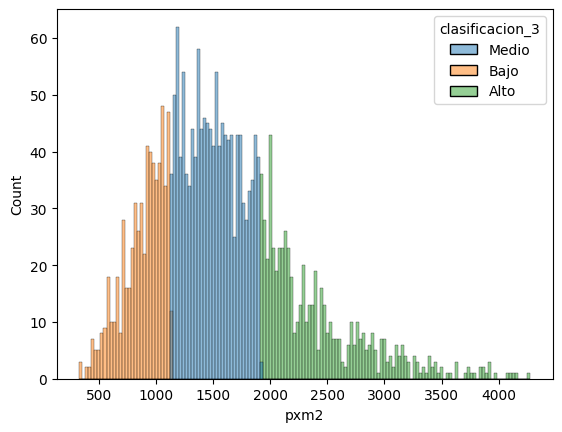

In [271]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(casas)
categoria = separar_25_50_25(casas)
casas = agregar_variable(casas, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=casas, x=casas.pxm2, hue=casas.clasificacion_3, bins=150)

##### Departamentos

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

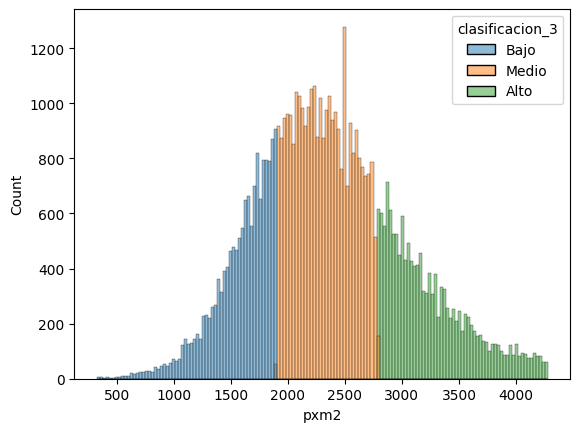

In [272]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(dptos)
categoria = separar_25_50_25(dptos)
dptos = agregar_variable(dptos, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=dptos, x=dptos.pxm2, hue=dptos.clasificacion_3, bins=150)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de departamentos'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

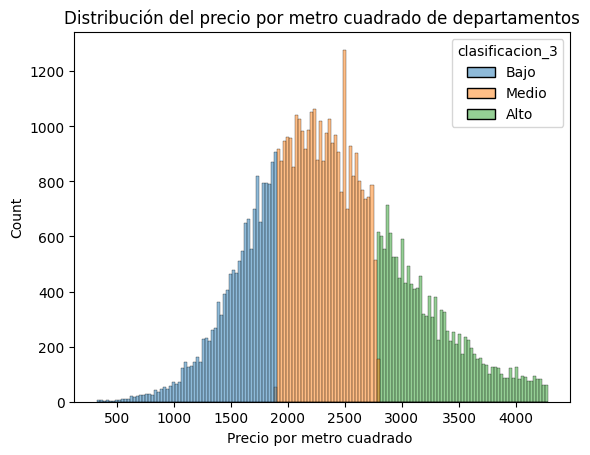

In [273]:
sns.histplot(data=dptos, x=dptos.pxm2, hue=dptos.clasificacion_3, bins=150).set(title='Distribución del precio por metro cuadrado de departamentos', xlabel='Precio por metro cuadrado ')

##### PH

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

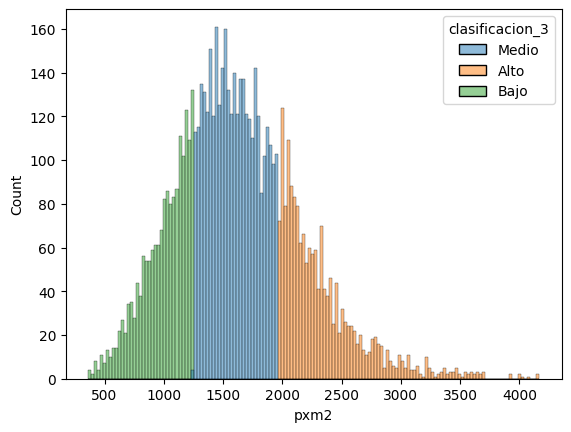

In [274]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(phs)
categoria = separar_25_50_25(phs)
phs = agregar_variable(phs, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=phs, x=phs.pxm2, hue=phs.clasificacion_3, bins=150)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de Phs'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

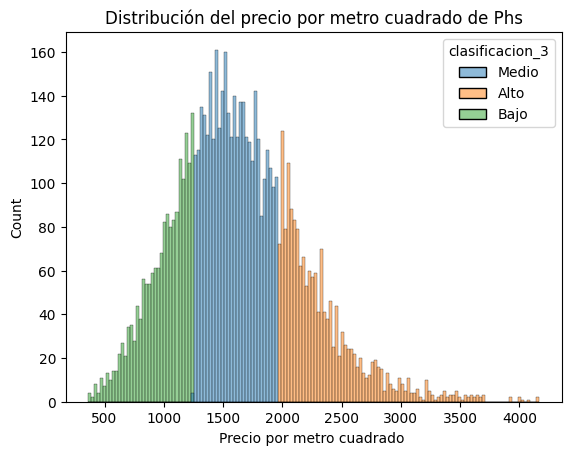

In [275]:
sns.histplot(data=phs, x=phs.pxm2, hue=phs.clasificacion_3, bins=150).set(title='Distribución del precio por metro cuadrado de Phs', xlabel='Precio por metro cuadrado ')

##### Union de las 3 al dataset

In [276]:
nueva_categoria = pd.concat([casas,dptos, phs])
ds_train['clasificacion_3'] = nueva_categoria['clasificacion_3']

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de toda propiedad'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

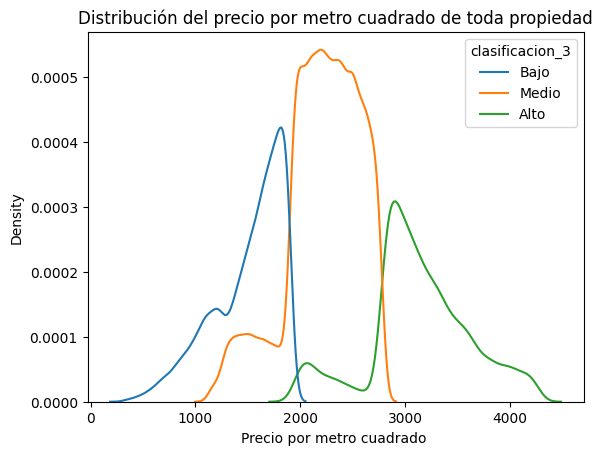

In [277]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_3).set(title='Distribución del precio por metro cuadrado de toda propiedad', xlabel='Precio por metro cuadrado ')

In [278]:
ds_train.clasificacion_3.value_counts()

Medio    34864
Alto     17433
Bajo     17430
Name: clasificacion_3, dtype: int64

##### Distribución del precio por metro cuadrado

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado'),
 Text(0.5, 0, 'Precio por metro cuadrado de departamentos')]

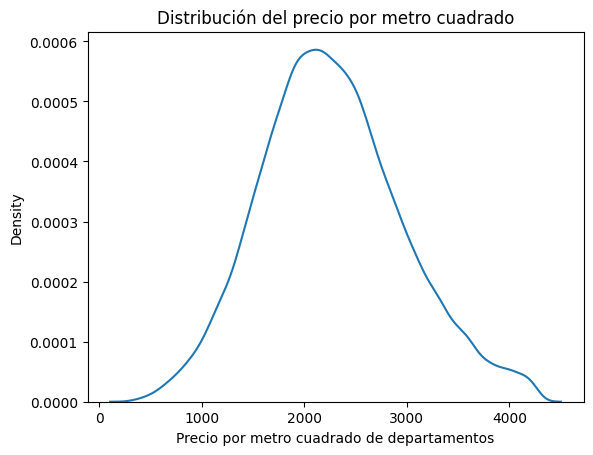

In [279]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2).set(title='Distribución del precio por metro cuadrado', xlabel='Precio por metro cuadrado de departamentos')

##### Distribución del precio por metro cuadrado por tipo de propiedad

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de cada tipo de propiedad'),
 Text(0.5, 0, 'Precio por metro cuadrado')]

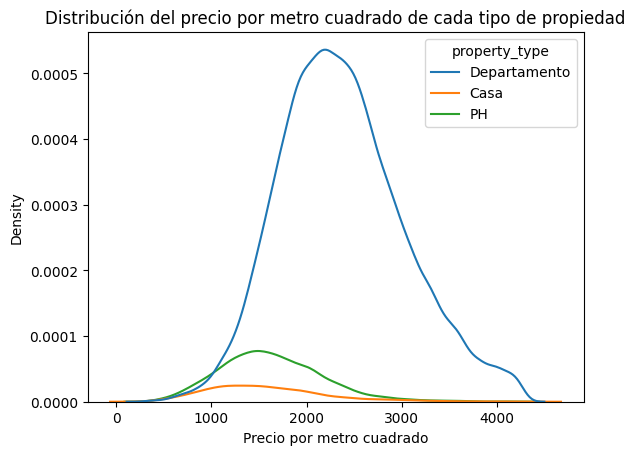

In [280]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.property_type).set(title='Distribución del precio por metro cuadrado de cada tipo de propiedad', xlabel='Precio por metro cuadrado')

#### Conclusión

Viendo como el precio por metro cuadrado de departamentos es mayor al de casas y phs tiene sentido el tomar la tercera variable por sobre las otras 2. Ya que caso contrario la categorización de las casas y phs se vería contaminada por el de los departamentos, ya que algunos casos de casas que serían caras por si mismas terminan siendo de precio medio ya que el mismo número para los
departamentos no es caro.

In [281]:
ds_train.drop(axis=1, columns=['clasificacion_1', 'clasificacion_2'], inplace=True)
ds_train.rename(columns= {'clasificacion_3':'tipo_precio'}, inplace=True)

#### Construccion de la variable en Test

In [282]:
ds_test['pxm2'] = ds_test['property_price'] / ds_test['property_surface_total']

In [283]:
lista_tipo_precio_test = []
for registro in ds_test.itertuples():
    #print(registro.Index)
    if registro.property_type == 'Casa':
        if registro.pxm2 < casas[casas['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > casas[casas['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'Departamento':
        if registro.pxm2 < dptos[dptos['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > dptos[dptos['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'PH':
        if registro.pxm2 < phs[phs['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > phs[phs['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')




In [284]:
len(lista_tipo_precio_test)

5709

In [285]:
len(ds_test)

5709

In [286]:
ds_test['tipo_precio'] = pd.Series(data=lista_tipo_precio_test, name='tipo_precio', index=ds_test.index)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado en el dataset de testeo'),
 Text(0.5, 0, 'Precio por metro cuadrado')]

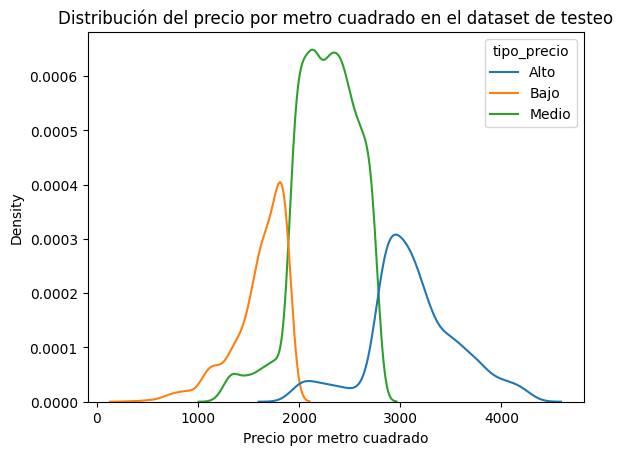

In [287]:
sns.kdeplot(data=ds_test, x=ds_test.pxm2, hue=ds_test.tipo_precio).set(title='Distribución del precio por metro cuadrado en el dataset de testeo', xlabel='Precio por metro cuadrado')

#### Comparación con los resultados de Kmeans

In [288]:
copia_3_clusters = y_3_clusters.copy()
copia_3_clusters.replace(to_replace=0, value='Medio', inplace= True)
copia_3_clusters.replace(to_replace=1, value='Bajo', inplace= True)
copia_3_clusters.replace(to_replace=2, value='Alto', inplace= True)
ds_comparacion = pd.concat([ds_train, copia_3_clusters], axis=1)
print(f"Porcentaje de semejanza de clusters: {round(len(np.where(ds_comparacion.tipo_precio == ds_comparacion.clusters)[0]) / len(ds_comparacion) * 100, 2)} %")

Porcentaje de semejanza de clusters: 24.24 %


In [289]:
y_3_clusters.value_counts()

2    50500
1    15494
0     3733
Name: clusters, dtype: int64

Vemos que el porcentaje no parece ser lo suficientemente alto (Tomando el cluster más chico como el 'Alto', el más grande como el 'Medio' y como bajo el tercero, siendo esta la combinación que mejor porcentaje de semejanza da con 45,9 %) como para intuir que están relacionados los clusters.
Vamos a recrear uno de los gráficos hechos arriba de precio total contra superficie esta vez coloreando la clasificación de precio en vez a ver si los graficos se parecen.

[Text(0.5, 1.0, 'Analisis del tipo de precio en relacion al precio total y la superficie'),
 Text(0.5, 0, 'Superficie total'),
 Text(0, 0.5, 'Precio de la propiedad')]

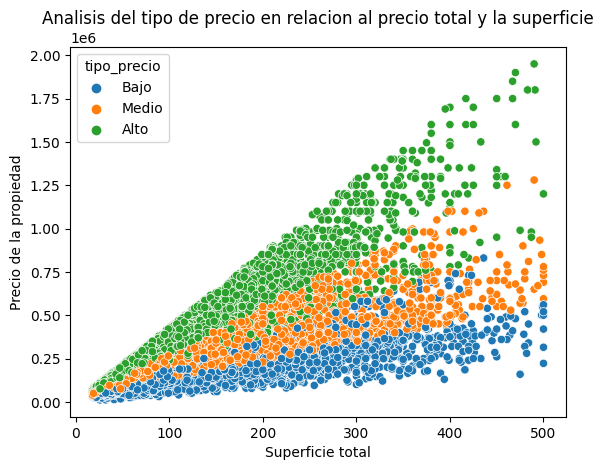

In [290]:
sns.scatterplot(data=ds_train, x=ds_train.property_surface_total, y=ds_train.property_price, hue=ds_train.tipo_precio).set(title='Analisis del tipo de precio en relacion al precio total y la superficie', xlabel='Superficie total', ylabel= 'Precio de la propiedad')

En efecto comparando el gráfico de tipo_precio con el de clusters de superficie total contra precio vemos que se tratan de 2 clasificaciones diferentes

## Arbol de Decision - Clasificacion

In [291]:
#One hot encoding para variables categoricas
ds_train_copy = ds_train.copy()
ds_train_copy = pd.get_dummies(ds_train_copy, columns=['place_l3', 'property_type', 'tipo_precio'], drop_first=True)
ds_train_copy.head()

start_date   end_date    latitud   longitud  property_rooms  \
265075 2021-11-19 2022-01-27 -34.597965 -58.421136             2.0   
450176 2021-12-16 2022-02-09 -34.579836 -58.447115             1.0   
408274 2021-03-05 2021-06-05 -34.561177 -58.451993             4.0   
232940 2021-03-20 2022-02-09 -34.601441 -58.416935             3.0   
225031 2021-09-14 2022-03-09 -34.628037 -58.517201             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
265075                1.0                    39.0                      39.0   
450176                1.0                    48.0                      37.0   
408274                2.0                   102.0                      79.0   
232940                2.0                    80.0                      74.0   
225031                2.0                   100.0                      75.0   

        property_price                                     property_title  \
265075         68000.0             Av. Córdoba al 3800 - 2 amb. - Almagro   
450176         95000.0           VENTA MONOAMBIENTE CON BALCON A ESTRENAR   
408274        258000.0                            Departamento - Belgrano   
232940        185000.0   VENTA DEPARTAMENTO 3 AMBIENTES COCHERA AMENITIES   
225031        165000.0  Excelente tríplex de 3 amb. con terraza y coch...   

        ...  place_l3_Villa Real  place_l3_Villa Riachuelo  \
265075  ...                    0                         0   
450176  ...                    0                         0   
408274  ...                    0                         0   
232940  ...                    0                         0   
225031  ...                    0                         0   

        place_l3_Villa Santa Rita  place_l3_Villa Soldati  \
265075                          0                       0   
450176                          0                       0   
408274                          0                       0   
232940                          0                       0   
225031                          0                       0   

        place_l3_Villa Urquiza  place_l3_Villa del Parque  \
265075                       0                          0   
450176                       0                          0   
408274                       0                          0   
232940                       0                          0   
225031                       0                          0   

        property_type_Departamento  property_type_PH  tipo_precio_Bajo  \
265075                           1                 0                 1   
450176                           1                 0                 0   
408274                           1                 0                 0   
232940                           1                 0                 0   
225031                           1                 0                 1   

        tipo_precio_Medio  
265075                  0  
450176                  1  
408274                  1  
232940                  1  
225031                  0  

[5 rows x 71 columns]

In [292]:
#Creo un dataset con los features que voy a usar para clasificar
ds_train_x = ds_train_copy.drop(['property_price', 'start_date', 'end_date', 'property_title', 'tipo_precio_Bajo', 'tipo_precio_Medio'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_train_y = ds_train_copy['tipo_precio_Bajo'].copy()
ds_train_y = ds_train_copy['tipo_precio_Medio'].copy()
# ds_train_y = ds_train_copy['tipo_precio_Alto'].copy() No hay precio alto?

#Genero los conjuntos de train y de test
#proporcion 80/20
x_train, x_test, y_train, y_test = train_test_split(ds_train_x, ds_train_y, test_size=0.2, random_state=2) #semilla

KeyError: "['tipo_precio'] not found in axis"

In [ ]:
#Creo un clasificador
tree_model = tree.DecisionTreeClassifier(max_depth = 10)

#Entreno el modelo
model = tree_model.fit(X = x_train, y = y_train)
#x_train

In [ ]:
#Creamos un clasificador con hiperparámetros 
tree_model = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 20, 
                                         min_samples_leaf=10) 
#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)

In [ ]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)
#Valores Predichos
y_pred

In [ ]:
y_test.values

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

In [ ]:
model.classes_

In [ ]:
plt.figure(figsize=(10,10))

tree_plot_completo=tree.plot_tree(model,
                                 feature_names=ds_train_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=['Bajo','Medio']) #model.classes_
plt.show(tree_plot_completo)

In [ ]:
plt.figure(figsize=(12,12))

tree_plot=tree.plot_tree(model,
                         max_depth=2,
                         feature_names=ds_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

In [ ]:
viz = dtreeviz.dtreeviz(
    model,
    ds_trabajo_x,
    ds_trabajo_y,
    class_names=['Bajo','Medio'], 
    title="Arbol de Decisión - Properati dataset",
    target_name='tipo_precio',
    feature_names=ds_train_x.columns.to_list(),
    scale=1.5
)

display(viz)